# Analyse von ÖV- und Wetterdaten

---
# 1 Einleitung

Zuverlässigkeit und Pünktlichkeit sind entscheidende Qualitätsmerkmale des öffentlichen Verkehrs. Gerade in einer Stadt wie Zürich, in der das Tramnetz einen wichtigen Bestandteil des städtischen Mobilitätsangebots darstellt, können Verspätungen zu spürbaren Einschränkungen im Alltag der Bevölkerung führen. Neben betrieblichen und infrastrukturellen Faktoren wird vermutet, dass auch das Wetter - wie etwa Regen, Schnee, Sonneneinstrahlung oder Temperaturschwankungen - eine wesentliche Rolle bei der Entstehung von Verspätungen spielt.

Im Rahmen der Projektarbeit im Modul "Business Intelligence and Business Analytics" soll untersucht werden, ob und inwieweit das Wetter die Pünktlichkeit des Trambetriebs in der Stadt Zürich im Zeitraum von Januar 2024 bis Dezember 2024 beeinflusst hat. Dabei soll nicht nur geprüft werden, ob es statistisch signifikante Zusammenhänge gibt, sondern auch, welche Wetterphänomene besonders ausschlaggebend sind und ob sich daraus Muster für zukünftige Entwicklungen ableiten lassen.

Die Analyse erfolgt datenbasiert und verknüpft Fahrplandaten der Zürcher Verkehrsbetriebe mit meteorologischen Informationen. Ziel ist es, eine fundierte Grundlage für eine Handlungsempfehlung auf Managementebene zu schaffen, die zur Verbesserung der Betriebsführung beitragen kann.

## 1.1 Zielsetzung und Forschungsfragen

Das Hauptziel dieser Arbeit besteht darin, den Einfluss verschiedener Wetterbedingungen auf die Pünktlichkeit des Trambetriebs in der Stadt Zürich systematisch zu analysieren. Durch den Vergleich von Wetter- und Verspätungsdaten für den Zeitraum 2024 sollen belastbare Aussagen darüber getroffen werden, ob und wann wetterbedingte Beeinträchtigungen auftreten.

Folgende Forschungsfragen stehen dabei im Mittelpunkt:
- Lassen sich statistisch signifikante Zusammenhänge zwischen bestimmten Wetterereignissen und ÖV-Verbindungen identifizieren?
- Welche Wetterfaktoren haben den grössten Einfluss auf die Pünktlichkeit?
- In welchen Zeiträumen oder auf welchen Linien treten wetterbedingte Verspätungen häufig auf?
- Welche praktische Empfehlungen lassen sich aus den - Ergebnissen für die betriebliche Planung und Steuerung ableiten?

## 1.2 Methodisches Vorgehen

Das Vorgehen in dieser Arbeit orientiert sich am fünfstufigen Framework zur datenbasierten Entscheidungsfindung nach Bernhard Marr (2020). Es umfasst die Definition des Informationsbedarfs, die Erhebung und Aufbereitung der relevanten Daten, die Durchführung der Analyse sowie die Darstellung der Ergebnisse.

Im ersten Schritt werden die Ziele und der Informationsbedarf anhand der definierten Forschungsfragen bestimmt (Kapitel 1.1).

Kapitel 2 beschreibt die verwendeten Datenquellen im Detail. Berücksichtigt werden dabei sowohl die Wetterdaten der Stadt Zürich als auch die Betriebsdaten des öffentlichen Verkehrs der Zürcher Verkehrsbetriebe.

In Kapitel 3 erfolgt die Prüfung der Datenqualität sowie die Beschreibung des Aufbereitungsprozesses - von der Datenübernahme über die Bereinigung bis hin zur Transformation.

Kapitel 4 widmet sich der Datenanalyse. Hier kommen verschiedene statistische Verfahren und Methoden zum Einsatz, um Zusammenhänge und Muster zu erkennen.

Die daraus gewonnenen Erkenntnisse werden im Kapitel 5 durch Visualisierungen und eine managementorientierte Ergebnisdarstellung aufbereitet.

Ziel dieser Arbeit ist es, eine belastbare Datenbasis sowie erste Handlungsempfehlungen zu erarbeiten, die als Grundlage für zukünftige Optimierungsmassnahmen im öffentlichen Verkehr der Stadt Zürich dienen können.

---
# 2 Daten
Für die Durchführung der Analyse wurden zwei zentrale Datenquellen kombiniert: Verkehrsdaten der Zürcher Trambetriebe sowie meteorologische Daten aus dem Raum Zürich. Beide Datensätze wurden aus offiziellen, öffentlich zugänglichen Plattformen bezogen und decken den Zeitraum von Januar 2023 bis Dezember 2024 ab.

Neben der Beschreibung der verwendeten Datenquellen (Abschnitt 2.1) wird in Abschnitt 2.2 das Vorgehen beim Import, der Bereinigung und Transformation der Daten erläutert. Ziel ist es, eine konsistente und qualitativ hochwertige Datenbasis für die Analyse zu schaffen.

## 2.1 Quellen
Es wurden zwei Hauptdatenquellen verwendet, wobei beide Datensätze so ausgewählt wurden, dass sie in Bezug auf Zeitbezug und räumliche Relevanz miteinander verknüpft werden können.

### 2.1.1 Verkehrsdaten
In dieser Arbeit werden zwei offizielle und öffentlich zugängliche Datensätze zum öffentlichen Verkehr in der Schweiz verwendet.
Die Daten rund um die Abfahrts- und Ankunftszeiten der Verkehrsmittel stammen von der Open-Data Plattform opentransportdata.swiss. Diese Plattform wird vom Bundesamt für Verkehr unterstützt und stellt aktuelle sowie historische Daten zum öffentlichen Verkehr zur Verfügung.
Quelle: (https://archive.opentransportdata.swiss/actual_data_archive.htm)

Zusätzlich wurden Geodaten zu den Haltestellen des öffentlichen Verkehrs verwendet. Diese wurden direkt über die Website des Bundesamts für Verkehr (BAV) bezogen. Der Datensatz enthält unter anderem die geografischen Koordinaten (Landeskoordinaten LV95), Haltestellennamen, sowie Gemeindezugehörigkeiten. Diese Informationen ermöglichen eine räumliche Visualisierung der Haltestellen.
Quelle: https://www.bav.admin.ch/bav/de/home/allgemeine-themen/fachthemen/geoinformation/geobasisdaten/haltestellen-des-oeffentlichen-verkehrs.html


### 2.1.2 Wetter
Die Wetterdaten wurden vom Datenportal IDAweb von MeteoSchweiz bezogen. Das Portal bietet Universitäten, (Fach-)Hochschulen und Schulen die Möglichkeit, Bodenstationsdaten von MeteoSchweiz zu beziehen.
Quelle: (https://gate.meteoswiss.ch/idaweb)

# 3 Import, Bereinigung und Transformation der Daten

Zur Vorbereitung der Analyse werden die relevanten Phython-Bibliotheken geladen, die Datensätze importiert und für die weitere Verarbeitung aufbereitet.

In [1]:
# 1. Benötigte Packages importieren
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import to_hex
import matplotlib.colors as mcolors
import numpy as np
from tqdm import tqdm #Package für Fortschrittsbalken
from keplergl import KeplerGl #Package für Darstellung von Geodaten
import calplot
import os
import glob
from scipy.stats import pearsonr
from scipy.stats import pointbiserialr
import scipy.stats as stats
from scipy.stats import ttest_ind
import statsmodels.api as sm
import json
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display

ModuleNotFoundError: No module named 'keplergl'

## 3.1 Verkehrsdaten


In diesem Abschnitt erfolgt der Import und die erste Sichtung der Verkehrsdaten.

### 3.1.1 Import der Verkehrsdaten

Der Datensatz vom Januar 2024 bis Dezember 2024 wird eingelasen und in einem DateFrame gespeichert. Anschliessend werden erste Informationen zur Strktur und zum Inhalt angezeigt.


In [ ]:
# 1. Laden der CSV-Datei
df_verkehr_daily_raw = pd.read_csv("Verkehrsdaten_daily.csv",
                                   sep=";",
                                   encoding="utf-8",
                                   low_memory=False)

# 2. Anzeigen der ersten 5 Zeilen des DataFrames
display(df_verkehr_daily_raw.head(5))

# 3. Anzeigen der Informationen des DataFrames
df_verkehr_daily_raw.info()

# 4. Anzeigen der Dimensionen des DataFrames
print(df_verkehr_daily_raw.shape)

### 3.1.2 Datenbereinigung & Formatierung

Der ursprüngliche Datensatz enthält mehrere Spalten, die für die Analyse nicht relevant oder reduntante Informationen enthaltet. Um die Datenstruktur zu vereinfachen, werden diese entfernt. Dazu zählen unter anderem:

- **BETRIEBSTAG:** Das Datum ist bereits in der Ankunfts- und Abfahrtszeit enthalten
- **FAHRT_BEZEICHNER:** Für die weitere Analyse nicht relevant
- **BETREIBER_ID:** Ist nicht relevant da der Betreiber mit "BETREIBER_ABK" identifiziert wird
- **BETREIBER_NAME:** Ist nicht relevant da der Betreiber mit "BETREIBER_ABK" identifiziert wird
- **LINIEN_ID:** Ist nicht relevant da die Linie mit "LINIEN_TEXT" identifiziert wird.
- **UMLAUF_ID:** Für die weitere Analyse nicht relevant
- **VERKEHRSMITTEL_TEXT:** Ist nicht relevant da das Verkehrsmittel mit "PRODUKT_ID"identifiziert wird.
- **BPUIC:** Für die weitere Analyse nicht relevant
- **ANKUNFTSZEIT, AN_PROGNOSE, AN_PROGNOSE_STATUS:** Für die Analyse ist ausschliesslich die Abfahrtszeit relevant. Bei längeren Haltezeiten am Bahnhof können Verspätungen teilweise kompensiert werden, sodass die Abfahrt pünktlich erfolgt – die Ankunftszeit liefert daher kein verlässliches Bild für die Verspätungsanalyse.

In [ ]:
# 1. Entfernen der Spalten, die nicht benötigt werden für die Analyse oder Redundanz enthalten
df_verkehr_daily = df_verkehr_daily_raw.drop(columns=["BETRIEBSTAG", "FAHRT_BEZEICHNER",
                                                      "BETREIBER_ID", "BETREIBER_NAME",
                                                      "LINIEN_ID", "UMLAUF_ID",
                                                      "VERKEHRSMITTEL_TEXT", "BPUIC",
                                                      "ANKUNFTSZEIT", "AN_PROGNOSE",
                                                      "AN_PROGNOSE_STATUS"])

# 2. Anzeigen der ersten 5 Zeilen des Dataframes
display(df_verkehr_daily.head())

,BETREIBER_ABK,PRODUKT_ID,LINIEN_TEXT,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
0,DB,Zug,RB,True,True,Basel Bad Bf,01.01.2024 01:05,NaN,UNBEKANNT,False
1,DB,Zug,RB,True,False,Basel Bad Bf,01.01.2024 01:05,01.01.2024 01:06:00,PROGNOSE,False
2,DB,Zug,RB,False,False,Basel Bad Bf,NaN,NaN,NaN,False
3,DB,Zug,RB,False,False,Basel Bad Bf,01.01.2024 07:53,01.01.2024 07:53:00,PROGNOSE,False
4,DB,Zug,RB,False,False,Basel Bad Bf,01.01.2024 08:53,01.01.2024 08:54:00,PROGNOSE,False


In [ ]:
# 1. Analyse der Spalteninhalte
print(df_verkehr_daily["PRODUKT_ID"].unique())
print(sorted(df_verkehr_daily["BETREIBER_ABK"].unique()))

# 2. Unterschiede der beiden VBZ Kategorien (VBZ und VBZ Fpl) untersuchen
print(df_verkehr_daily[df_verkehr_daily["BETREIBER_ABK"] == "VBZ"]["PRODUKT_ID"].unique()) # VBZ Enthält nur Bus-Daten
print(df_verkehr_daily[df_verkehr_daily["BETREIBER_ABK"].str.contains("Fpl")]["PRODUKT_ID"].unique()) # VBZ Fpl enthält nur Tram-Daten

['Zug' 'Bus' 'Zahnradbahn' 'Metro' 'Schiff' 'Tram' 'BUS' 'WM-BUS']
['AAGL', 'AAGR', 'AAGS', 'AAGU', 'AB-ab', 'ABF', 'ABl', 'AFA', 'AMSA', 'ARAG', 'ARL', 'AS', 'ASL', 'ASM Auto', 'ASM-bti', 'ASM-rvo', 'ASM-snb', 'AVA-bd', 'AVA-ltb', 'AVA-wsb', 'AVA/Autwm', 'AVA/rbz', 'AVJ', 'AWA', 'BBA', 'BCS', 'BGU', 'BLAG', 'BLM', 'BLS-bls', 'BLS-ths', 'BLT-blt', 'BLWE', 'BNP', 'BOB', 'BOB Auto', 'BOGG', 'BOS/rtb', 'BOS/wimo', 'BOTG', 'BRER', 'BSU', 'BVB', 'BWS', 'BuS/cb', 'BuS/eb', 'CJ', 'CJ Auto', 'D', 'DB', 'DB Regio', 'FART', 'FART Auto', 'FB', 'FLP', 'FLX', 'GGB', 'JB', 'LEB', 'LLB', 'MBC', 'MBC Auto', 'MG', 'MGB-bvz', 'MGB-fo', 'MOB', 'MVR-cev', 'MVR-mtgn', 'NStCM', 'NeTS-ÖBB', 'PAG', 'RA', 'RA/bus', 'RB', 'RBL', 'RBS', 'RBS Auto', 'REGO', 'RVBW', 'RhB', 'SBB', 'SBB GmbH', 'SBW', 'SGV', 'SMC', 'SNL Auto', 'SOB-sob', 'STI', 'STI Berg', 'STI-gwb', 'SVB Auto', 'SZU', 'SZU Auto', 'THURBO', 'TL', 'TMR Auto', 'TMR-mc', 'TN', 'TPC', 'TPC Auto', 'TPF', 'TPF Auto', 'TPG', 'TPL', 'TPN', 'TRAVYS', 'TRAVYSA

In einem nächsten Schritt wird der reduzierte Tagesdatensatz nach Verkehrsmittel und Betreiber gefiltert. Anschliessend sind nur noch Datensätze enthalten, die sich auf Trams der Zürcher Verkehrsbetriebe (VBZ) beziehen. Nachdem das Ergebnis überprüft wurde, werden die beiden nicht mehr benötigten (homogenen) Spalten gelöscht.

In [ ]:
# 1. Filterbedingungen definieren für den Betreiber und das Verkehrsmittel
filter_betreiber = df_verkehr_daily["BETREIBER_ABK"].str.contains("VBZ", na=False)
filter_produkt = df_verkehr_daily["PRODUKT_ID"].str.contains("Tram", na=False)

# 2. Dataframe filtern
df_verkehr_daily_filtered = df_verkehr_daily[filter_produkt & filter_betreiber]

# 3. Überprüfung der Spalteninhalte nach dem Filtern
print(df_verkehr_daily_filtered["BETREIBER_ABK"].unique())
print(df_verkehr_daily_filtered["PRODUKT_ID"].unique())

# 4. Gefilterte Spalten entfernen
df_verkehr_daily_filtered = (df_verkehr_daily_filtered.drop(columns=["BETREIBER_ABK", "PRODUKT_ID"]))

# 5. Anzeigen der ersten 5 Zeilen des gefilterten DataFrames
display(df_verkehr_daily_filtered.head())

['VBZ    Fpl']
['Tram']


,LINIEN_TEXT,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
262646,2,False,False,"Zürich,Kalkbreite/Bhf.Wiedikon",01.01.2024 04:51,01.01.2024 04:52:03,REAL,False
262647,2,False,False,"Zürich, Bezirksgebäude",01.01.2024 04:52,01.01.2024 04:53:27,REAL,False
262648,2,False,False,"Zürich, Stauffacher",01.01.2024 04:54,01.01.2024 04:55:26,REAL,False
262649,2,False,False,"Zürich, Sihlstrasse",01.01.2024 04:55,01.01.2024 04:57:26,REAL,False
262650,2,False,False,"Zürich, Paradeplatz",01.01.2024 04:57,01.01.2024 04:59:19,REAL,False


Die Verbleibenden Spalten werden auf ihren Inhalt und ihre Eigenschaften untersucht

In [ ]:
# 1. Anzeigen aller verfügbaren Tramlinien im Dataframe
print("\n--- Verfügbare Tramlinien --------")
print(df_verkehr_daily_filtered["LINIEN_TEXT"].unique())

# 2. Berechnung prozentualler Anteil von FALSE und TRUE für Zusatzfahrten, Ausfälle und Durchfahrten
print("\n--- Anteil Zusatzfahrten --------")
print(df_verkehr_daily_filtered["ZUSATZFAHRT_TF"].value_counts(normalize=True).round(4))

print("\n--- Anteil Ausfälle --------")
print(df_verkehr_daily_filtered["FAELLT_AUS_TF"].value_counts(normalize=True).round(4))

print("\n--- Anteil Durchfahrten --------")
print(df_verkehr_daily_filtered["DURCHFAHRT_TF"].value_counts(normalize=True).round(4))

# 3. Anzeige aller verfügbaren Prognose Status im Dataframe
print("\n--- Verfügbare Prognose Status --------")
print(df_verkehr_daily_filtered["AB_PROGNOSE_STATUS"].value_counts())



--- Verfügbare Tramlinien --------
['2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '17']

--- Anteil Zusatzfahrten --------
ZUSATZFAHRT_TF
False    0.9743
True     0.0257
Name: proportion, dtype: float64

--- Anteil Ausfälle --------
FAELLT_AUS_TF
False    0.9474
True     0.0526
Name: proportion, dtype: float64

--- Anteil Durchfahrten --------
DURCHFAHRT_TF
False    1.0
Name: proportion, dtype: float64

--- Verfügbare Prognose Status --------
AB_PROGNOSE_STATUS
REAL          64953
PROGNOSE       1383
UNBEKANNT       147
GESCHAETZT      140
Name: count, dtype: int64


**Erkenntnisse** <br>
- Da die Spalten "ZUSATZFAHRTEN_TF", "FAELLT_AUS_TF" und "DURCHFAHRT_TF" nur eine sehr geringe Anzahl TRUE Werte enthalten (<0.5%) und diese Einträge keine relevanz für die Analyse der Verspätungszeiten haben werden diese Spalten nach FALSE gefiltert.
- Gemäss Dokumentation der Verkehrsdaten (https://opentransportdata.swiss/de/cookbook/actual-data/) sind nur die Prognose Status "REAL" und GESCHAETZT" für die Analyse relevant. Aus diesem Grudn werden die übrigen Werte herausgefiltert.

Nachfolgend werden die erwähnten Filterbedinungen auf den Dataframe angewendet.

In [ ]:
# 1. Filterbedingungen definieren für Prognose Status
filter_status = df_verkehr_daily_filtered["AB_PROGNOSE_STATUS"].astype(str).str.contains("REAL|GESCHAETZT", na=False)

# 2. Filterbedingungen definieren für Zusatzfahrten, Ausfälle und Durchfahrten
filter_faellt_aus = df_verkehr_daily_filtered["FAELLT_AUS_TF"] == False
filter_zusatzfahrt = df_verkehr_daily_filtered["ZUSATZFAHRT_TF"] == False
filter_durchfahrt = df_verkehr_daily_filtered["DURCHFAHRT_TF"] == False

# 3. Dataframe filtern
df_verkehr_daily_filtered = df_verkehr_daily_filtered[filter_status & filter_faellt_aus & filter_zusatzfahrt & filter_durchfahrt]

# 4. Überprüfung der Spalteninhalte nach dem Filtern
print((df_verkehr_daily_filtered["AB_PROGNOSE_STATUS"].value_counts()), "\n")
print((df_verkehr_daily_filtered["ZUSATZFAHRT_TF"].value_counts()), "\n")
print((df_verkehr_daily_filtered["FAELLT_AUS_TF"].value_counts()), "\n")
print((df_verkehr_daily_filtered["DURCHFAHRT_TF"].value_counts()), "\n")

# 5. Gefilterte Spalten entfernen
df_verkehr_daily_filtered.drop(columns = ["ZUSATZFAHRT_TF", "FAELLT_AUS_TF", "DURCHFAHRT_TF"], inplace=True) # ℹ️ Der Prognose Status wird nicht entfernt da er ervtl in Zukunft wichtige Hinweise liefern könnte und eine erneute Filterung nötig wird.

# 6. Anzeigen der ersten 5 Zeilen des Dataframes
display(df_verkehr_daily_filtered.head())

AB_PROGNOSE_STATUS
REAL          61406
GESCHAETZT      119
Name: count, dtype: int64 

ZUSATZFAHRT_TF
False    61525
Name: count, dtype: int64 

FAELLT_AUS_TF
False    61525
Name: count, dtype: int64 

DURCHFAHRT_TF
False    61525
Name: count, dtype: int64 



,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS
262646,2,"Zürich,Kalkbreite/Bhf.Wiedikon",01.01.2024 04:51,01.01.2024 04:52:03,REAL
262647,2,"Zürich, Bezirksgebäude",01.01.2024 04:52,01.01.2024 04:53:27,REAL
262648,2,"Zürich, Stauffacher",01.01.2024 04:54,01.01.2024 04:55:26,REAL
262649,2,"Zürich, Sihlstrasse",01.01.2024 04:55,01.01.2024 04:57:26,REAL
262650,2,"Zürich, Paradeplatz",01.01.2024 04:57,01.01.2024 04:59:19,REAL


Um später mit den Verspätungen rechnen zu können, werden die Abfahrts- und Prognosezeiten in das Datetime-Format umgewandelt.

In [ ]:
# 1. Umwandeln der Abfahrzeiten und Prognosen in datetime Format
df_verkehr_daily_filtered["ABFAHRTSZEIT"] = pd.to_datetime(df_verkehr_daily_filtered["ABFAHRTSZEIT"]+ ":00", dayfirst=True)
df_verkehr_daily_filtered["AB_PROGNOSE"] = pd.to_datetime(df_verkehr_daily_filtered["AB_PROGNOSE"], dayfirst=True)

# 2. Überprüfung der Datentypen nach der Umwandlung
df_verkehr_daily_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61525 entries, 262646 to 332281
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   LINIEN_TEXT         61525 non-null  object        
 1   HALTESTELLEN_NAME   61525 non-null  object        
 2   ABFAHRTSZEIT        61525 non-null  datetime64[ns]
 3   AB_PROGNOSE         61525 non-null  datetime64[ns]
 4   AB_PROGNOSE_STATUS  61525 non-null  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 2.8+ MB


### 3.1.3 Zusammenfügen der Tagesdatensätze zu einem Jahresdatensatz

Im nächsten Schritt werden alle verfügbaren Tagesdatensätze zu einem konsistenten Jahresdatensatz zusammengeführt. Dabei kommen die gleichen Bereinigungs- und Formatierungsschritte zum Einsatz, die zuvor beschrieben wurden.

In [ ]:
# Schutzzelle gegen versehentliche Ausführung
if False: # ⛔ Diese Zelle ist nur zur Dokumentation. Sie dauert 30 Minuten und sollte nicht erneut ausgeführt werden

    # ⚠️ Muss manuell angepasst werden vor dem Import
    # Ordnerpfad mit den CSV-Dateien
    ordner_pfad = "/Users/remofankhauser/Verkehrsdaten_2024"
    # ⚠️ --------------------------------------------

    # Alle CSV-Dateien im Ordner finden
    csv_dateien = glob.glob(os.path.join(ordner_pfad, "*.csv"))

    # Nur benötigte Spalten einlesen
    benötigte_spalten = [
        "BETREIBER_ABK", "PRODUKT_ID",
        "LINIEN_TEXT", "ZUSATZFAHRT_TF",
        "FAELLT_AUS_TF", "DURCHFAHRT_TF",
        "HALTESTELLEN_NAME", "ABFAHRTSZEIT",
        "AB_PROGNOSE", "AB_PROGNOSE_STATUS"
    ]

    # Liste zum Speichern der DataFrames
    df_list = []

    # Alle CSV-Dateien einlesen und filtern
    for datei in tqdm(csv_dateien, desc="🔍 CSV-Dateien einlesen"):
        df = pd.read_csv(datei, sep=";",
                        encoding="utf-8",
                        low_memory=False,
                        usecols=benötigte_spalten,
                        dtype={"LINIEN_TEXT": str} # ℹ️ Aus den Analysen der kombinierten Daten wurde ersichtlich, dass in gewissen Datensätzen auch nicht numerische Werte enthalten sind und darum eine Mischung aus Integer und String entsteht. Aus diesem Grudn wird diese Spalte direkt als String eingelesen.
    )
        # Filterbedingungen definieren und auf Dataframe anwenden
        df = df[
            (df["BETREIBER_ABK"].str.contains("VBZ", na=False)) &
            (df["AB_PROGNOSE_STATUS"].str.contains("REAL|GESCHAETZT", na=False)) &
            (df["PRODUKT_ID"].str.contains("Tram", na=False)) &
            (df["ZUSATZFAHRT_TF"] == False) &
            (df["FAELLT_AUS_TF"] == False) &
            (df["DURCHFAHRT_TF"] == False)
        ]

        # Nicht mehr benötigte Spalten entfernen
        df = df.drop(columns=["BETREIBER_ABK", "PRODUKT_ID", "ZUSATZFAHRT_TF", "FAELLT_AUS_TF", "DURCHFAHRT_TF"])

        df_list.append(df)

    # Alle gefilterten DataFrames zusammenführen
    if df_list:
        df_gesamt = pd.concat(df_list, ignore_index=True)
        df_gesamt = df_gesamt.sort_values(by="ABFAHRTSZEIT").reset_index(drop=True)

    # Datei lokal speichern
    speicherpfad = os.path.join(ordner_pfad, "Verkehrsdaten_2024.csv")
    df_gesamt.to_csv(speicherpfad, index=False, encoding="utf-8")

    print(f"✅ Daten gespeichert unter: {speicherpfad}")

### 3.1.4. Datenbereinigung & Formatierung der Jahresdaten

Der zusammengeführte Jahresdatensatz wird eingelesen und hinsichtlich Struktur und Umfang geprüft. Anschliessend werden die Zeitstempel der Abfahrtszeit und der Prognose ins richtige Datumsformat überführt, um eine zeitbasierte Analyse zu ermöglichen. Erste Einblicke in die Datenstruktur werden durch die Anzeige der ersten Zeilen sowie grundlegender Metainformationen ermöglicht.

In [ ]:
# 1. Import der zusammengeführten Tagesdaten -> Jahresdaten 2024
df_verkehr_2024_raw = pd.read_csv("Verkehrsdaten_2024.csv", # ⚠️ Das csv File muss im Repository im Ordner Main abgelegt sein. Da es zu gross für Git ist wurde es in Gitignore aufgenommen und wird somit nicht hochgeladen.
                                  sep=",",
                                  encoding="utf-8",
                                  low_memory=False)

# 2. Datumformat der Abfahrtszeiten und Prognosen anpassen
df_verkehr_2024_raw["ABFAHRTSZEIT"] = pd.to_datetime(df_verkehr_2024_raw["ABFAHRTSZEIT"], errors="coerce")
df_verkehr_2024_raw["AB_PROGNOSE"] = pd.to_datetime(df_verkehr_2024_raw["AB_PROGNOSE"], errors="coerce")


# 3. Prüfen ob Filterung erfolgreich war
print(df_verkehr_2024_raw['ABFAHRTSZEIT'].dt.year.unique())
print(df_verkehr_2024_raw['AB_PROGNOSE'].dt.year.unique())

# 4. Anzeigen der ersten 5 Zeilen des DataFrames
display(df_verkehr_2024_raw.head())

# 5. Anzeigen der Informationen des DataFrames
df_verkehr_2024_raw.info()

# 6. Anzeige der Länge des Dataframes
print(len(df_verkehr_2024_raw))

[2024. 2025.   nan]
[2024. 2025.   nan]


,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS
0,10,"Zürich, Salersteig",2024-01-01 04:36:00,2024-01-01 04:37:09,REAL
1,10,"Zürich, Berninaplatz",2024-01-01 04:37:00,2024-01-01 04:38:08,REAL
2,10,"Zürich, Hirschwiesenstrasse",2024-01-01 04:38:00,2024-01-01 04:39:12,REAL
3,2,"Zürich,Kalkbreite/Bhf.Wiedikon",2024-01-01 04:39:00,2024-01-01 04:39:42,REAL
4,12,"Zürich, Sternen Oerlikon",2024-01-01 04:40:00,2024-01-01 04:40:00,REAL


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30628799 entries, 0 to 30628798
Data columns (total 5 columns):
 #   Column              Dtype         
---  ------              -----         
 0   LINIEN_TEXT         object        
 1   HALTESTELLEN_NAME   object        
 2   ABFAHRTSZEIT        datetime64[ns]
 3   AB_PROGNOSE         datetime64[ns]
 4   AB_PROGNOSE_STATUS  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 1.1+ GB
30628799


In [ ]:
# 1. Daten welche nicht im Jahr 2024 sind oder "Missing Value" enthalten werden herausgefiltert
df_verkehr_2024_raw = df_verkehr_2024_raw[
    (df_verkehr_2024_raw['ABFAHRTSZEIT'].dt.year == 2024) &
    (df_verkehr_2024_raw['AB_PROGNOSE'].dt.year == 2024)
]

# 2. Prüfen ob Filterung erfolgreich war
print(df_verkehr_2024_raw['ABFAHRTSZEIT'].dt.year.unique())
print(df_verkehr_2024_raw['AB_PROGNOSE'].dt.year.unique())

[2024]
[2024]


In [ ]:
# 1. Analyse der Spalteninhalte
print("\n--- Verfügbare Tramlinien --------")
print(df_verkehr_2024_raw["LINIEN_TEXT"].value_counts())

print("\n--- Haltestellen Namen --------")
display(pd.DataFrame(df_verkehr_2024_raw["HALTESTELLEN_NAME"].value_counts()))

print("\n--- Verfügbare Prognose Status --------")
print(df_verkehr_2024_raw["AB_PROGNOSE_STATUS"].value_counts())


--- Verfügbare Tramlinien --------
LINIEN_TEXT
11    3095410
9     2803347
13    2755165
7     2753329
2     2734138
14    2441623
4     2342055
10    2249917
8     2140455
3     1784875
17    1656904
6     1295114
5     1099598
12     844094
15     558057
E         916
Name: count, dtype: int64

--- Haltestellen Namen --------


,count
HALTESTELLEN_NAME,
"Zürich, Paradeplatz",614967
"Zürich, Bellevue",582885
"Zürich, Central",517824
"Zürich, Stauffacher",473558
"Zürich, Bahnhofquai/HB",436564
...,...
Zumikon,76
Waldburg,65
Neue Forch,63



--- Verfügbare Prognose Status --------
AB_PROGNOSE_STATUS
REAL          30433701
GESCHAETZT      121296
Name: count, dtype: int64


In [ ]:
# 1. Filterbedingungen definieren
df_verkehr_2024_raw = df_verkehr_2024_raw[df_verkehr_2024_raw["LINIEN_TEXT"] != "E"] # Entfernen des Entsorgungstram welches keinem regelmässigen Fahrplan folgt

# 2. Überprüfung der Spalteninhalte nach dem Filtern
print(df_verkehr_2024_raw["LINIEN_TEXT"].unique())

# 3. Anzeige der Länge des Dataframes
print(len(df_verkehr_2024_raw))

#4. Entfernen von Haltestellen die von der Forchbahn bedient werden und somit nicht durch ein Tram der VBZ
haltestellen_liste = [
    "Spital Zollikerberg", "Zollikerberg", "Neue Forch", "Waldburg",
    "Zumikon", "Maiacher, Station", "Forch, Bahnhof",
    "Zumikon, Waltikon", "Waldburg, Station"
]

df_verkehr_2024_raw = df_verkehr_2024_raw[~df_verkehr_2024_raw["HALTESTELLEN_NAME"].isin(haltestellen_liste)]

# 5. Anzeige der Länge des Dataframes
print(len(df_verkehr_2024_raw))

['10' '2' '12' '7' '13' '11' '17' '4' '14' '3' '8' '9' '6' '5' '15']
30554081
30553456


In [ ]:
# 1. Hinzufügen einer neuen Spalte in der die Verspätung in sekunden berechnet wird
df_verkehr_2024_raw["VERSPAETUNG [s]"] = (df_verkehr_2024_raw["AB_PROGNOSE"] - df_verkehr_2024_raw["ABFAHRTSZEIT"]).dt.total_seconds()
df_verkehr_2024 = df_verkehr_2024_raw.copy()

# 2. Anzeigen der ersten 5 Zeilen des DataFrames
display(df_verkehr_2024.head())

,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,VERSPAETUNG [s]
0,10,"Zürich, Salersteig",2024-01-01 04:36:00,2024-01-01 04:37:09,REAL,69.0
1,10,"Zürich, Berninaplatz",2024-01-01 04:37:00,2024-01-01 04:38:08,REAL,68.0
2,10,"Zürich, Hirschwiesenstrasse",2024-01-01 04:38:00,2024-01-01 04:39:12,REAL,72.0
3,2,"Zürich,Kalkbreite/Bhf.Wiedikon",2024-01-01 04:39:00,2024-01-01 04:39:42,REAL,42.0
4,12,"Zürich, Sternen Oerlikon",2024-01-01 04:40:00,2024-01-01 04:40:00,REAL,0.0


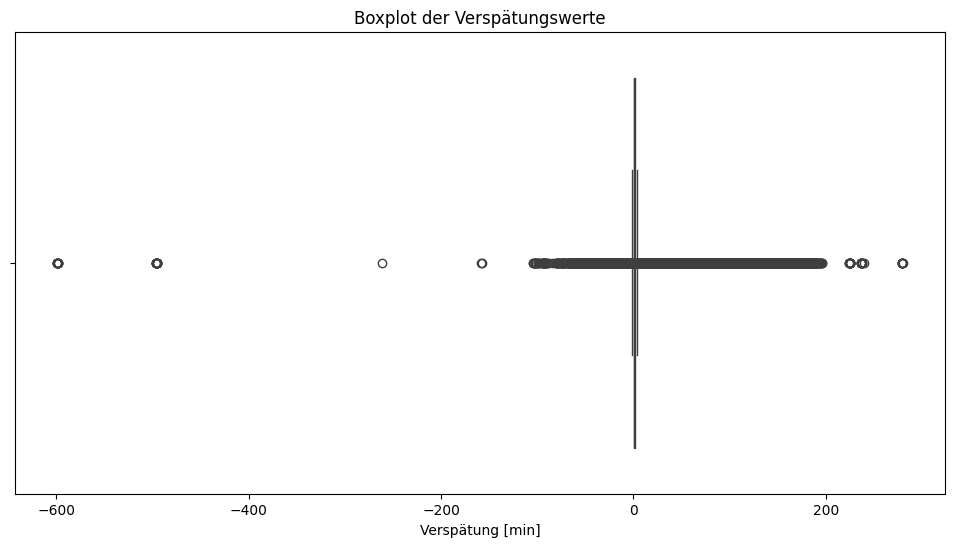

count    3.055346e+07
mean     6.313679e+01
std      1.079341e+02
min     -3.595600e+04
25%      1.600000e+01
50%      4.700000e+01
75%      8.800000e+01
max      1.679400e+04
Name: VERSPAETUNG [s], dtype: float64


In [ ]:
# 1. Boxplot der Verspätungswerte
plt.figure(figsize=(12, 6))
sns.boxplot(x = df_verkehr_2024["VERSPAETUNG [s]"] / 60)
plt.xlabel("Verspätung [min]")
plt.title("Boxplot der Verspätungswerte")
plt.show()

# 2. Statistische übersicht der Werte
print(df_verkehr_2024["VERSPAETUNG [s]"].describe())


In [ ]:
# 1.Filterbedingungen definieren für die Bereinigung der Verspätungswerte
filter_extrem_werte = df_verkehr_2024["VERSPAETUNG [s]"] <= 1800 # Nur Werte unter 30 Minuten
filter_negative_werte = df_verkehr_2024["VERSPAETUNG [s]"] > 60 # Nur Werte über 1 Minute

# 2.Filter anwenden
df_verkehr_2024_cleaned = df_verkehr_2024[filter_negative_werte & filter_extrem_werte]

# 3.Anzeige der Länge des Dataframes
print(len(df_verkehr_2024_cleaned))

12195827


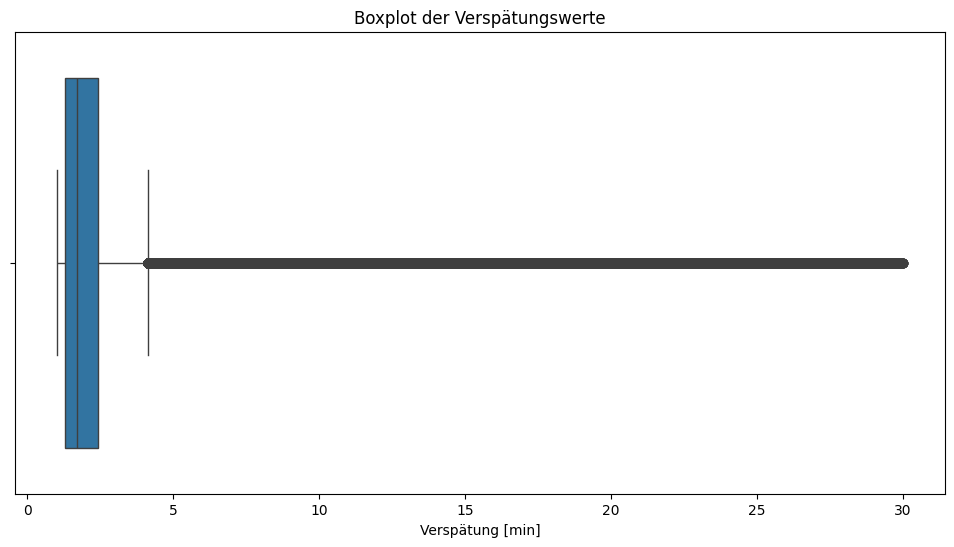

count    1.219583e+07
mean     1.277694e+02
std      8.901316e+01
min      6.100000e+01
25%      7.800000e+01
50%      1.020000e+02
75%      1.460000e+02
max      1.800000e+03
Name: VERSPAETUNG [s], dtype: float64


In [ ]:
# 1.Boxplot der bereinigten Verspätungswerte
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x = df_verkehr_2024_cleaned["VERSPAETUNG [s]"]/60)
plt.xlabel("Verspätung [min]")
plt.title("Boxplot der Verspätungswerte")
plt.show()

# 2. Statistische übersicht der Werte
print(df_verkehr_2024_cleaned["VERSPAETUNG [s]"].describe())

#### Analyse der Verkehrsdaten

/var/folders/y5/k4w6t8l1781fsnsg064n4dxw0000gn/T/ipykernel_34478/3958713496.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(weekly_sum.index.astype(str), rotation=90)


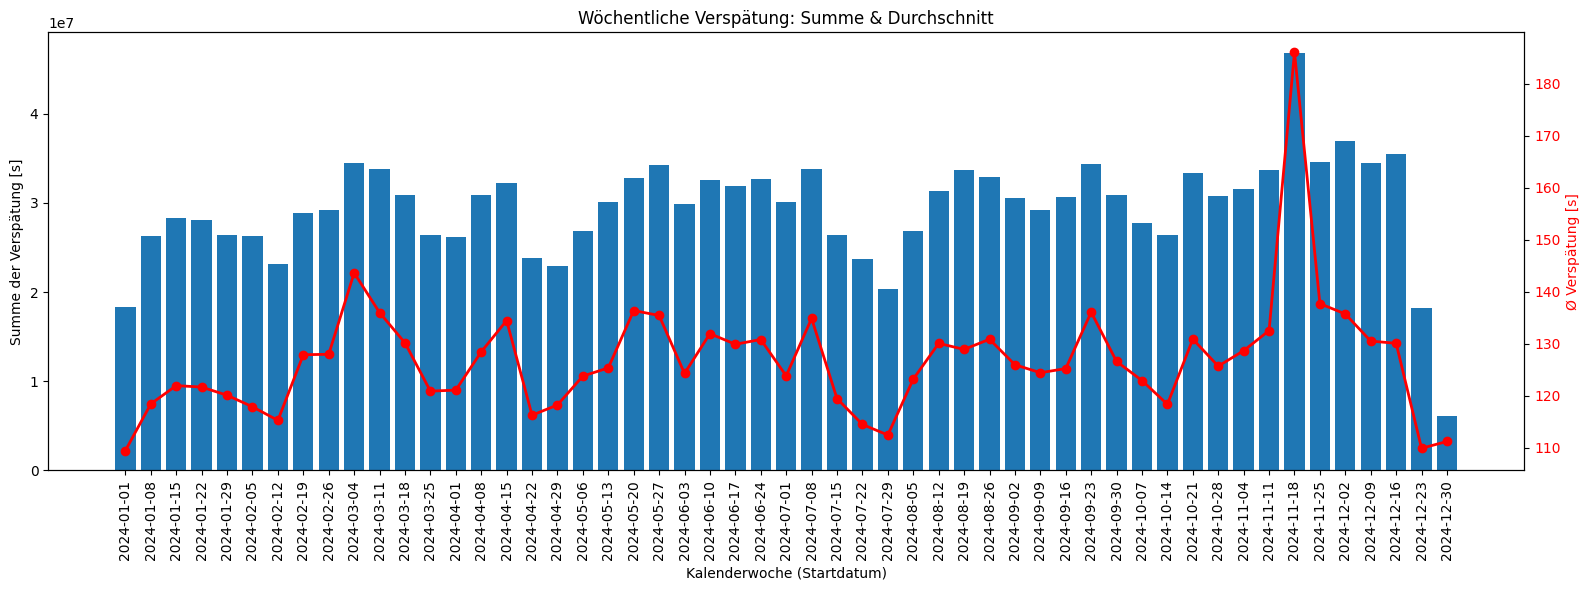

In [ ]:
# 1. Kopie der bereinigten Daten
df = df_verkehr_2024_cleaned.copy()

# 2. Kalenderwoche berechnen (als Startdatum)
df['KALENDERWOCHE'] = df['ABFAHRTSZEIT'].dt.to_period("W").dt.start_time.dt.date

# 3. Gruppierung nach Kalenderwoche
gruppe = df.groupby('KALENDERWOCHE')

# 4. Wöchentliche Summen und Mittelwerte berechnen
weekly_sum = gruppe['VERSPAETUNG [s]'].sum()
weekly_avg = gruppe['VERSPAETUNG [s]'].mean()

# 5. Plot mit zwei Y-Achsen
fig, ax1 = plt.subplots(figsize=(16, 6))

ax1.bar(weekly_sum.index.astype(str), weekly_sum.values, label='Wöchentliche Summe')
ax1.set_xlabel('Kalenderwoche (Startdatum)')
ax1.set_ylabel('Summe der Verspätung [s]')
ax1.tick_params(axis='y')
ax1.set_xticklabels(weekly_sum.index.astype(str), rotation=90)

ax2 = ax1.twinx()
ax2.plot(weekly_avg.index.astype(str), weekly_avg.values, color='red', linewidth=2, marker='o', label='Ø Verspätung')
ax2.set_ylabel('Ø Verspätung [s]', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Wöchentliche Verspätung: Summe & Durchschnitt')
fig.tight_layout()
plt.show()


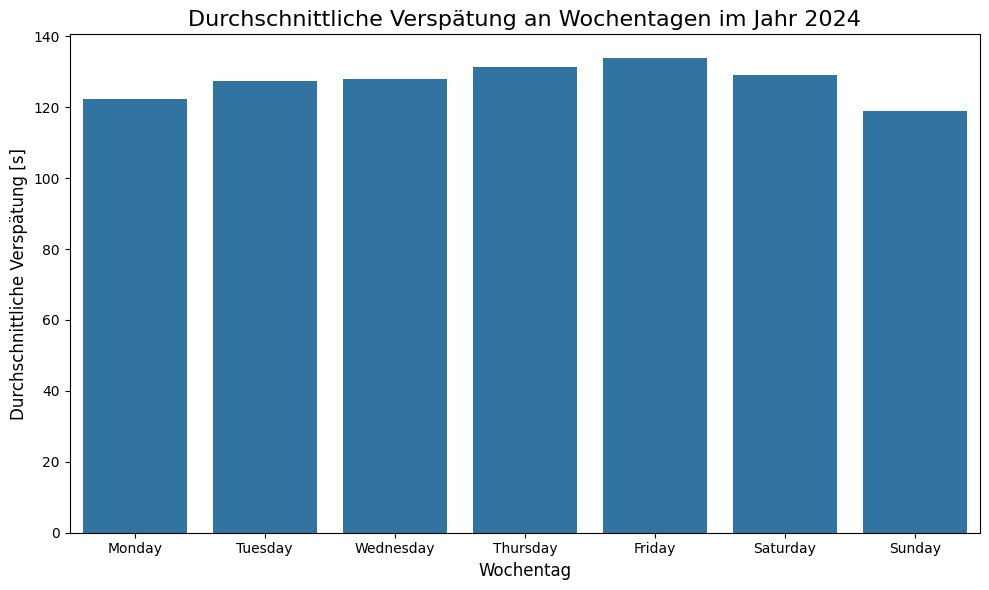

In [ ]:
# 1. Kopie der bereinigten Daten
df = df_verkehr_2024_cleaned.copy()

# 2. Extrahiere den Wochentag als String (Montag, Dienstag, ...)
df['Wochentag'] = df['ABFAHRTSZEIT'].dt.strftime('%A')  # %A gibt den vollständigen Wochentagsnamen zurück

# 3. Gruppiere nach Wochentag und berechne die durchschnittliche Verspätung pro Wochentag
weekday_delays_avg = df.groupby('Wochentag')['VERSPAETUNG [s]'].mean()

# 4. Sortiere die Wochentage gemäß der Reihenfolge von Montag bis Sonntag
wochentage_sort = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_delays_avg = weekday_delays_avg[wochentage_sort]

# 5. Barplot für die durchschnittliche Verspätung an den unterschiedlichen Wochentagen
plt.figure(figsize=(10,6))
sns.barplot(x=weekday_delays_avg.index, y=weekday_delays_avg.values)

plt.title('Durchschnittliche Verspätung an Wochentagen im Jahr 2024', fontsize=16)
plt.xlabel('Wochentag', fontsize=12)
plt.ylabel('Durchschnittliche Verspätung [s]', fontsize=12)

plt.tight_layout()
plt.show()

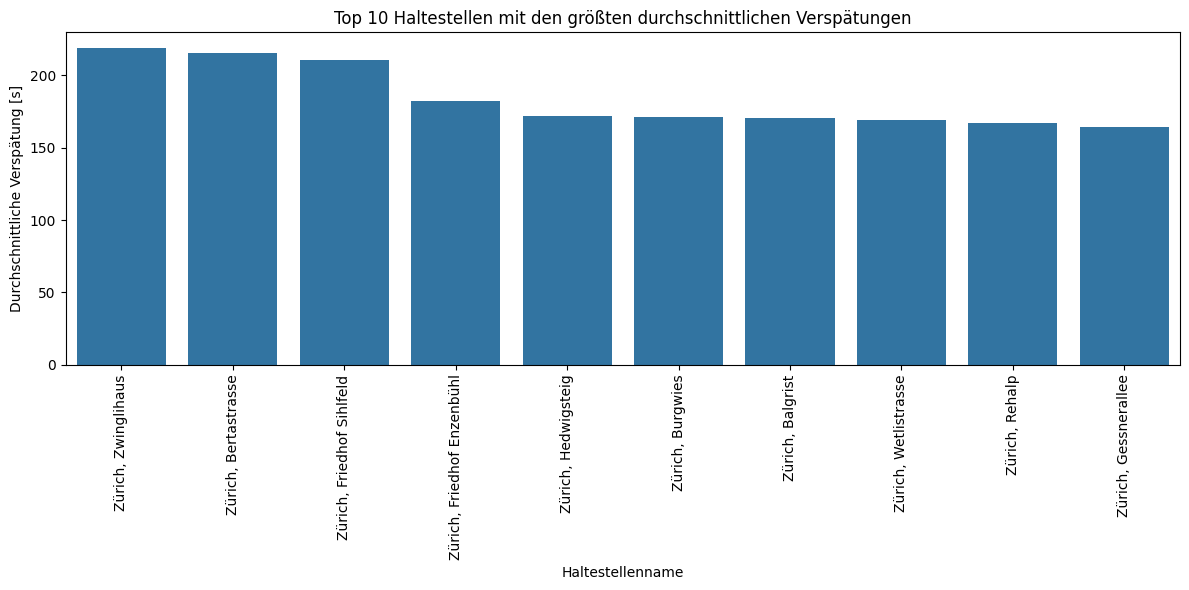

In [ ]:
# 1. Kopie der bereinigten Daten
df = df_verkehr_2024_cleaned.copy()

# 2. Gruppiere nach Haltestellen und berechne die durchschnittliche Verspätung pro Haltestelle
halt_delays_avg = df.groupby('HALTESTELLEN_NAME')['VERSPAETUNG [s]'].mean()

# 3. Zeige nur die 10 Haltestellen mit der größten durchschnittlichen Verspätung
halt_delays_top10 = halt_delays_avg.nlargest(10)

# 4. Barplot für die 10 Haltestellen mit den größten durchschnittlichen Verspätungen
plt.figure(figsize=(12,6))
sns.barplot(x=halt_delays_top10.index, y=halt_delays_top10.values)

plt.title('Top 10 Haltestellen mit den größten durchschnittlichen Verspätungen')
plt.xlabel('Haltestellenname')
plt.ylabel('Durchschnittliche Verspätung [s]')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

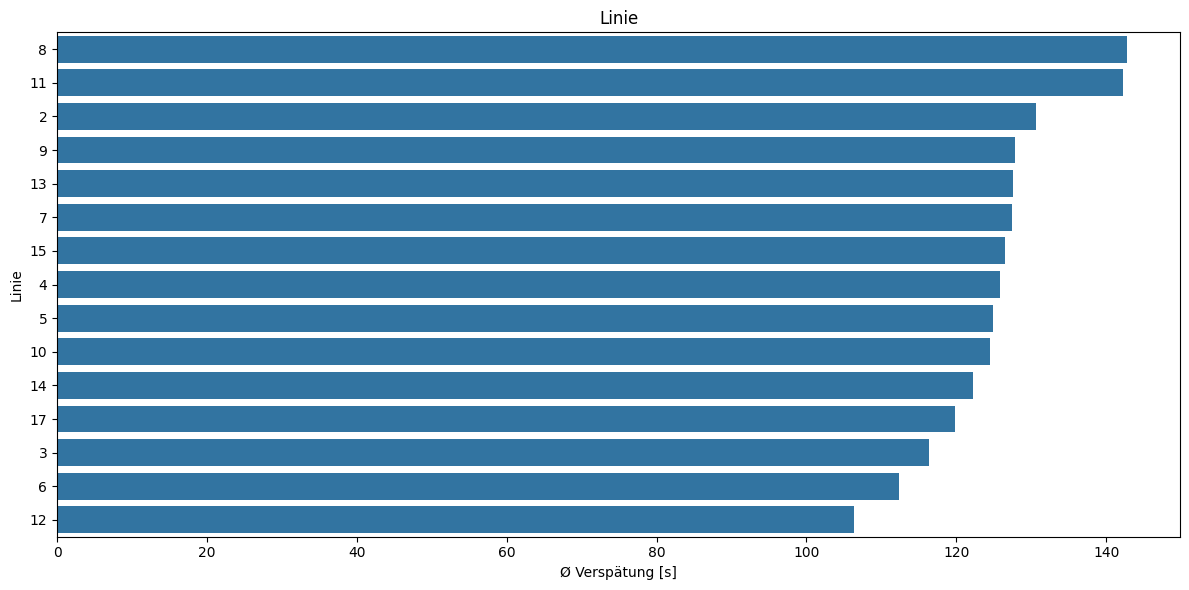

In [ ]:
# 1. Datensatz als Visualisieurngsgrundlage erstellen mit durchschnittlichen Verspätungswerten pro Tram-Linie
verspaetungen_mean = df_verkehr_2024_cleaned.groupby("LINIEN_TEXT", as_index=False)["VERSPAETUNG [s]"].mean()

# 2. Barplot mit den durschnittlichen Verspätungen in Sekunden pro Tram-Linie
plt.figure(figsize=(12, 6))
sns.barplot(data=verspaetungen_mean, y="LINIEN_TEXT", x="VERSPAETUNG [s]", order=verspaetungen_mean.sort_values("VERSPAETUNG [s]", ascending=False)["LINIEN_TEXT"])
plt.ylabel("Linie")
plt.xlabel("Ø Verspätung [s]")
plt.title("Linie")
plt.tight_layout()
plt.show()

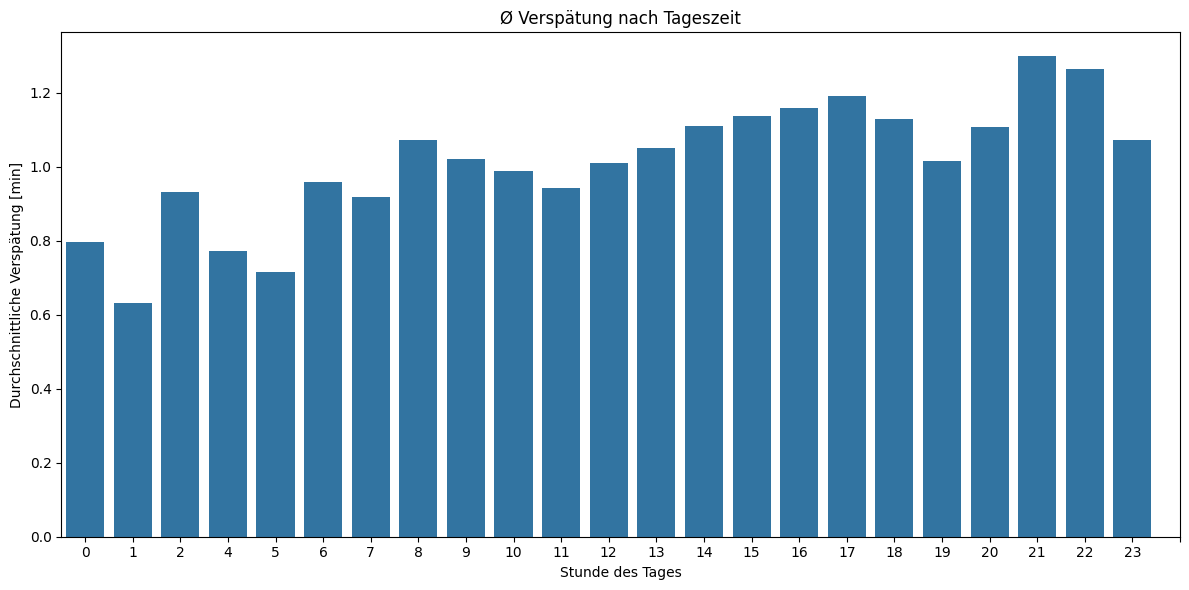

In [ ]:
# 1. Datensatz als Visualisieurngsgrundlage erstellen aggregierten Verspätungen pro Stunde
df_verkehr_2024["STUNDE"] = df_verkehr_2024["ABFAHRTSZEIT"].dt.hour
verspaetung_pro_stunde = df_verkehr_2024.groupby("STUNDE")["VERSPAETUNG [s]"].mean().reset_index()
verspaetung_pro_stunde["VERSPAETUNG [min]"] = verspaetung_pro_stunde["VERSPAETUNG [s]"] / 60

# 2. Barplot derdurschnittlicher Verspätungen im Tagesverlauf (pro Stunde)
plt.figure(figsize=(12, 6))
sns.barplot(data=verspaetung_pro_stunde, x="STUNDE", y="VERSPAETUNG [min]")
plt.title("Ø Verspätung nach Tageszeit")
plt.xlabel("Stunde des Tages")
plt.ylabel("Durchschnittliche Verspätung [min]")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

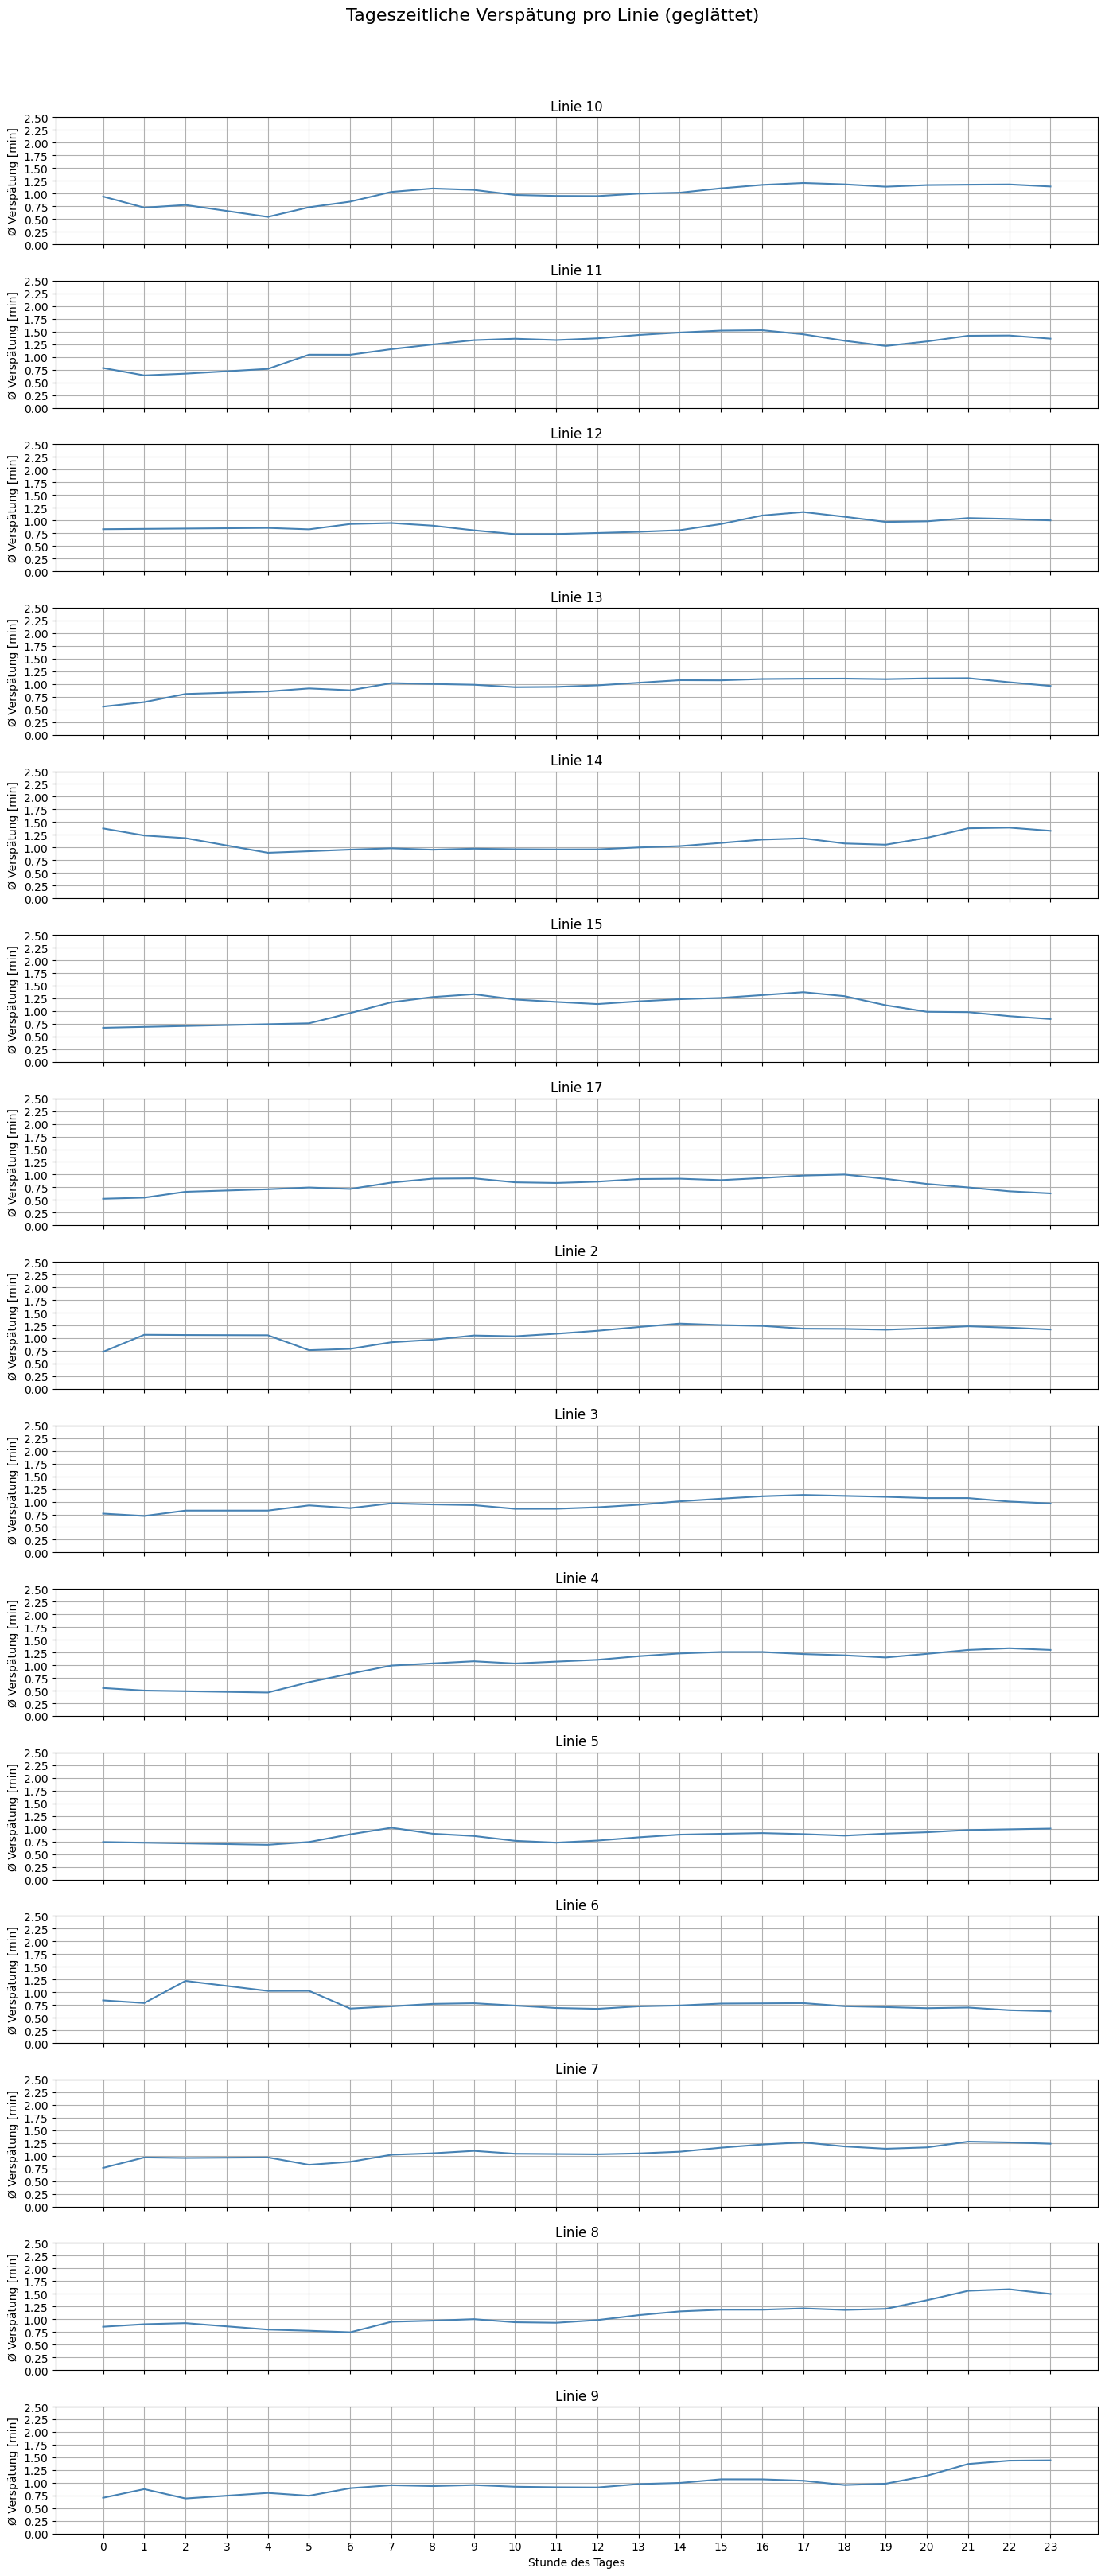

In [ ]:
# 1. Datensatz kopieren
df_linien_plot = df_verkehr_2024.copy()

# 2. Stunde extrahieren
df_linien_plot["STUNDE"] = df_linien_plot["ABFAHRTSZEIT"].dt.hour

# 3. Gruppieren nach Linie und Stunde → mittlere Verspätung in Sekunden
df_grouped = (
    df_linien_plot.groupby(["LINIEN_TEXT", "STUNDE"])["VERSPAETUNG [s]"]
    .mean()
    .reset_index()
)

# 4. Verspätung in Minuten umrechnen
df_grouped["VERSPAETUNG [min]"] = df_grouped["VERSPAETUNG [s]"] / 60

# 5. Gleitender Mittelwert (optional zur Glättung von Spitzen)
df_grouped["VERSPAETUNG_GLATT"] = (
    df_grouped
    .groupby("LINIEN_TEXT")["VERSPAETUNG [min]"]
    .transform(lambda x: x.rolling(window=3, center=True, min_periods=1).mean())
)

# 6. Alle Linien extrahieren
alle_linien = df_grouped["LINIEN_TEXT"].unique()

# 7. Subplots vorbereiten: ein Plot pro Linie untereinander
fig, axes = plt.subplots(
    nrows=len(alle_linien), ncols=1,
    figsize=(14, len(alle_linien)*2.2),
    sharex=True
)

for ax, linie in zip(axes, alle_linien):
    df_line = df_grouped[df_grouped["LINIEN_TEXT"] == linie]
    sns.lineplot(data=df_line, x="STUNDE", y="VERSPAETUNG_GLATT", ax=ax, color="steelblue")
    ax.set_title(f"Linie {linie}")
    ax.set_ylabel("Ø Verspätung [min]")
    ax.set_xticks(range(0, 24))
    ax.set_yticks(np.arange(0, 2.75, 0.25))
    ax.grid(True)

plt.suptitle("Tageszeitliche Verspätung pro Linie (geglättet)", fontsize=16)
plt.xlabel("Stunde des Tages")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 3.2 Wetterdaten

### 3.2.1 Import Wetterdatensatz 1
Zunächst wurde auf IDAweb nach einer Wetterstation gesucht, die zentral in der Stadt Zürich liegt und genügend unterschiedliche, relevante und aktuelle Wetterdaten zur Verfügung stellt. Leider ist die Plattform nicht sehr benutzerfreundlich und die Suche erwies sich als sehr aufwändig. Nach erfolgter Suche wurde die Wetterstation Zürich Kaserne (NABZUE) als geeignetste Wetterstation identifiziert. Wir haben die folgenden fünf Wetterparameter (Granularität=stündlich) für den Zeitraum vom 1.1.2022 bis zum 31.12.2024 heruntergeladen:

*   Böenspitze (Sekundenböe); Stundenmaximum in km/h
*   Globalstrahlung; Stundenmittel in W/m²
*   Lufttemperatur; 2 m über Boden; Stundenmittel in °C
*   Niederschlag; Stundensumme in mm
*   Windgeschwindigkeit skalar; Stundenmittel in km/h


Die Legende zum Wetterdatensatz kann in folgender Datei eingesehen werden: Legende_Wetterdatensatz1.txt

In [ ]:
# 1. Wetterdatensatz 1 einlesen (Böenspitze_kmh, Globalstrahlung_Wm2, Temperatur_C, Niederschlag_mm, Windgeschwindigkeit_kmh)
url = "https://raw.githubusercontent.com/RFankhauser/MSc_WI_BINA/refs/heads/main/Semesterarbeit/Wetterdaten/Wetterdatensatz1.csv"
df_wetter1= pd.read_csv(url,
                        sep=";",
                        encoding="utf-8")

# 2. Spaltennamen umbenennen (gemäss der Legende)
parameter_mapping1 = {
    "fu3010h1": "BOEENSPITZE [kmh]",
    "gre000h0": "GLOBALSTRAHLUNG [Wm2]",
    "tre200h0": "TEMPERATUR [°C]",
    "rre150h0": "NIEDERSCHLAG [mm]",
    "fu3010h0": "WINDGESCHWINDIGKEIT [kmh]"
}

df_wetter1 = df_wetter1.rename(columns=parameter_mapping1)
df_wetter1 = df_wetter1.rename(columns={"stn": "WETTERSTATION", "time": "TIME"})

# 3. 'TIME' in Datetime umwandeln
df_wetter1['TIME'] = pd.to_datetime(df_wetter1['TIME'], format='%Y%m%d%H', errors='coerce')

# 4. Filtern nach dem Jahr 2024
df_wetter1 = df_wetter1[df_wetter1['TIME'].dt.year == 2024]

# 5. Überprüfung der Spalteninhalte nach dem Filtern
anzahl_2024 = len(df_wetter1)
print(f"Anzahl der Einträge für 2024: {anzahl_2024}")

# 6. Anzeigen der ersten 10 Zeilen
display(df_wetter1.head(10))

Anzahl der Einträge für 2024: 8784


,WETTERSTATION,TIME,BOEENSPITZE [kmh],GLOBALSTRAHLUNG [Wm2],TEMPERATUR [°C],NIEDERSCHLAG [mm],WINDGESCHWINDIGKEIT [kmh]
17520,NABZUE,2024-01-01 00:00:00,40.7,3,5.1,0.0,10.4
17521,NABZUE,2024-01-01 01:00:00,24.8,-1,5.1,0.0,7.9
17522,NABZUE,2024-01-01 02:00:00,32.0,-1,5.2,0.0,9.4
17523,NABZUE,2024-01-01 03:00:00,21.2,0,5.3,0.1,9.4
17524,NABZUE,2024-01-01 04:00:00,50.4,0,4.9,1.1,15.5
17525,NABZUE,2024-01-01 05:00:00,33.5,0,5.3,0.0,12.6
17526,NABZUE,2024-01-01 06:00:00,33.8,0,5.6,0.0,10.4
17527,NABZUE,2024-01-01 07:00:00,36.7,0,6.0,0.0,11.9
17528,NABZUE,2024-01-01 08:00:00,35.3,12,6.3,0.0,11.9
17529,NABZUE,2024-01-01 09:00:00,31.3,51,6.7,0.0,10.1


### 3.2.2 Import Wetterdatensatz 2
Im Wetterdatensatz 1 (Station Zürich Kaserne) sind leider keine Wetterdaten für Schnee, Hagel und Nebel vorhanden. Deshalb wurde nach einer anderen Wetterstation in Zürich gesucht, die diese Daten erfasst. Nach der Suche wurde die Wetterstation Zürich Kloten (KLO) als geeignetste Wetterstation identifiziert. Wir haben die folgenden vier Wetterparameter (Granularität=täglich) für den Zeitraum vom 1.1.2024 bis zum 31.12.2024 heruntergeladen:

-Neuschneehöhe; Tagessumme 6 UTC - 6 UTC Folgetag in cm

-Schneehöhe; Morgenmessung von 6 UTC in cm

-Tag mit Hagel; y/n

-Tag mit Nebel; y/n

Die Legende zum Wetterdatensatz kann in folgender Datei eingesehen werden: Legende_Wetterdatensatz2.txt


In [ ]:
# 1. Wetterdatensatz 2 einlesen (Neuschneehöhe_cm,Schneehöhe_Morgenmessung_6_UTC_cm,Tag_mit_Hagel,Tag_mit_Nebel)
url2 = "https://raw.githubusercontent.com/RFankhauser/MSc_WI_BINA/refs/heads/main/Semesterarbeit/Wetterdaten/Wetterdatensatz2.csv"
df_wetter2 = pd.read_csv(url2,
                         sep=";",
                         encoding="utf-8")

# 2. Spaltennamen anpassen (gemäss der Legende)
parameter_mapping2 = {
    "hns000d0": "NEUSCHNEEHOEHE [cm]",
    "hto000d0": "SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]",
    "w3p002d0": "TAG_MIT_HAGEL",
    "w5p002d0": "TAG_MIT_NEBEL"
}

df_wetter2 = df_wetter2.rename(columns=parameter_mapping2)
df_wetter2 = df_wetter2.rename(columns={"stn": "WETTERSTATION_2", "time": "TIME_2"})

# 3. 'TIME_2' in Datetime umwandeln
df_wetter2['TIME_2'] = pd.to_datetime(df_wetter2['TIME_2'], format='%Y%m%d', errors='coerce')

# 4. Anzeigen der ersten 10 Zeilen
display(df_wetter2.head(10))

,WETTERSTATION_2,TIME_2,NEUSCHNEEHOEHE [cm],SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm],TAG_MIT_HAGEL,TAG_MIT_NEBEL
0,KLO,2024-01-01,0,0,0,0
1,KLO,2024-01-02,0,0,0,0
2,KLO,2024-01-03,0,0,0,0
3,KLO,2024-01-04,0,0,0,0
4,KLO,2024-01-05,0,0,0,0
5,KLO,2024-01-06,0,0,0,0
6,KLO,2024-01-07,0,0,0,0
7,KLO,2024-01-08,0,0,0,0
8,KLO,2024-01-09,2,0,0,0
9,KLO,2024-01-10,0,2,0,0


### 3.2.3 Zusammenführen der beiden Wetterdatensätze

Der Wetterdatensatz 2 hat nur eine tägliche Granularität, daher müssen die Tageswerte auf 24 Stunden multipliziert werden. Ansonsten kann das Zusammenführen der Datensätze aufgrund der unterschiedlichen Tabellenformate nicht funktionieren. Anschlissend werden die beiden Datensätze zusammengeführt.

In [ ]:
# 1. Wiederhole die täglichen Werte von df_wetter2 für jede Stunde des Tages
df_wetter2_repeated = df_wetter2.loc[df_wetter2.index.repeat(24)].reset_index(drop=True)

# 2. Kombiniere die beiden DataFrames
df_wetter = pd.concat([df_wetter1.reset_index(drop=True), df_wetter2_repeated], axis=1)

# 3. Entferne die Spalten 'WETTERSTATION_2' und 'TIME_2' aus dem kombinierten DataFrame
df_wetter = df_wetter.drop(columns=['WETTERSTATION_2', 'TIME_2'])

# 4. Anzeigen der ersten 10 Zeilen
display(df_wetter.head(10))

,WETTERSTATION,TIME,BOEENSPITZE [kmh],GLOBALSTRAHLUNG [Wm2],TEMPERATUR [°C],NIEDERSCHLAG [mm],WINDGESCHWINDIGKEIT [kmh],NEUSCHNEEHOEHE [cm],SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm],TAG_MIT_HAGEL,TAG_MIT_NEBEL
0,NABZUE,2024-01-01 00:00:00,40.7,3,5.1,0.0,10.4,0,0,0,0
1,NABZUE,2024-01-01 01:00:00,24.8,-1,5.1,0.0,7.9,0,0,0,0
2,NABZUE,2024-01-01 02:00:00,32.0,-1,5.2,0.0,9.4,0,0,0,0
3,NABZUE,2024-01-01 03:00:00,21.2,0,5.3,0.1,9.4,0,0,0,0
4,NABZUE,2024-01-01 04:00:00,50.4,0,4.9,1.1,15.5,0,0,0,0
5,NABZUE,2024-01-01 05:00:00,33.5,0,5.3,0.0,12.6,0,0,0,0
6,NABZUE,2024-01-01 06:00:00,33.8,0,5.6,0.0,10.4,0,0,0,0
7,NABZUE,2024-01-01 07:00:00,36.7,0,6.0,0.0,11.9,0,0,0,0
8,NABZUE,2024-01-01 08:00:00,35.3,12,6.3,0.0,11.9,0,0,0,0
9,NABZUE,2024-01-01 09:00:00,31.3,51,6.7,0.0,10.1,0,0,0,0


### 3.2.4 Datenbereinigung & Formatierung

Die relevanten Spalten werden in numerische Werte (Float) umgewandelt. Ungültige Werte (-) werden als NaN markiert und anschliessend mit dem Durchschnitt der jeweiligen Spalte ersetzt. Abschliessend werden die Anzahl verbleibender NaN-Werte ausgegeben, um sicherzustellen, dass keine Datenlücken mehr vorhanden sind.


In [ ]:
# 1. Umwandlung der angegebenen Spalten in float
columns_to_convert = ["BOEENSPITZE [kmh]", "GLOBALSTRAHLUNG [Wm2]", "TEMPERATUR [°C]",  "NIEDERSCHLAG [mm]",
                      "WINDGESCHWINDIGKEIT [kmh]", "NEUSCHNEEHOEHE [cm]",
                     "SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]"]

# 2. Ersetzen von "-" durch NaN in den relevanten Spalten
df_wetter[columns_to_convert] = df_wetter[columns_to_convert].replace("-", np.nan)

# 3. Konvertierung der Spalten in float
df_wetter[columns_to_convert] = df_wetter[columns_to_convert].astype(float)

# 4. Überprüfung der Datentypen nach der Umwandlung
print(df_wetter.dtypes)

# 5. Durchschnitt für jede Spalte berechnen und fehlende Werte durch den jeweiligen Durchschnitt ersetzen
df_wetter.fillna(df_wetter.mean(numeric_only=True), inplace=True)

# 6. Anzahl der NaN-Werte pro Spalte anzeigen
nan_summary = df_wetter.isna().sum()

# 7. Anzahl der NaN-Werte pro Spalte ausgeben
print("\n--- Anzahl der NaN-Werte pro Spalte: --------")
print(nan_summary)

WETTERSTATION                                   object
TIME                                    datetime64[ns]
BOEENSPITZE [kmh]                              float64
GLOBALSTRAHLUNG [Wm2]                          float64
TEMPERATUR [°C]                                float64
NIEDERSCHLAG [mm]                              float64
WINDGESCHWINDIGKEIT [kmh]                      float64
NEUSCHNEEHOEHE [cm]                            float64
SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]           float64
TAG_MIT_HAGEL                                    int64
TAG_MIT_NEBEL                                    int64
dtype: object

--- Anzahl der NaN-Werte pro Spalte: --------
WETTERSTATION                           0
TIME                                    0
BOEENSPITZE [kmh]                       0
GLOBALSTRAHLUNG [Wm2]                   0
TEMPERATUR [°C]                         0
NIEDERSCHLAG [mm]                       0
WINDGESCHWINDIGKEIT [kmh]               0
NEUSCHNEEHOEHE [cm]                     

### 3.2.5 Überprüfung der Wetterdaten

Zur besseren Lesbarkeit und Interpretation wurden die Wetterdaten mithilfe eines gleitenden Durchschnitts über 24 Stunden geglättet. Für jede Wettervariable (z. B. Temperatur, Windgeschwindigkeit, Niederschlag) wurde ein eigener Plot erstellt, um den zeitlichen Verlauf über das Jahr hinweg übersichtlich darzustellen.

Die Visualisierung dient gleichzeitig der **Plausibilitätsprüfung** der Wetterdaten. Es zeigen sich erwartbare saisonale Muster:

- **Temperatur**: Anstieg im Frühjahr, Höchstwerte im Sommer, Rückgang im Herbst und Tiefstwerte im Winter.
- **Globalstrahlung**: Hohes Niveau während der Sommermonate, niedriges im Winter.
- **Wind, Böen, Niederschlag**: Schwankungen über das Jahr hinweg mit möglichen Extremwerten in Übergangszeiten.
- **Neuschneehöhe und Schneehöhe**: Auftreten nur im Winterhalbjahr, sonst keine Werte – wie zu erwarten.

Diese Muster bestätigen, dass die Daten **sinnvolle und konsistente Werte** aufweisen. Unplausible Werte oder offensichtliche Datenfehler sind anhand der Plots nicht erkennbar, was auf eine **gute Datenqualität** hindeutet.

Ergänzend zur Zeitreihendarstellung wurde jede Wettervariable auch in Form einer **Kalender-Heatmap** visualisiert. Diese Darstellungsform zeigt für jeden Tag im Jahr den entsprechenden **Tagesdurchschnittswert** und eignet sich besonders gut, um **saisonale Trends, Extremwerte** oder auch **Auffälligkeiten einzelner Tage** auf einen Blick zu erkennen.

Die kompakten Kalenderplots stellen eine intuitive Ergänzung zur gleitenden Mittelwertanalyse dar und bestätigen die zuvor beobachteten Muster nochmals in einer anderen, sehr zugänglichen Form. Besonders hilfreich sind sie auch zur visuellen Identifikation von **länger anhaltenden Wetterphasen** (z. B. Hitzeperioden oder Regenzeiten).

Anschliessend wird mit df_wetter.describe() automatisch die wichtigsten statistischen Kennzahlen für alle numerischen Spalten im Wetter-Datensatz berechnet.

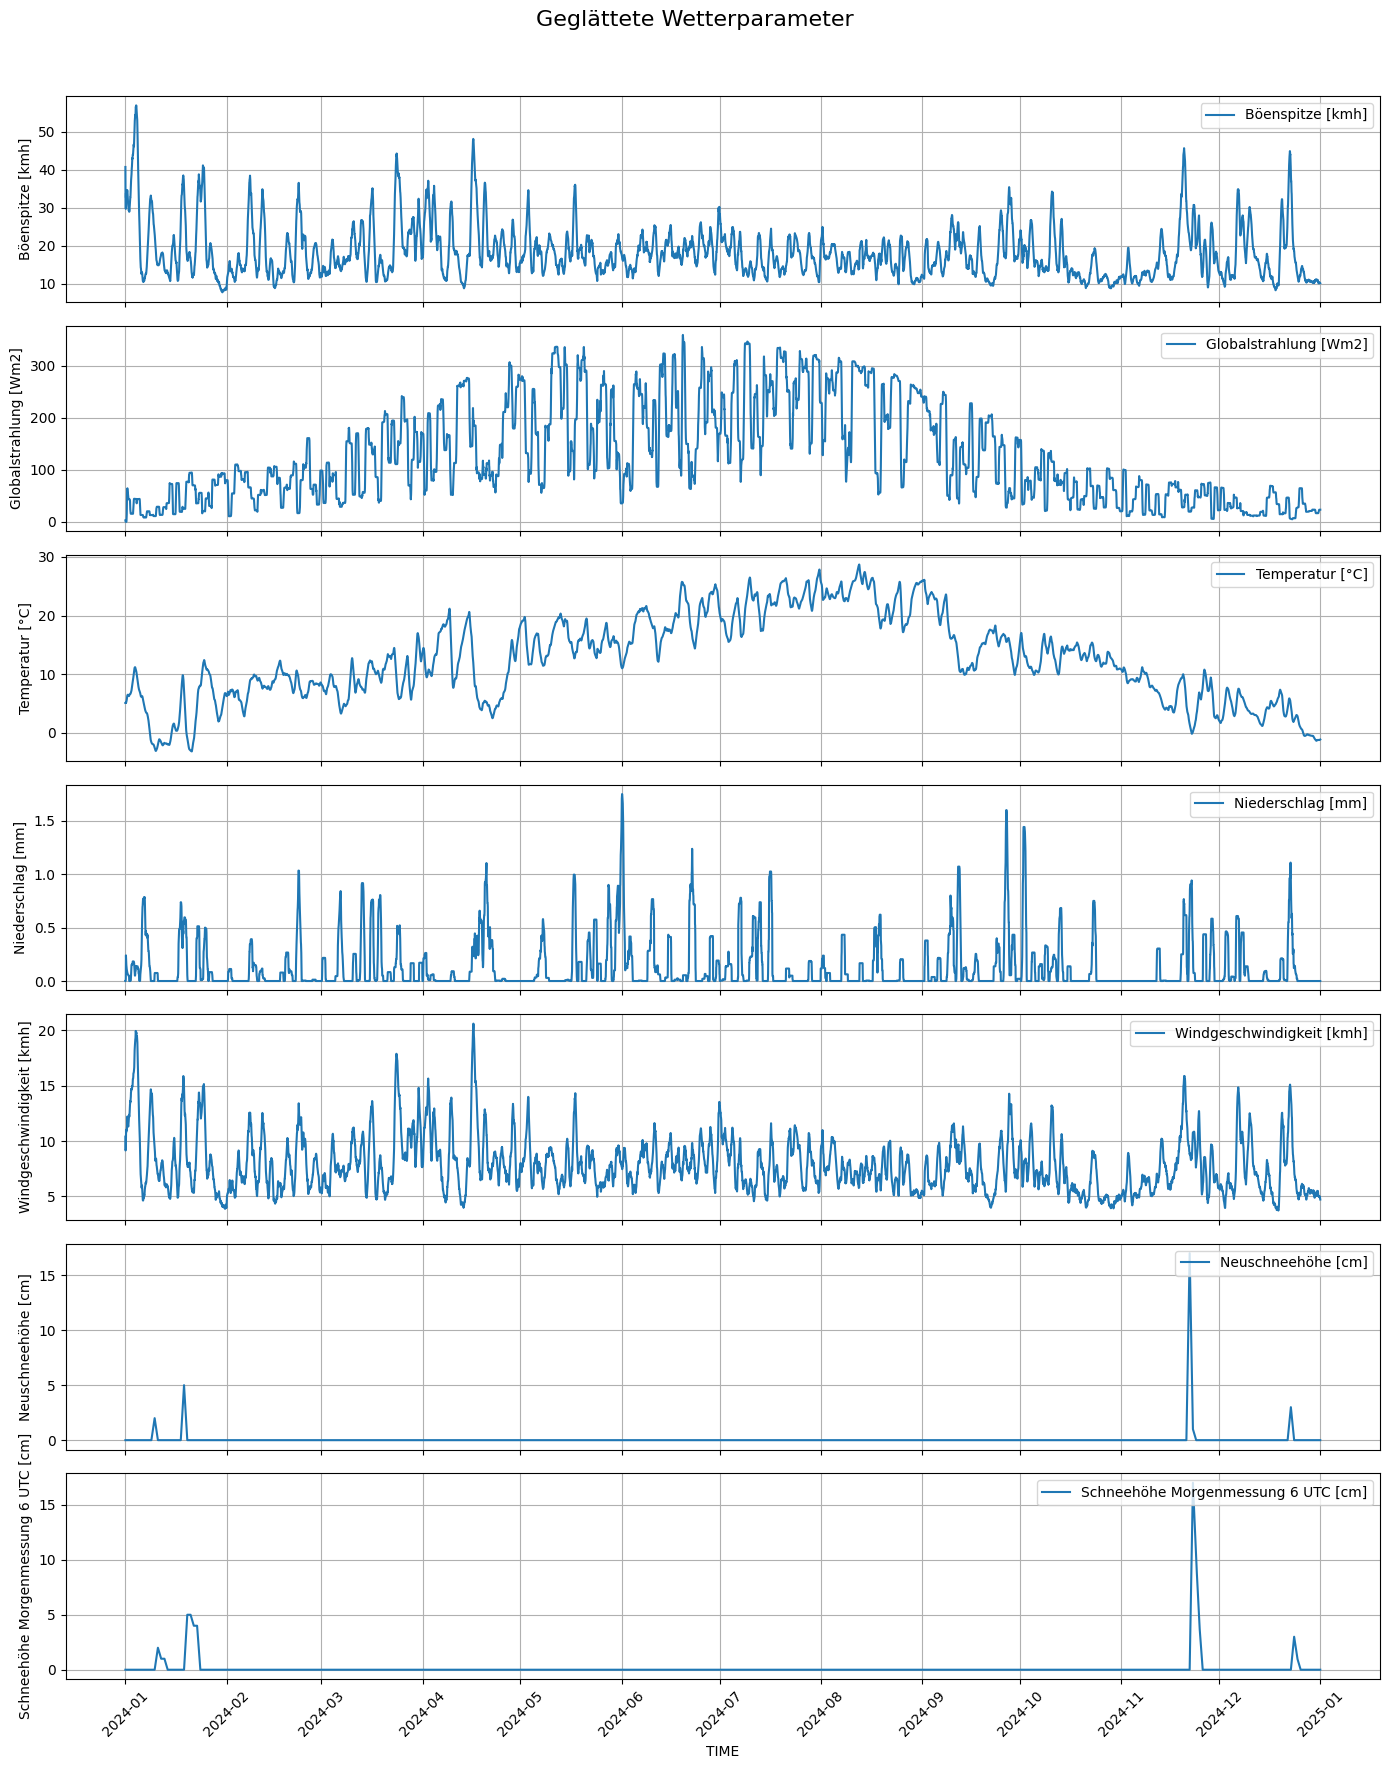

In [ ]:
# 1. Wetterdaten kopieren, damit das Original unverändert bleibt
df_wetter_plot = df_wetter.copy()

# 2. Gleitender Mittelwert über 24 Stunden berechnen (für jede Wettervariable) → Ziel: kurzfristige Schwankungen glätten
df_wetter_plot["BOEENSPITZE_GLATT"] = df_wetter_plot["BOEENSPITZE [kmh]"].rolling(window=24, min_periods=1).mean()
df_wetter_plot["GLOBALSTRAHLUNG_GLATT"] = df_wetter_plot["GLOBALSTRAHLUNG [Wm2]"].rolling(window=24, min_periods=1).mean()
df_wetter_plot["TEMPERATUR_GLATT"] = df_wetter_plot["TEMPERATUR [°C]"].rolling(window=24, min_periods=1).mean()  # 7 Tage
df_wetter_plot["NIEDERSCHLAG_GLATT"] = df_wetter_plot["NIEDERSCHLAG [mm]"].rolling(window=24, min_periods=1).mean()
df_wetter_plot["WIND_GLATT"] = df_wetter_plot["WINDGESCHWINDIGKEIT [kmh]"].rolling(window=24, min_periods=1).mean()
df_wetter_plot["NEUSCHNEE_GLATT"] = df_wetter_plot["NEUSCHNEEHOEHE [cm]"].rolling(window=24, min_periods=1).mean()
df_wetter_plot["SCHNEEHOEHE_GLATT"] = df_wetter_plot["SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]"].rolling(window=24, min_periods=1).mean()

# 3. Spaltennamen + passende Achsenbeschriftungen definieren
plot_info = {
    "BOEENSPITZE_GLATT": "Böenspitze [kmh]",
    "GLOBALSTRAHLUNG_GLATT": "Globalstrahlung [Wm2]",
    "TEMPERATUR_GLATT": "Temperatur [°C]",
    "NIEDERSCHLAG_GLATT": "Niederschlag [mm]",
    "WIND_GLATT": "Windgeschwindigkeit [kmh]",
    "NEUSCHNEE_GLATT": "Neuschneehöhe [cm]",
    "SCHNEEHOEHE_GLATT": "Schneehöhe Morgenmessung 6 UTC [cm]"
}

# 4. Subplots (ein Diagramm pro Wettervariable) erzeugen
fig, axes = plt.subplots(nrows=len(plot_info), ncols=1, figsize=(14, 18), sharex=True)

# 5. Jede geglättete Variable einzeln plotten
for ax, (col, label) in zip(axes, plot_info.items()):
    sns.lineplot(x="TIME", y=col, data=df_wetter_plot, ax=ax, label=label)
    ax.set_ylabel(label)
    ax.legend(loc="upper right")
    ax.grid(True)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


# 6. Gesamttitel, Layout und Achsenbeschriftung setzen
plt.suptitle("Geglättete Wetterparameter", fontsize=16)
# plt.xlabel("Datum")
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

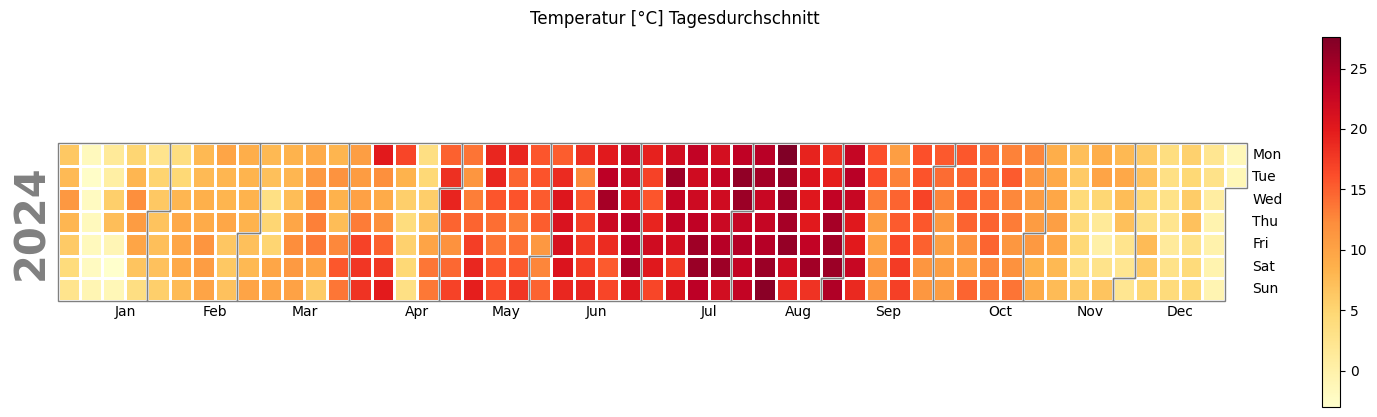

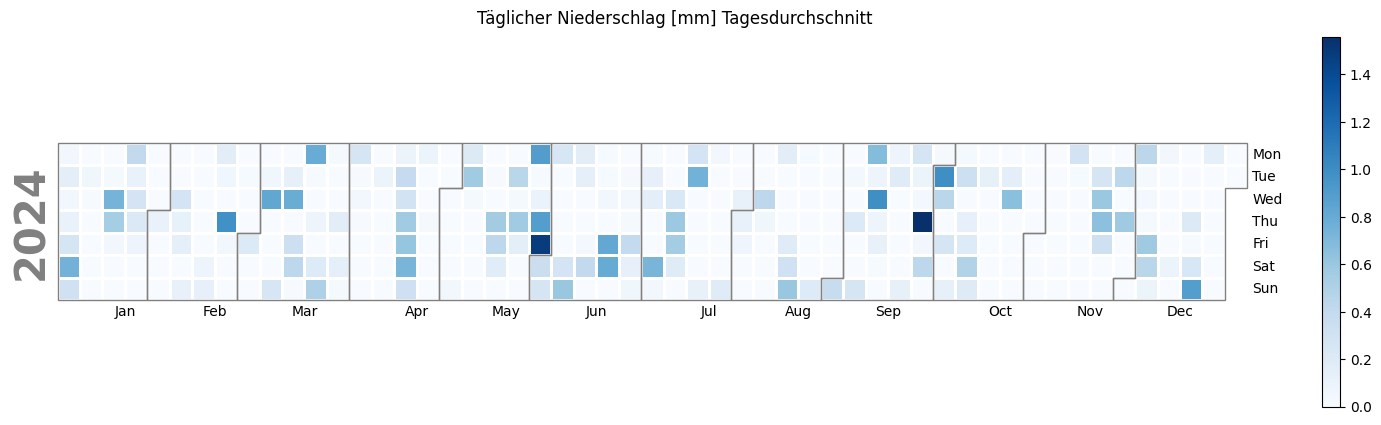

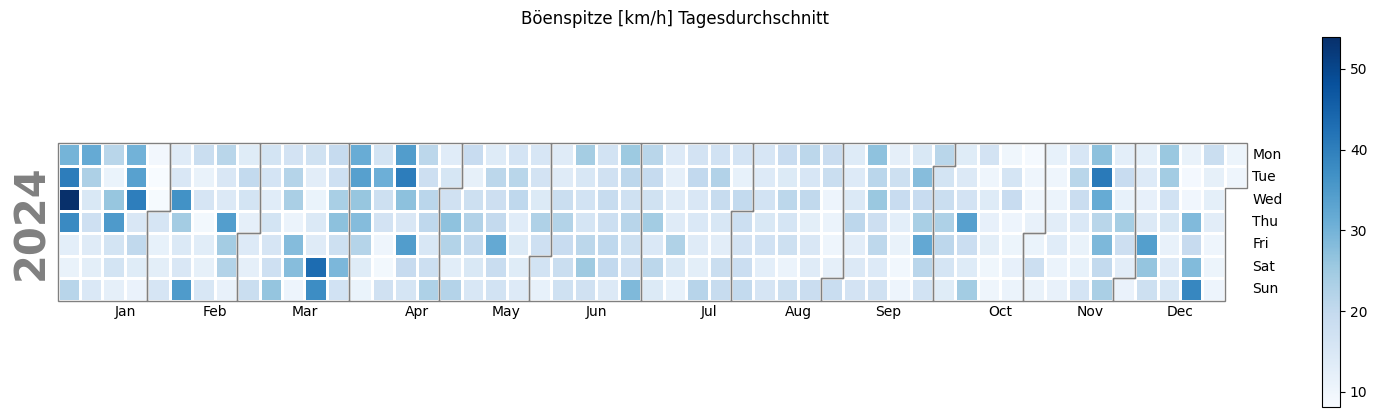

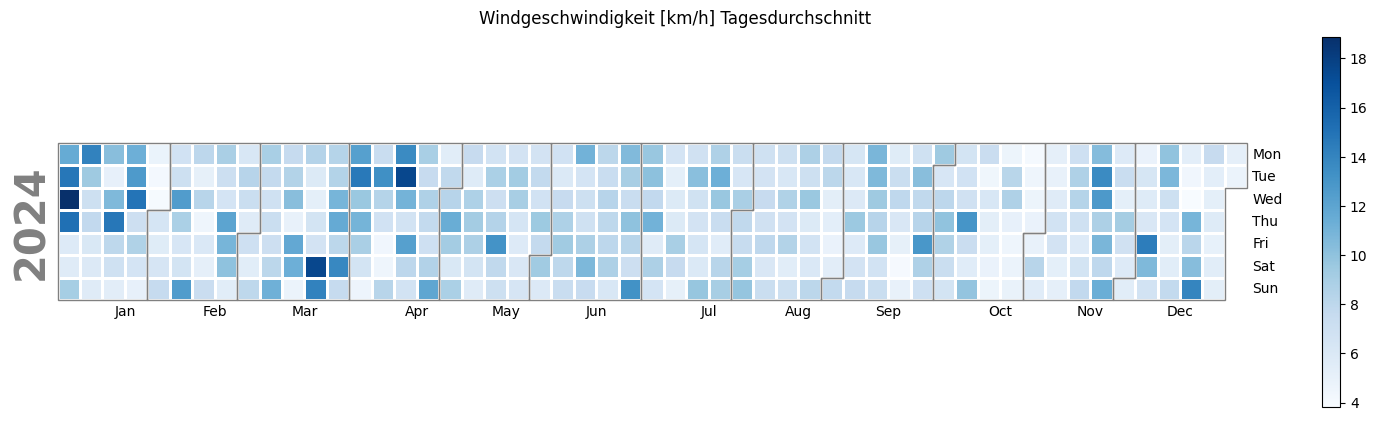

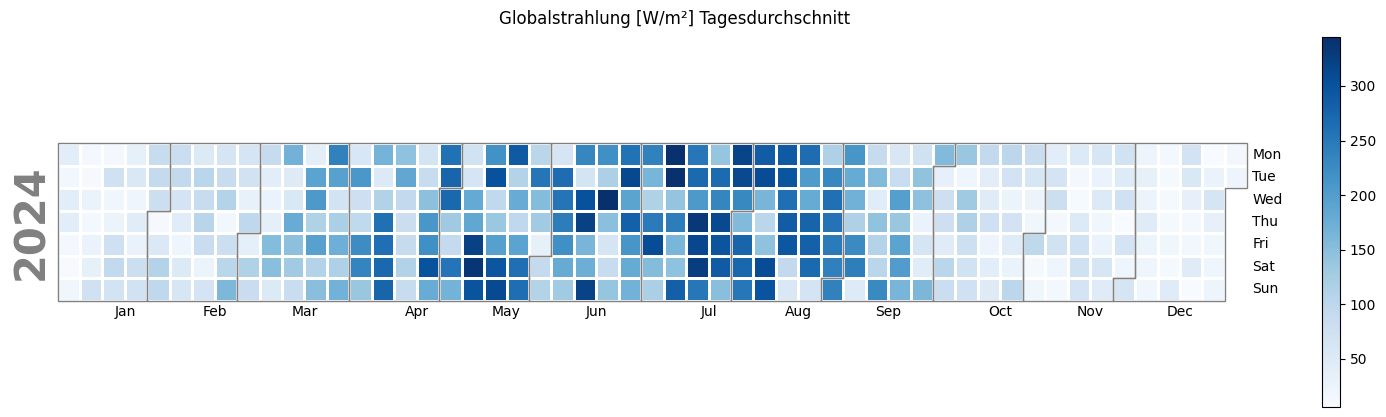

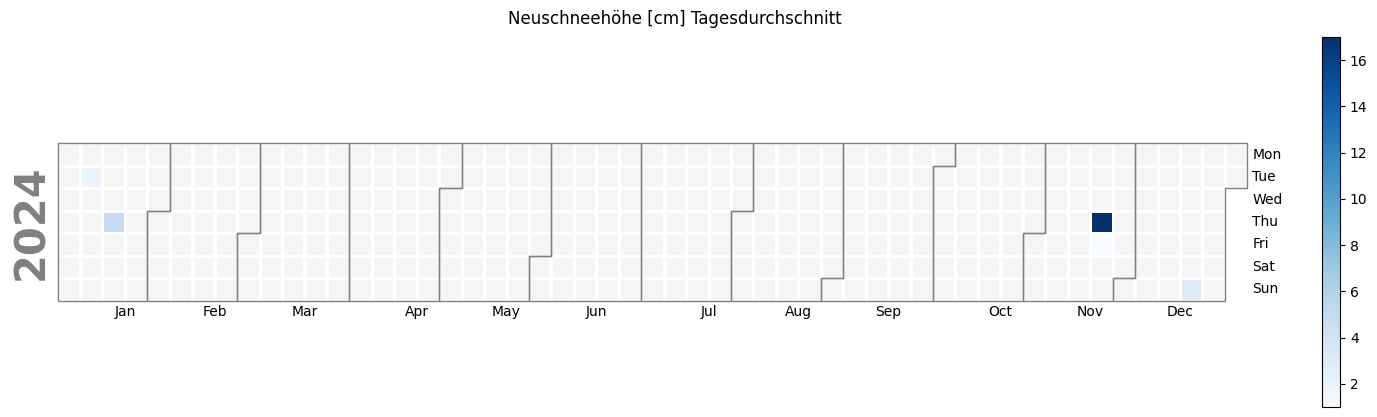

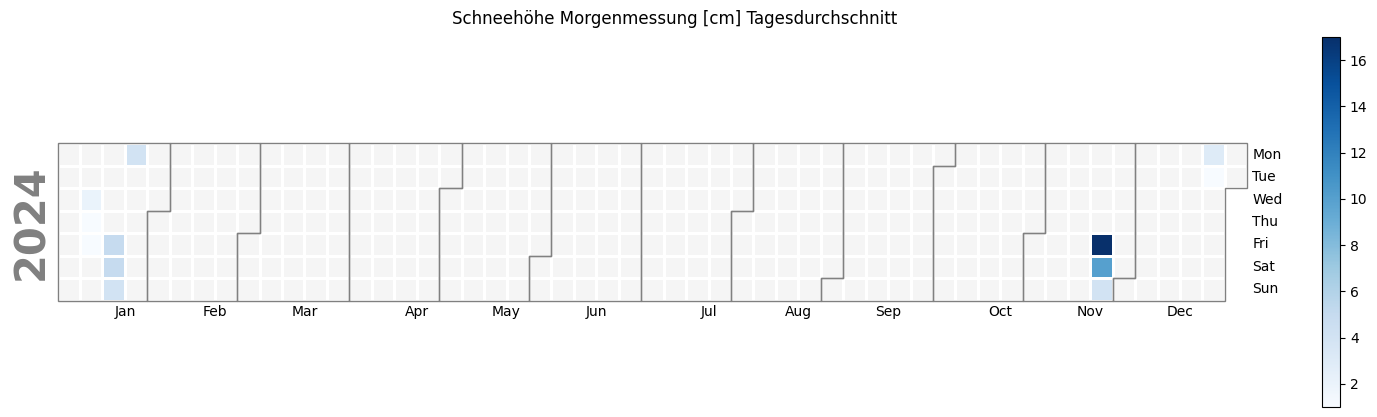

In [ ]:
# 1. Sicherstellen, dass Datum korrekt ist
df_wetter_plot["DATE"] = pd.to_datetime(df_wetter_plot["TIME"])

# 2. Liste der Spalten, die geplottet werden sollen
parameter_liste = {
    "TEMPERATUR [°C]": "Temperatur [°C] Tagesdurchschnitt",
    "NIEDERSCHLAG [mm]": "Täglicher Niederschlag [mm] Tagesdurchschnitt",
    "BOEENSPITZE [kmh]": "Böenspitze [km/h] Tagesdurchschnitt",
    "WINDGESCHWINDIGKEIT [kmh]": "Windgeschwindigkeit [km/h] Tagesdurchschnitt",
    "GLOBALSTRAHLUNG [Wm2]": "Globalstrahlung [W/m²] Tagesdurchschnitt",
    "NEUSCHNEEHOEHE [cm]": "Neuschneehöhe [cm] Tagesdurchschnitt",
    "SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]": "Schneehöhe Morgenmessung [cm] Tagesdurchschnitt"
}

# 3. Für jeden Parameter eine Kalender-Heatmap mit Tagesdurchschnitt erzeugen
for spalte, titel in parameter_liste.items():
    # Tagesdurchschnitt berechnen (für alle Variablen gleich)
    agg = df_wetter_plot.resample("D", on="DATE")[spalte].mean()

    # Plot
    calplot.calplot(
        agg,
        cmap="YlOrRd" if "TEMPERATUR" in spalte else "Blues",
        figsize=(16, 4),
        yearlabel_kws={'fontname':'sans-serif'},
        suptitle=f"{titel}",
        colorbar=True
    )

In [ ]:
# 1. Statistische übersicht der Werte
df_wetter.describe()

,TIME,BOEENSPITZE [kmh],GLOBALSTRAHLUNG [Wm2],TEMPERATUR [°C],NIEDERSCHLAG [mm],WINDGESCHWINDIGKEIT [kmh],NEUSCHNEEHOEHE [cm],SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm],TAG_MIT_HAGEL,TAG_MIT_NEBEL
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,2024-07-01 23:30:00,18.137074,128.763568,12.683003,0.134882,7.836387,0.076503,0.155738,0.002732,0.117486
min,2024-01-01 00:00:00,3.600000,-7.000000,-5.100000,0.000000,1.400000,0.000000,0.000000,0.000000,0.000000
25%,2024-04-01 11:45:00,11.200000,-1.000000,7.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,2024-07-01 23:30:00,15.800000,4.000000,12.000000,0.000000,7.200000,0.000000,0.000000,0.000000,0.000000
75%,2024-10-01 11:15:00,22.300000,168.000000,18.400000,0.000000,9.700000,0.000000,0.000000,0.000000,0.000000
max,2024-12-31 23:00:00,83.900000,1039.000000,34.600000,11.700000,31.000000,17.000000,17.000000,1.000000,1.000000
std,NaN,10.000674,216.765757,7.739708,0.549063,3.948387,0.943623,1.161988,0.052202,0.322017


## 3.3 Zusammenführen der Verkehrsdaten und Wetterdaten

In einem nächsten Schritt werden die Verkehrsdaten mit den Wetterdaten zusammengeführt. Aufgrund der unterschiedlichen Granularität der Datensätze (Verkehr = minütlich, Wetter = stündlich) werden die minütlichen Abfahrtszeiten auf stündliche Intervalle aggregiert, indem sie auf die volle Stunde **abgerundet** werden. Zum Beispiel wird die Abfahrtszeit *12:31 Uhr* auf *12:00 Uhr* aggregiert. Dafür wird eine neue Spalte `ABFAHRTSZEIT_aggregiert` erstellt, welche die gerundeten Timestamps enthält.


Daraufhin erfolgt die **Zusammenführung (Merge)** der beiden Datensätze mittels eines Left Joins. Dabei wird `ABFAHRTSZEIT_aggregiert` aus den Verkehrsdaten mit `time` aus den Wetterdaten verknüpft. So werden den Verkehrsdaten die jeweils passenden Wetterinformationen der entsprechenden Stunde hinzugefügt. Durch den `how="left"` Join bleiben alle Verkehrseinträge erhalten – auch wenn für einzelne Zeitpunkte keine Wetterdaten vorliegen (diese erscheinen dann als `NaN` in den entsprechenden Spalten).

Die resultierende Tabelle `df_merged` enthält somit die ursprünglichen Verkehrsdaten ergänzt um relevante Wetterinformationen zur jeweiligen Abfahrtszeit.


In [ ]:
# 1. Aggregiere die Verspätungen auf stündliche Intervalle
# Neue Spalte: Stündlich abgerundeter Timestamp (z. B. 2025-02-22 12:00:00)
df_verkehr_2024_cleaned["ABFAHRTSZEIT_AGGREGIERT"] = df_verkehr_2024_cleaned["ABFAHRTSZEIT"].dt.floor("h")
display(df_verkehr_2024_cleaned.head(10))

/var/folders/y5/k4w6t8l1781fsnsg064n4dxw0000gn/T/ipykernel_34478/1011377718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_verkehr_2024_cleaned["ABFAHRTSZEIT_AGGREGIERT"] = df_verkehr_2024_cleaned["ABFAHRTSZEIT"].dt.floor("h")


,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,VERSPAETUNG [s],ABFAHRTSZEIT_AGGREGIERT
0,10,"Zürich, Salersteig",2024-01-01 04:36:00,2024-01-01 04:37:09,REAL,69.0,2024-01-01 04:00:00
1,10,"Zürich, Berninaplatz",2024-01-01 04:37:00,2024-01-01 04:38:08,REAL,68.0,2024-01-01 04:00:00
2,10,"Zürich, Hirschwiesenstrasse",2024-01-01 04:38:00,2024-01-01 04:39:12,REAL,72.0,2024-01-01 04:00:00
6,10,"Zürich, Milchbuck",2024-01-01 04:40:00,2024-01-01 04:42:18,REAL,138.0,2024-01-01 04:00:00
8,10,"Zürich, Universität Irchel",2024-01-01 04:41:00,2024-01-01 04:44:07,REAL,187.0,2024-01-01 04:00:00
10,10,"Zürich, Langmauerstrasse",2024-01-01 04:42:00,2024-01-01 04:45:15,REAL,195.0,2024-01-01 04:00:00
12,10,"Zürich, Letzistrasse",2024-01-01 04:43:00,2024-01-01 04:46:08,REAL,188.0,2024-01-01 04:00:00
15,10,"Zürich, Kinkelstrasse",2024-01-01 04:44:00,2024-01-01 04:46:51,REAL,171.0,2024-01-01 04:00:00
17,10,"Zürich, Sternen Oerlikon",2024-01-01 04:44:00,2024-01-01 04:45:45,REAL,105.0,2024-01-01 04:00:00
18,12,Glattpark,2024-01-01 04:45:00,2024-01-01 04:46:21,REAL,81.0,2024-01-01 04:00:00


In [ ]:
# 1 Merge mit den Verkehrsdaten
# Annahme: df_merged ist der DataFrame mit den Verkehrsdaten und enthält eine Spalte "ABFAHRTSZEIT_aggregiert" #TODO noch notwendig? ist keine Annahme?
df_merged = pd.merge(
    df_verkehr_2024_cleaned,            # Verkehrsdaten
    df_wetter,                          # Wetterdaten
    left_on="ABFAHRTSZEIT_AGGREGIERT",  # Zeitstempel in den Verkehrsdaten
    right_on="TIME",                    # Zeitstempel in den Wetterdaten
    how="left"                          # Behalte alle Verkehrsdaten, auch wenn keine Wetterdaten vorhanden sind
)

# 2. Überprüfen des gemergten DataFrames
display(df_merged.head(10))

# 3. Überprüfen der Länge des gemergten DataFrames
print(len(df_merged))


,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,VERSPAETUNG [s],ABFAHRTSZEIT_AGGREGIERT,WETTERSTATION,TIME,BOEENSPITZE [kmh],GLOBALSTRAHLUNG [Wm2],TEMPERATUR [°C],NIEDERSCHLAG [mm],WINDGESCHWINDIGKEIT [kmh],NEUSCHNEEHOEHE [cm],SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm],TAG_MIT_HAGEL,TAG_MIT_NEBEL
0,10,"Zürich, Salersteig",2024-01-01 04:36:00,2024-01-01 04:37:09,REAL,69.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0,0
1,10,"Zürich, Berninaplatz",2024-01-01 04:37:00,2024-01-01 04:38:08,REAL,68.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0,0
2,10,"Zürich, Hirschwiesenstrasse",2024-01-01 04:38:00,2024-01-01 04:39:12,REAL,72.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0,0
3,10,"Zürich, Milchbuck",2024-01-01 04:40:00,2024-01-01 04:42:18,REAL,138.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0,0
4,10,"Zürich, Universität Irchel",2024-01-01 04:41:00,2024-01-01 04:44:07,REAL,187.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0,0
5,10,"Zürich, Langmauerstrasse",2024-01-01 04:42:00,2024-01-01 04:45:15,REAL,195.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0,0
6,10,"Zürich, Letzistrasse",2024-01-01 04:43:00,2024-01-01 04:46:08,REAL,188.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0,0
7,10,"Zürich, Kinkelstrasse",2024-01-01 04:44:00,2024-01-01 04:46:51,REAL,171.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0,0
8,10,"Zürich, Sternen Oerlikon",2024-01-01 04:44:00,2024-01-01 04:45:45,REAL,105.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0,0
9,12,Glattpark,2024-01-01 04:45:00,2024-01-01 04:46:21,REAL,81.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0,0


12195827


## 3.4 Zusammenführung der Verkehrsdaten und Wetterdaten mit den Koordinaten der Haltestellen

Um das neue Dataframe mit den Verkehrsdaten und Wetterdaten (`df_merged`) zusätzlich mit geografischen Informationen anzureichern, wurden die Koordinaten (GPS-Längen- und Breitengrade) der einzelnen Haltestellen ergänzt. Die notwendigen Daten stammen aus den beiden offiziellen Datensätzen der Stadt Zürich:

- `haltestelle.csv` – enthält Informationen zu Haltestellennamen (`halt_id`, `halt_lang`)  
- `haltepunkt.csv` – enthält GPS-Koordinaten der einzelnen Haltepunkte (`halt_id`, `GPS_Latitude`, `GPS_Longitude`)

Beide Datensätze wurden von folgendem Open-Data-Portal bezogen:  
[https://data.stadt-zuerich.ch/dataset/vbz_fahrzeiten_ogd_2022/resource/4549bfa8-5eb5-44a2-9091-214542411fbd](https://data.stadt-zuerich.ch/dataset/vbz_fahrzeiten_ogd_2022/resource/4549bfa8-5eb5-44a2-9091-214542411fbd)

Zunächst wurden die beiden CSV-Dateien eingelesen und über die gemeinsame Spalte `halt_id` zusammengeführt. Die Spalte `GPS_Bearing`, die für die Analyse nicht benötigt wurde, wurde entfernt. Anschliessend wurden Zeilen ohne GPS-Koordinaten entfernt, um nur vollständige Datensätze zu verwenden.

Da die Haltestellennamen im Verkehrs- und Wetterdatensatz (`df_merged`) und im Haltestellenverzeichnis in leicht unterschiedlichen Formaten vorliegen können (z. B. Gross-/Kleinschreibung, zusätzliche Leerzeichen), wurden beide Namensspalten zuerst **vereinheitlicht**:  
- Umwandlung in Kleinbuchstaben  
- Entfernen von führenden und nachgestellten Leerzeichen

Anschliessend wurden die Koordinaten-Daten nach Haltestellennamen dedupliziert, sodass jeder Haltestellenname nur einmal mit einer Koordinate vorkommt.

Im letzten Schritt erfolgte der Merge mit dem bereits bestehenden Dataframe mit den Verkehrsdaten und Wetterdaten. So entstand ein finaler Datensatz `df_merged_final`, der **Verkehrs-, Wetter- und Geodaten** für jede Abfahrt enthält.


In [ ]:
# 1. Import der Haltestellen-Daten
url_haltestelle = "https://raw.githubusercontent.com/RFankhauser/MSc_WI_BINA/refs/heads/main/Semesterarbeit/Verkehrsdaten/haltestelle.csv"
df_haltestelle = pd.read_csv(url_haltestelle,
                             sep=",",
                             encoding="utf-8")

# 2. Anzeige der ersten 5 Zeilen des DataFrames
display(df_haltestelle.head())

,halt_id,halt_diva,halt_kurz,halt_lang,halt_ist_aktiv
0,143,2570,BirWSL,"Birmensdorf ZH, Sternen/WSL",True
1,309,3356,WalBir,"Waldegg, Birmensdorferstrasse",True
2,373,6232,FRAF07,"Zürich Flughafen, Fracht",True
3,539,2655,TBAH01,"Thalwil, Bahnhof",True
4,588,3027,FLUG07,"Zürich Flughafen, Bahnhof",True


In [ ]:
# 1. Import der Haltepunkt-Daten
url_haltepunkt = "https://raw.githubusercontent.com/RFankhauser/MSc_WI_BINA/refs/heads/main/Semesterarbeit/Verkehrsdaten/haltepunkt.csv"
df_haltepunkt = pd.read_csv(url_haltepunkt,
                            sep=",",
                            encoding="utf-8")

# 2. Anzeige der ersten 5 Zeilen des DataFrames
display(df_haltepunkt.head())

,halt_punkt_id,halt_punkt_diva,halt_id,GPS_Latitude,GPS_Longitude,GPS_Bearing,halt_punkt_ist_aktiv
0,303,51,143,47.360017,8.456337,85.0,False
1,304,50,143,47.360153,8.456180,270.0,False
2,686,50,309,47.368125,8.463072,212.0,False
3,687,51,309,47.368433,8.463819,19.0,False
4,823,51,373,47.452401,8.571871,208.0,False


In [ ]:
# 1. Merge der Haltestellen-Daten mit den Haltepunkt-Daten
df_merged_haltestelle = df_haltepunkt.merge(df_haltestelle, on="halt_id", how="left")

# 2. Entfernen überflüssiger Spalten
df_merged_haltestelle = df_merged_haltestelle.drop(columns=["GPS_Bearing"])

# 3. Zeilen mit fehlenden Koordinaten entfernen
df_merged_haltestelle_clean = df_merged_haltestelle.dropna(subset=["GPS_Latitude", "GPS_Longitude"])

In [ ]:
# Merge Haltestellen mit Geodaten
# Namen normalisieren
df_stations_copy = df_merged.copy()
df_merged_haltestelle_copy = df_merged_haltestelle_clean.copy()

df_stations_copy["HALTESTELLEN_NAME_CLEAN"] = df_stations_copy["HALTESTELLEN_NAME"].str.strip().str.lower()
df_merged_haltestelle_copy["halt_lang_CLEAN"] = df_merged_haltestelle_copy["halt_lang"].str.strip().str.lower()

# Duplikate in Koordinaten entfernen
df_coords = df_merged_haltestelle_copy.drop_duplicates(subset=["halt_lang_CLEAN"])[
    ["halt_lang_CLEAN", "GPS_Latitude", "GPS_Longitude"]
]

# Merge durchführen
df_merged_final = df_stations_copy.merge(
    df_coords,
    left_on="HALTESTELLEN_NAME_CLEAN",
    right_on="halt_lang_CLEAN",
    how="left"
).drop(columns=["HALTESTELLEN_NAME_CLEAN", "halt_lang_CLEAN"])

df_merged_final.rename(
    columns={
        "GPS_Latitude": "GPS_LATITUDE",
        "GPS_Longitude": "GPS_LONGITUDE",
    },
    inplace=True
)

df_merged_final.drop(columns=["ABFAHRTSZEIT_AGGREGIERT", "TIME"], inplace=True)
display(df_merged_final.head(10))


#Forchbahn Stationen entfernen
Forchbahn_haltestellen = [
    "Spital Zollikerberg", "Zollikerberg", "Neue Forch", "Waldburg",
    "Zumikon", "Maiacher, Station", "Forch, Bahnhof", "Zumikon, Waltikon", "Waldburg, Station"
]

filter_stationen = df_merged_final[~df_merged_final["HALTESTELLEN_NAME"].isin(Forchbahn_haltestellen)]

df_merged_final = filter_stationen

print(len(df_merged_final))

# ⚠️ Kann gelöscht werden sobald individuelle Datenanalysen vorbei sind.
# --- 💾 Speichern des gemergten DataFrames in eine CSV-Datei 💾-----
# speicherpfad = "/Users/remofankhauser/Desktop/df_merged_final.csv"
# df_merged_final.to_csv(speicherpfad, index=False, encoding="utf-8")

,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,VERSPAETUNG [s],WETTERSTATION,BOEENSPITZE [kmh],GLOBALSTRAHLUNG [Wm2],TEMPERATUR [°C],NIEDERSCHLAG [mm],WINDGESCHWINDIGKEIT [kmh],NEUSCHNEEHOEHE [cm],SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm],TAG_MIT_HAGEL,TAG_MIT_NEBEL,GPS_LATITUDE,GPS_LONGITUDE
0,10,"Zürich, Salersteig",2024-01-01 04:36:00,2024-01-01 04:37:09,REAL,69.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0,0,47.406052,8.548386
1,10,"Zürich, Berninaplatz",2024-01-01 04:37:00,2024-01-01 04:38:08,REAL,68.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0,0,47.403601,8.547871
2,10,"Zürich, Hirschwiesenstrasse",2024-01-01 04:38:00,2024-01-01 04:39:12,REAL,72.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0,0,47.400376,8.543683
3,10,"Zürich, Milchbuck",2024-01-01 04:40:00,2024-01-01 04:42:18,REAL,138.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0,0,47.398125,8.542047
4,10,"Zürich, Universität Irchel",2024-01-01 04:41:00,2024-01-01 04:44:07,REAL,187.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0,0,47.396090,8.545105
5,10,"Zürich, Langmauerstrasse",2024-01-01 04:42:00,2024-01-01 04:45:15,REAL,195.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0,0,47.393788,8.544964
6,10,"Zürich, Letzistrasse",2024-01-01 04:43:00,2024-01-01 04:46:08,REAL,188.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0,0,47.390906,8.545434
7,10,"Zürich, Kinkelstrasse",2024-01-01 04:44:00,2024-01-01 04:46:51,REAL,171.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0,0,47.388801,8.546384
8,10,"Zürich, Sternen Oerlikon",2024-01-01 04:44:00,2024-01-01 04:45:45,REAL,105.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0,0,47.410213,8.545994
9,12,Glattpark,2024-01-01 04:45:00,2024-01-01 04:46:21,REAL,81.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0,0,47.421259,8.557105


12195827


In [ ]:
df_merged_final[df_merged_final["GPS_LATITUDE"].isna()]["HALTESTELLEN_NAME"].unique() #TODO Koordinaten finden oder entfernen

array(['Zürich, Brunnenhof', 'Zürich, Ueberlandpark',
       'Zürich, Renggerstrasse'], dtype=object)

## 3.5 Visualisierung des Untersuchungsgebiet

In [ ]:
df_map = df_merged_final[["GPS_LATITUDE", "GPS_LONGITUDE", "HALTESTELLEN_NAME", "VERSPAETUNG [s]"]].copy()

df_map = df_map.groupby("HALTESTELLEN_NAME").agg(
    VERSCHSPAETUNGEN_COUNT=("VERSPAETUNG [s]", "count"),
    AVG_VERSPAETUNG=("VERSPAETUNG [s]", "mean"),
    GPS_Latitude=("GPS_LATITUDE", "first"),
    GPS_Longitude=("GPS_LONGITUDE", "first")
).reset_index()

df_map["VERSCHSPAETUNGEN_COUNT"] = df_map["VERSCHSPAETUNGEN_COUNT"].astype(int)
df_map["AVG_VERSPAETUNG"] = df_map["AVG_VERSPAETUNG"].astype(float)

# --- Konfiguration laden -------------------------
with open("kepler_config.json", "r") as f:
    saved_config = json.load(f)
# -------------------------------------------------


map_ = KeplerGl(height=1200, config=saved_config)
map_.add_data(data=df_map, name="Verspätungen pro Haltestelle")
map_


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


/Users/remofankhauser/Github/MSC_WI_BINA/.venv/lib/python3.12/site-packages/jupyter_client/session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant: nan
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'vufhbxq', 'type': …

In [ ]:
# --- Konfiguration speichern -------

# import json

# print(map_.config)
# # Konfiguration speichern
# with open("kepler_config.json", "w") as f:
#     json.dump(map_.config, f)

---
# 4 Datenanalyse

In diesem Kapitel werden die aufbereiteten Verkehrs- und Wetterdaten analysiert, um mögliche Zusammenhänge zwischen Wetterbedingungen und Verspätungen im öffentlichen Verkehr der Stadt Zürich zu untersuchen. Ziel ist es, erste Muster, Korrelationen oder potenzielle Einflussfaktoren zu identifizieren, die in späteren Analyseschritten weiter vertieft werden können.

## 4.1 Analyse von Salome

Ziel dieses Abschnitts ist es, den Zusammenhang zwischen den Verspätungen und verschiedenen Wetterdaten zu analysieren, um zu verstehen, wie Wetterbedingungen die Entstehung und Häufigkeit von Verspätungen beeinflussen können. Besondere Aufmerksamkeit gilt dabei der Identifizierung möglicher Korrelationen, die darauf hindeuten könnten, dass bestimmte Wetterereignisse Verspätungen verursachen oder verstärken. Durch diese Untersuchung sollen fundierte Erkenntnisse gewonnen werden, die möglicherweise zur Verbesserung der Planung und Vorhersage von Verspätungen beitragen können.

**Zur Visualisierung und Bewertung dieser Zusammenhänge wurde eine Korrelations-Heatmap erstellt.** Diese grafische Darstellung basiert auf dem sogenannten **Pearson-Korrelationskoeffizienten (r-Wert)**, der den linearen Zusammenhang zwischen zwei numerischen Variablen misst. Die Werte des r-Koeffizienten reichen von **-1** (perfekter negativer Zusammenhang) über **0** (kein Zusammenhang) bis **+1** (perfekter positiver Zusammenhang). In der Heatmap sind diese Werte sowohl durch Farbverläufe – von Blau (negativ) über Weiss (neutral) bis Rot (positiv) – als auch durch numerische Angaben visualisiert.

Der Vorteil einer Heatmap liegt darin, dass sie auf einen Blick zeigt, welche Variablen untereinander wie stark korrelieren. In diesem Fall ermöglicht sie es, potenzielle Einflüsse von Wetterfaktoren wie Temperatur, Niederschlag oder Wind auf die Zugverspätung schnell zu erkennen. Gleichzeitig lässt sich beurteilen, ob es Zusammenhänge zwischen den Wetterparametern selbst gibt, die ebenfalls Einfluss auf das Verkehrsgeschehen haben könnten. Die Heatmap dient somit als kompaktes und übersichtliches Werkzeug zur Identifikation relevanter Zusammenhänge, die in weiterführenden Analysen vertieft betrachtet werden können.

Als zusätzliche Unterstützung für die Einordnung unserer Analysewerte haben wir sogenannte Schwellenwerte definiert. Sie helfen dabei, Wetterfaktoren systematisch zu bewerten und potenzielle Auswirkungen besser einzuschätzen.

Die hier verwendeten Schwellenwerte basieren auf anerkannten Definitionen, unter anderem von MeteoSchweiz, BAFU und ASTRA. Sie dienen als Orientierung für die Bewertung der Analyse.

from IPython.display import HTML

html = """
<h2>Schwellenwerte für Wetterfaktoren – Orientierung an MeteoSchweiz und Verkehrsanalysen</h2>

<p>Diese Schwellenwerte basieren auf Definitionen und Praxiserfahrungen aus der Schweiz (z. B. MeteoSchweiz, BAFU, ASTRA).</p>

<hr>

<table style="width:100%; border-collapse:collapse; font-family:sans-serif; font-size:14px;">
  <tr>
    <th style="text-align:left; width:50%; border-bottom:1px solid #ccc;">Temperatur [°C]</th>
    <th style="text-align:left; border-bottom:1px solid #ccc;">Empfehlung</th>
  </tr>
  <tr>
    <td>
      <table style="width:100%; border-collapse:collapse;">
        <tr><td>&lt; 0</td><td>Gefrierpunkt – mögliche Glätte, Schneefall</td></tr>
        <tr><td>0 – 25</td><td>Normale Temperaturbereiche</td></tr>
        <tr><td>&gt; 25</td><td>Hitzetag (CH)</td></tr>
        <tr><td>&gt; 30</td><td>Sehr heiß – evtl. technische Einflüsse</td></tr>
      </table>
    </td>
    <td>
      Temperatur „hoch“: &gt; 25 °C<br>
      Temperatur „kritisch kalt“: &lt; 0 °C
    </td>
  </tr>

  <tr><td colspan="2"><hr></td></tr>

  <tr>
    <th style="text-align:left; border-bottom:1px solid #ccc;">Windgeschwindigkeit [km/h]</th>
    <th style="text-align:left; border-bottom:1px solid #ccc;">Empfehlung</th>
  </tr>
  <tr>
    <td>
      <table style="width:100%; border-collapse:collapse;">
        <tr><td>&lt; 10</td><td>Schwachwind</td></tr>
        <tr><td>10 – 20</td><td>Mäßiger Wind</td></tr>
        <tr><td>20 – 40</td><td>Frischer Wind – Einschränkungen möglich</td></tr>
        <tr><td>&gt; 40</td><td>Starker Wind – Einfluss auf ÖV denkbar</td></tr>
        <tr><td>&gt; 60</td><td>Stürmisch – sicherheitsrelevant</td></tr>
      </table>
    </td>
    <td>
      Wind „hoch“: &gt; 40 km/h
    </td>
  </tr>

  <tr><td colspan="2"><hr></td></tr>

  <tr>
    <th style="text-align:left; border-bottom:1px solid #ccc;">Böenspitze [km/h]</th>
    <th style="text-align:left; border-bottom:1px solid #ccc;">Empfehlung</th>
  </tr>
  <tr>
    <td>
      <table style="width:100%; border-collapse:collapse;">
        <tr><td>&gt; 40</td><td>Deutlich spürbar</td></tr>
        <tr><td>&gt; 60</td><td>Sturmböen – Fahrplanrelevanz</td></tr>
        <tr><td>&gt; 75</td><td>Verkehrsbehinderungen möglich</td></tr>
        <tr><td>&gt; 100</td><td>Schäden / Unterbrüche</td></tr>
      </table>
    </td>
    <td>
      Böenspitze „hoch“: &gt; 60 km/h<br>
      Böenspitze „kritisch“: &gt; 75 km/h
    </td>
  </tr>

  <tr><td colspan="2"><hr></td></tr>

  <tr>
    <th style="text-align:left; border-bottom:1px solid #ccc;">Neuschneehöhe [cm]</th>
    <th style="text-align:left; border-bottom:1px solid #ccc;">Empfehlung</th>
  </tr>
  <tr>
    <td>
      <table style="width:100%; border-collapse:collapse;">
        <tr><td>0 – 1</td><td>Leicht, meist unkritisch</td></tr>
        <tr><td>2 – 5</td><td>Einfluss auf Verkehr denkbar</td></tr>
        <tr><td>&gt; 5</td><td>Verkehrseinfluss wahrscheinlich</td></tr>
        <tr><td>&gt; 10</td><td>Operativ relevant (Winterdienste)</td></tr>
      </table>
    </td>
    <td>
      Neuschnee „hoch“: &gt; 5 cm<br>
      Neuschnee „kritisch“: &gt; 10 cm
    </td>
  </tr>
</table>
"""

display(HTML(html))

In [ ]:
# Import für Google Colab

# import gdown
# file_id = "1nzKawzmobJgL1FYoRczZVbzWjzHzYWQU"
# destination = 'meine_datei.csv'
# gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)
# df_analyse = pd.read_csv('meine_datei.csv')



# Kopie des orginal Datensatz erstellen
df_analyse = df_merged_final.copy()

In [ ]:
# 1. Relevante Spalten definieren
relevante_spalten = [
    'VERSPAETUNG [s]',
    'BOEENSPITZE [kmh]',
    'GLOBALSTRAHLUNG [Wm2]',
    'TEMPERATUR [°C]',
    'NIEDERSCHLAG [mm]',
    'WINDGESCHWINDIGKEIT [kmh]',
    'SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]',
    'TAG_MIT_HAGEL',
    'TAG_MIT_NEBEL'
]

# 2. Fehlerarten zählen
fehler_report = {}

for spalte in relevante_spalten:
    fehler_report[spalte] = {
        'Fehlende Werte (NaN)': df_analyse[spalte].isna().sum(),
        'Ungültige Typen (Nicht numerisch)': df_analyse[spalte].apply(lambda x: isinstance(x, (int, float))).value_counts().get(False, 0),
        'Negative Werte (wenn nicht erlaubt)': df_analyse[spalte][df_analyse[spalte] < 0].count() if spalte not in ['GLOBALSTRAHLUNG [Wm2]', 'TAG_MIT_HAGEL', 'TAG_MIT_NEBEL'] else 'nicht geprüft'
    }

# 3. Ergebnis anzeigen
pd.DataFrame(fehler_report).T

,Fehlende Werte (NaN),Ungültige Typen (Nicht numerisch),Negative Werte (wenn nicht erlaubt)
VERSPAETUNG [s],0,0,0
BOEENSPITZE [kmh],0,0,0
GLOBALSTRAHLUNG [Wm2],0,0,nicht geprüft
TEMPERATUR [°C],0,0,430981
NIEDERSCHLAG [mm],0,0,0
WINDGESCHWINDIGKEIT [kmh],0,0,0
SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm],0,0,0
TAG_MIT_HAGEL,0,0,nicht geprüft
TAG_MIT_NEBEL,0,0,nicht geprüft


In [ ]:
# 1. Zeilen mit fehlender Temperatur anzeigen
fehlende_temp = df_analyse[df_analyse['TEMPERATUR [°C]'].isna()]

# 2. Vorschau der fehlenden Werte
print(f"Anzahl fehlender Temperaturwerte: {fehlende_temp.shape[0]}")
fehlende_temp.head()

Anzahl fehlender Temperaturwerte: 0


,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,VERSPAETUNG [s],WETTERSTATION,BOEENSPITZE [kmh],GLOBALSTRAHLUNG [Wm2],TEMPERATUR [°C],NIEDERSCHLAG [mm],WINDGESCHWINDIGKEIT [kmh],NEUSCHNEEHOEHE [cm],SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm],TAG_MIT_HAGEL,TAG_MIT_NEBEL,GPS_LATITUDE,GPS_LONGITUDE


In [ ]:
# 1. Spaltenliste definieren
wetter_spalten = [
    'BOEENSPITZE [kmh]',
    'GLOBALSTRAHLUNG [Wm2]',
    'TEMPERATUR [°C]',
    'NIEDERSCHLAG [mm]',
    'WINDGESCHWINDIGKEIT [kmh]',
    'NEUSCHNEEHOEHE [cm]',
    'SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]',
    'TAG_MIT_HAGEL',
    'TAG_MIT_NEBEL'
]

# 2. Zeilen entfernen, bei denen alle Wetterspalten NaN sind
df_analyse = df_analyse.dropna(subset=wetter_spalten, how='all')

In [ ]:
# 1. Datensatz auf fehlende Werte noch einmal überprüfen
nan_übersicht = df_analyse.isna().sum()

# 2. Nur Spalten mit mindestens einem NaN anzeigen
nan_übersicht[nan_übersicht > 0]

GPS_LATITUDE     173445
GPS_LONGITUDE    173445
dtype: int64

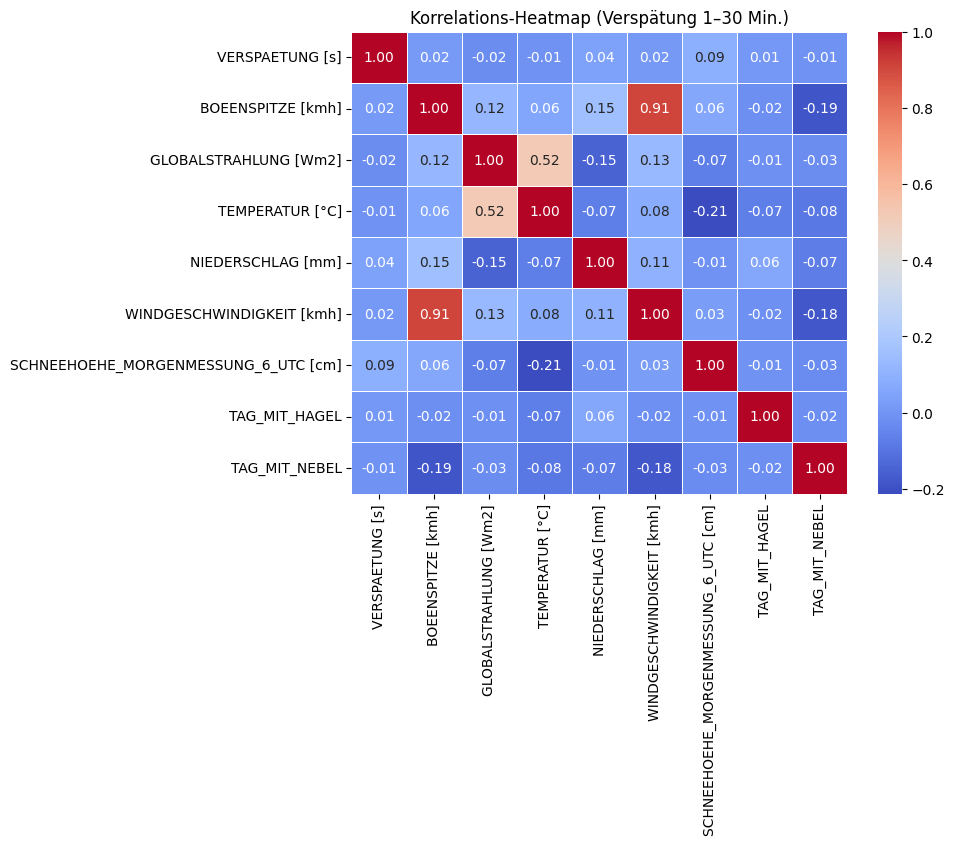

In [ ]:
# 1. Relevante Spalten definieren
relevante_spalten = [
    'VERSPAETUNG [s]',
    'BOEENSPITZE [kmh]',
    'GLOBALSTRAHLUNG [Wm2]',
    'TEMPERATUR [°C]',
    'NIEDERSCHLAG [mm]',
    'WINDGESCHWINDIGKEIT [kmh]',
    'SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]',
    'TAG_MIT_HAGEL',
    'TAG_MIT_NEBEL'
]

# 2. Korrelation zwischen den relevanten Spalten berechnen
korrelation = df_analyse[relevante_spalten].corr()

# 3. Heatmap (r-Werte) ausgeben
plt.figure(figsize=(8, 6))
sns.heatmap(korrelation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korrelations-Heatmap (Verspätung 1–30 Min.)')
plt.show()

### Erkenntnisse aus der Analyse

Die Ergebnisse zeigen, dass keiner der untersuchten Wetterparameter einen nennenswerten linearen Zusammenhang mit der Verspätung aufweist. Die höchsten Korrelationskoeffizienten zur Verspätung liegen bei:

* Niederschlag (r = 0.04)

* Böenspitze (r = 0.02)

* Windgeschwindigkeit (r = 0.02)

Diese Werte sind jedoch so gering, dass sie statistisch keine relevante Aussagekraft besitzen. Damit lässt sich schliessen, dass weder Wind, Temperatur, Sonneneinstrahlung noch Niederschlag einen direkten linearen Einfluss auf die Verspätungshöhe ausüben.

Auffällig ist hingegen die sehr starke Korrelation zwischen Böenspitze und Windgeschwindigkeit (r = 0.91) sowie die mittlere Korrelation zwischen Temperatur und Globalstrahlung (r = 0.52), was physikalisch zu erwarten ist. Diese Zusammenhänge bestätigen die Konsistenz der Wetterdaten, liefern jedoch keine direkten Hinweise auf wetterbedingte Verspätungen.

Da die linearen Korrelationen keine signifikanten Beziehungen zeigen, könnten nicht-lineare Effekte oder Kombinationen mehrerer Wetterfaktoren eine Rolle spielen. Auch externe Einflussgrößen wie Tageszeit, Verkehrsdichte oder betriebliche Abläufe sollten in weiteren Analysen berücksichtigt werden.

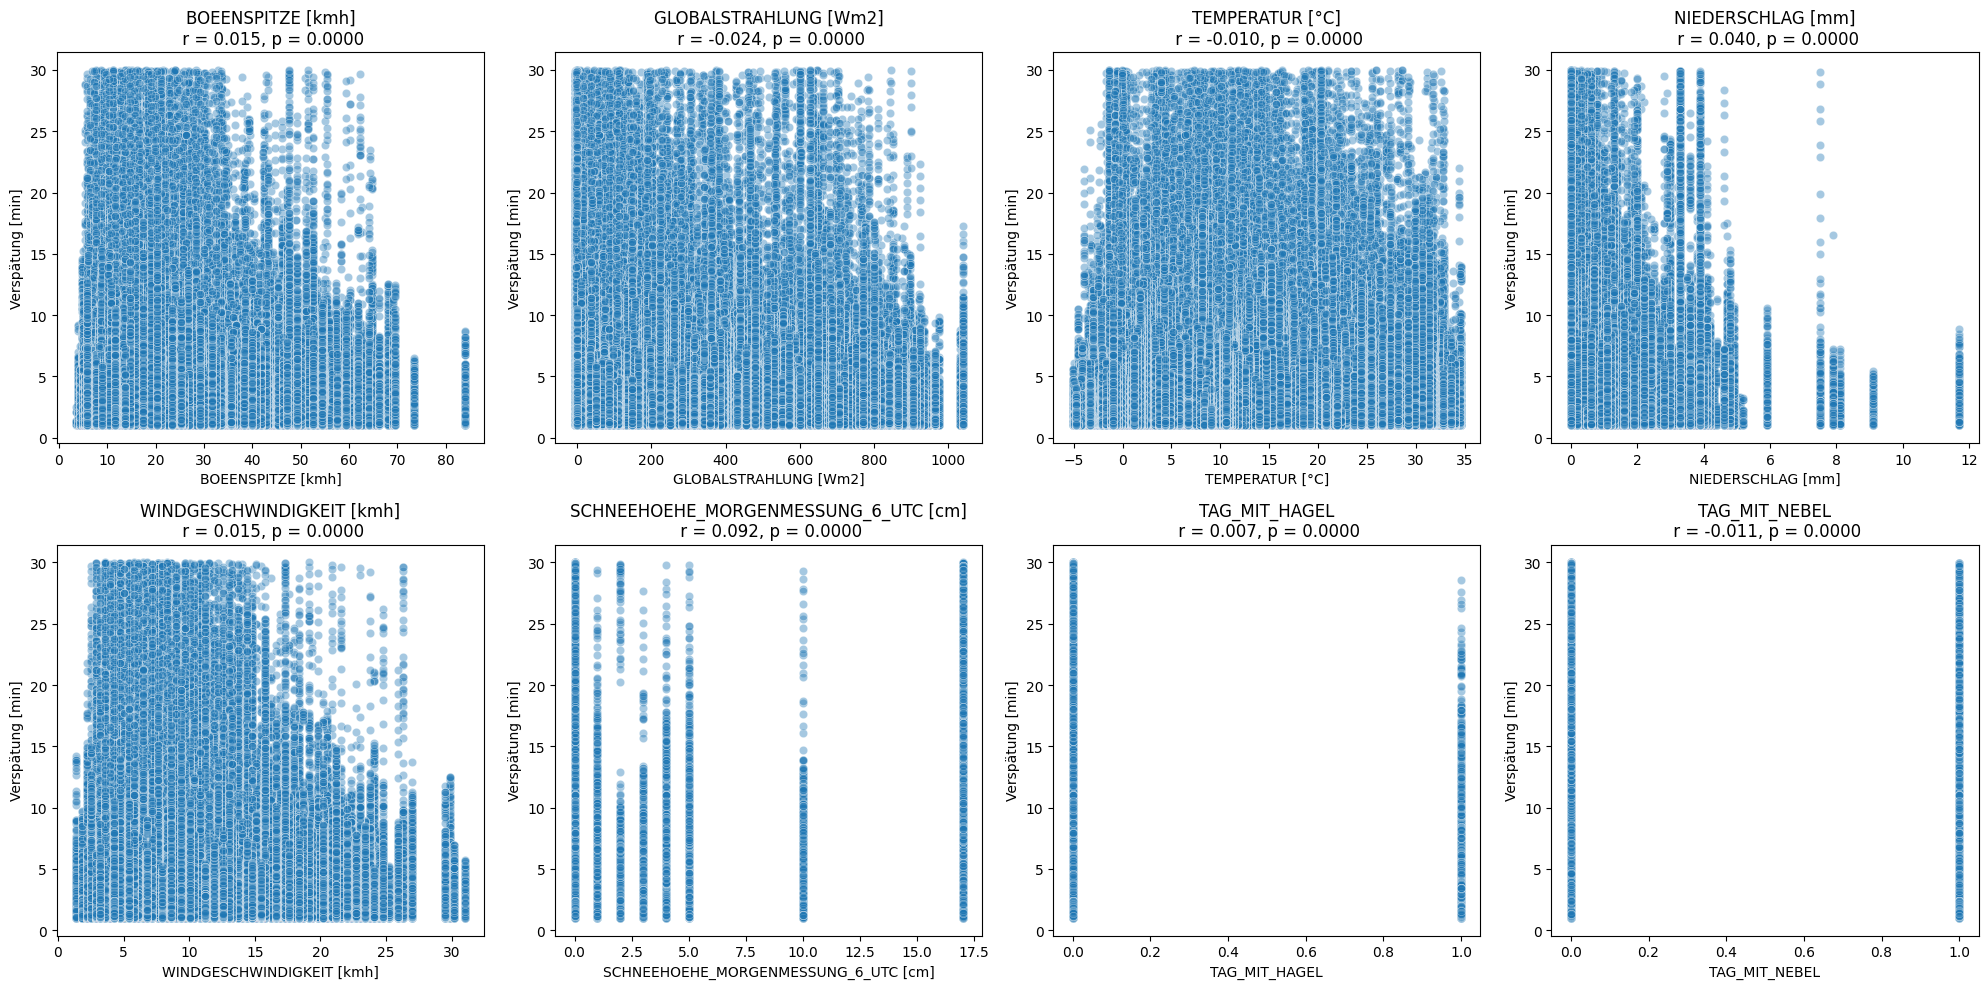

In [ ]:
# 1. Neue Spalte mit Verspätung in Minuten
df_analyse['VERSPAETUNG [min]'] = df_analyse['VERSPAETUNG [s]'] / 60

# 2. Liste aller Wettervariablen definieren
wettervariablen = [
    'BOEENSPITZE [kmh]',
    'GLOBALSTRAHLUNG [Wm2]',
    'TEMPERATUR [°C]',
    'NIEDERSCHLAG [mm]',
    'WINDGESCHWINDIGKEIT [kmh]',
    'SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]',
    'TAG_MIT_HAGEL',
    'TAG_MIT_NEBEL'
]

# 3. Subplot-Layout vorbereiten (2 Zeilen, 4 Spalten)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# 4. Schleife durch Variablen definieren
for idx, variable in enumerate(wettervariablen):
    row = idx // 4
    col = idx % 4
    ax = axes[row, col]

    # 5. Daten bereinigen
    df_valid = df_analyse[['VERSPAETUNG [min]', variable]].dropna() #⚠️ nötig? Zuerst Analysieren ob überhaupt NA Weete vorhanden

    if df_valid.empty:
        ax.set_visible(False)
        continue

    # 6. Korrelation berechnen
    r, p = pearsonr(df_valid[variable], df_valid['VERSPAETUNG [min]'])

    # 7. Scatterplot erstellen
    sns.scatterplot(
        x=variable,
        y='VERSPAETUNG [min]',
        data=df_valid,
        alpha=0.4,
        ax=ax
    )
    ax.set_title(f'{variable}\n r = {r:.3f}, p = {p:.4f}') # ⚠️ evtl. vereinfachen für lesbarkeit
    ax.set_xlabel(variable)  # X-Achsen Beschriftung
    ax.set_ylabel('Verspätung [min]')  # Y-Achsen Beschriftung

# 8. Layout-Anpassung
plt.tight_layout()
plt.show()

### Erkenntnisse aus der Analyse

Zur Untersuchung eines möglichen Zusammenhangs zwischen Wetterbedingungen und den Verspätungen von Trams wurde eine Korrelationsanalyse durchgeführt. Ziel war es herauszufinden, ob bestimmte meteorologische Faktoren wie Temperatur, Niederschlag oder Windgeschwindigkeit die Pünktlichkeit des öffentlichen Verkehrs beeinflussen. Dabei wurden Wetterdaten eines gesamten Jahres mit den gemessenen Verspätungswerten in Minuten zusammengeführt und analysiert.

Die berechneten Korrelationskoeffizienten (Pearson's r) zeigen, dass zwischen den meisten Wettervariablen und den Verspätungen nur sehr schwache oder gar keine linearen Zusammenhänge bestehen. So liegt der Korrelationswert für die Böenspitze bei lediglich 0,015, für die Globalstrahlung bei –0,024 und für die Temperatur bei –0,010. Diese Werte deuten auf praktisch keine lineare Beziehung hin. Auch andere Variablen wie Windgeschwindigkeit, Hagel oder Nebel weisen r-Werte nahe null auf. Zwar wurden für alle Variablen statistisch signifikante p-Werte berechnet (p = 0.0000), was jedoch bei grossen Datenmengen durchaus üblich ist und in diesem Fall nicht mit inhaltlicher Relevanz gleichzusetzen ist.

Etwas auffälliger sind lediglich zwei Wetterfaktoren: Zum einen zeigt die Schneehöhe der morgendlichen Messung um 6 Uhr UTC eine leicht positive Korrelation mit der Verspätung (r = 0,092). Zum anderen ergibt sich für den Niederschlag ein geringer, aber dennoch erkennbarer positiver Zusammenhang (r = 0,040). Dies legt nahe, dass grössere Schneemengen oder starker Regen tendenziell mit leicht erhöhten Verspätungen einhergehen könnten. Dennoch sind auch diese Zusammenhänge als sehr schwach einzustufen.

Insgesamt lässt sich aus den Daten kein deutlicher oder belastbarer Zusammenhang zwischen den untersuchten Wetterparametern und den Tramverspätungen ableiten. Auch die Visualisierung der Daten durch Scatterplots zeigt keine erkennbaren linearen Muster oder Trends. Die Verspätungswerte verteilen sich nahezu gleichmässig über alle Wetterausprägungen hinweg, was darauf hinweist, dass andere Faktoren wie infrastrukturelle Probleme, betriebliche Abläufe oder externe Störungen (z. B. Verkehrsunfälle) wahrscheinlich eine grössere Rolle für die Pünktlichkeit spielen.

Abschliessend lässt sich festhalten, dass Wetterbedingungen – mit Ausnahme möglicherweise extremer Schnee- oder Regenereignisse – nur einen sehr geringen Einfluss auf Tramverspätungen haben. Die Daten sprechen vielmehr dafür, dass der Betrieb weitgehend wetterunabhängig funktioniert, was für die Zuverlässigkeit des öffentlichen Nahverkehrs spricht.

## 4.2 Theresa


### Vorbereiten für die Analyse

Um die Auswirkungen verschiedener Wetterfaktoren auf die Verspätungen zu untersuchen, wurden die durchschnittlichen Verspätungswerte unter bestimmten Bedingungen miteinander verglichen. Dabei lag das Augenmerk auf einzelnen Wetterphänomenen wie Niederschlag, Schnee, Wind, Temperatur, Hagel und Nebel.

Als Grundlage für den Vergleich wurde zunächst definiert, was als „günstiges Wetter“ gilt – also Wetterlagen, bei denen keine oder nur sehr geringe witterungsbedingte Verspätungen zu erwarten sind. Die Bedingungen dafür waren: kein Niederschlag, Windgeschwindigkeit unter 20 km/h, keine Neuschneemenge, keine vorhandene Schneedecke, kein Hagel, kein Nebel und eine Temperatur über 10 °C.

Bevor die weiteren Analysen durchgeführt wurden, wurde geprüft, wie viele Datensätze jeweils unter diesen Voraussetzungen vorhanden sind. Auf diese Weise konnte sichergestellt werden, dass die gewählten Kriterien ausreichend Daten liefern und gegebenenfalls angepasst werden müssen, falls die Fallzahl zu gering ist.

Zum Abschluss der jeweiligen Analysen wurde ein T-Test durchgeführt. Dieser diente dazu, zu überprüfen, ob die beobachteten Unterschiede in den durchschnittlichen Verspätungen zwischen den Wettergruppen und den günstigen Bedingungen statistisch signifikant sind oder ob sie auch zufällig entstanden sein könnten. Der T-Test ergänzt die deskriptive Auswertung um eine einfache inferenzstatistische Einschätzung.


,Anzahl,Durchschnitt,Median,Std-Abw.,Min,Max
Günstiges Wetter,5766614.00,125.91,101.00,81.31,61.00,1800.00


,Anzahl,Durchschnitt,Median,Std-Abw.,Min,Max
Gesamter Datensatz,12195827.00,127.77,102.00,89.01,61.00,1800.00


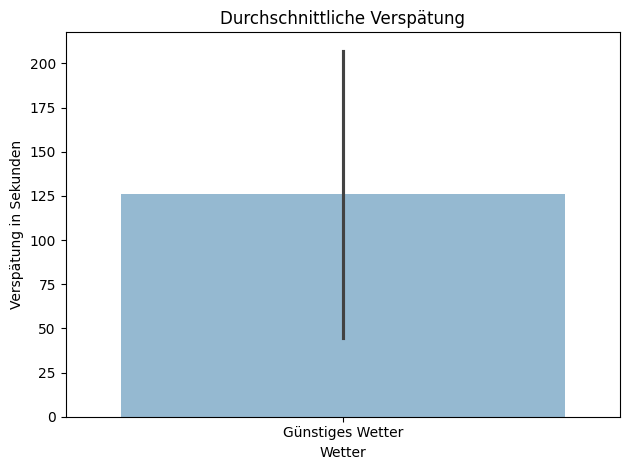

In [ ]:
# 1. Dateaframe kopieren
df = df_merged_final.copy()

# 2. Günstige Wetterbedingungen definieren und filtern
def filter_guenstiges_wetter(df):
    return df[
        (df['NIEDERSCHLAG [mm]'] == 0) &
        (df['WINDGESCHWINDIGKEIT [kmh]'] < 20) &
        (df['NEUSCHNEEHOEHE [cm]'] == 0) &
        (df['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'] == 0) &
        (df['TAG_MIT_HAGEL'] == 0) &
        (df['TAG_MIT_NEBEL'] == 0) &
        (df['TEMPERATUR [°C]'] > 10)
    ]

# 3. Statistik zur Verspätung berechnen
def berechne_statistik(df, name):
    return pd.DataFrame({
        'Anzahl': [df['VERSPAETUNG [s]'].count()],
        'Durchschnitt': [df['VERSPAETUNG [s]'].mean()],
        'Median': [df['VERSPAETUNG [s]'].median()],
        'Std-Abw.': [df['VERSPAETUNG [s]'].std()],
        'Min': [df['VERSPAETUNG [s]'].min()],
        'Max': [df['VERSPAETUNG [s]'].max()]
    }, index=[name])

# 4. alkendiagramm anzeigen
def zeige_plot(df, name):
    sns.set_palette("Blues_d")  # Dunklere Blaupalette
    sns.barplot(
        data=df.assign(Wetter=name),
        x='Wetter',
        y='VERSPAETUNG [s]',
        errorbar='sd'
    )
    plt.title("Durchschnittliche Verspätung")
    plt.ylabel("Verspätung in Sekunden")
    plt.tight_layout()
    plt.show()

# 5. Analyse durchuführen
try:
    df_guenstig = filter_guenstiges_wetter(df)

    stat_guenstig = berechne_statistik(df_guenstig, "Günstiges Wetter")
    display(stat_guenstig.style.set_caption("Statistik bei günstigem Wetter")
            .format("{:.2f}")
            .background_gradient(cmap="PuBu"))

    stat_gesamt = berechne_statistik(df, "Gesamter Datensatz")
    display(stat_gesamt.style.set_caption("Statistik im gesamten Datensatz")
            .format("{:.2f}")
            .background_gradient(cmap="PuBu"))

    # 6. Plot anzeigen
    zeige_plot(df_guenstig, "Günstiges Wetter")

except Exception as e:
    print("Fehler aufgetreten:", e)


### Interpretation der Basiswerte
- Die durchschnittliche Verspätung bei allen Wetterlagen beträgt 127,84 s und liegt damit leicht über dem Wert bei günstigem Wetter (125,91 s).  
- Die Standardabweichung ist unter ungünstigen Bedingungen höher (89,20 s vs. 81,31 s), was auf eine grössere Streuung hinweist.  
- Median sowie minimale und maximale Verspätungen unterscheiden sich kaum zwischen den Gruppen.  
- Insgesamt treten unter günstigen Wetterbedingungen leicht geringere und stabilere Verspätungen auf.


,Anzahl,Durchschnitt,Median,Std-Abw.,Min,Max
Ohne Regen,5766614.00,125.91,101.00,81.31,61.00,1800.00
Mit Regen,919522.00,132.85,105.00,90.14,61.00,1795.00


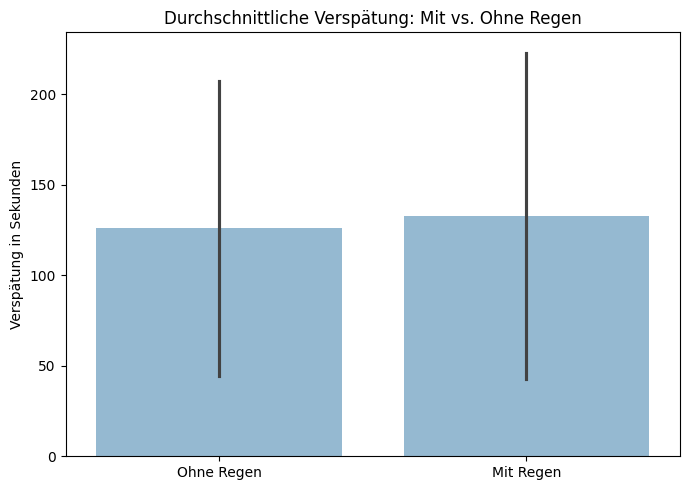

,Koeffizient,StdFehler,t,p-Wert,0.025,0.975
const,126.867,0.026,4825.461,0.000,126.815,126.918
NIEDERSCHLAG [mm],6.314,0.046,138.389,0.000,6.224,6.403
T-Test,69.527,–,–,0.000,–,–


In [ ]:
# 1. Regenbedingungen
def filter_regen(df):
    return df[
        (df['NIEDERSCHLAG [mm]'] > 0) &
        (df['WINDGESCHWINDIGKEIT [kmh]'] < 20) &
        (df['NEUSCHNEEHOEHE [cm]'] == 0) &
        (df['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'] == 0) &
        (df['TAG_MIT_HAGEL'] == 0) &
        (df['TAG_MIT_NEBEL'] == 0) &
        (df['TEMPERATUR [°C]'] > 10)
    ].copy()

# 2. Daten vorbereiten
df_guenstig = filter_guenstiges_wetter(df)
df_regen = filter_regen(df)

# 3. Statistikvergleich anzeigen
stat_vergleich = pd.concat([
    berechne_statistik(df_guenstig, "Ohne Regen"),
    berechne_statistik(df_regen, "Mit Regen")
])
display(stat_vergleich.style
        .set_caption("Statistikvergleich: Mit vs. Ohne Regen")
        .format("{:.2f}")
        .set_properties(**{'background-color': 'white', 'color': 'black'}))

# 4. Barplot
plot_df = pd.concat([
    df_guenstig.assign(Wetterlage="Ohne Regen"),
    df_regen.assign(Wetterlage="Mit Regen")
])
sns.set_palette("Blues_d")
plt.figure(figsize=(7, 5))
sns.barplot(data=plot_df, x='Wetterlage', y='VERSPAETUNG [s]', errorbar='sd')
plt.title("Durchschnittliche Verspätung: Mit vs. Ohne Regen")
plt.ylabel("Verspätung in Sekunden")
plt.xlabel("")
plt.tight_layout()
plt.show()

#5. T-Test durchführen
t_stat, p_val = ttest_ind(df_regen['VERSPAETUNG [s]'], df_guenstig['VERSPAETUNG [s]'], equal_var=False)

#6. Regression: nur Niederschlag
reg_df = df[['VERSPAETUNG [s]', 'NIEDERSCHLAG [mm]']].dropna()
X = sm.add_constant(reg_df[['NIEDERSCHLAG [mm]']])
y = reg_df['VERSPAETUNG [s]']
modell = sm.OLS(y, X).fit()

#7. Regressionswerte + T-Test als Tabelle
reg = modell.summary2().tables[1].copy()
reg.columns = ['Koeffizient', 'StdFehler', 't', 'p-Wert', '0.025', '0.975']
reg = reg.round(3)
reg.loc['T-Test'] = [t_stat, None, None, p_val, None, None]

# 8. Darstellung
display(reg.style
        .set_caption("T-Test und Regression: Einfluss von Niederschlag")
        .format("{:.3f}", na_rep="–")
        .set_properties(**{'background-color': 'white', 'color': 'black'}))


### Interpretation – Vergleich Regen vs. günstige Bedingungen

- Bei Regen beträgt die durchschnittliche Verspätung 133 s, bei trockenen Bedingungen 126 s.
- Die Stichprobengrössen sind ungleich verteilt: ca. 920'000 Fälle bei Regen, über 5,7 Mio. bei trockenen Bedingungen.

### Interpretation – egressionsanalyse: Einfluss von Niederschlag auf Verspätungen

- **Konstante (const)**: Die durchschnittliche Verspätung unter den betrachteten Bedingungen ohne Niederschlag beträgt 126.87 Sekunden**.
- **Niederschlag [mm]**: Jeder zusätzliche Millimeter Regen erhöht die Verspätung im Mittel um 6.31 Sekunden**.  
- **T-Test (Mit vs. Ohne Regen)**:  
  Der Vergleich zwischen Verspätungen bei Regen und trockenen Bedingungen ergibt einen T-Wert von 69.53 und einen p-Wert von 0.000. Was siginigikant bedeutet.

### Fazit

Regen hat einen Einfluss auf die Pünktlichkeit. Die Niederschlagsmengen führen zu Verzögerungen. Die Ergebnisse der Regressionsanalyse und des T-Tests bestätigen diesen Zusammenhang.




,Anzahl,Durchschnitt,Median,Std-Abw.,Min,Max
Temperaturgruppe,,,,,,
<0°C,119781.00,111.81,93.00,66.30,61.00,1785.00
0–5°C,1094712.00,128.17,102.00,89.87,61.00,1800.00
5–10°C,2182409.00,126.84,101.00,88.04,61.00,1800.00
10–15°C,2264039.00,126.31,102.00,82.00,61.00,1800.00
15–20°C,1844317.00,126.94,102.00,82.40,61.00,1799.00
>20°C,2577780.00,127.29,102.00,83.30,61.00,1800.00


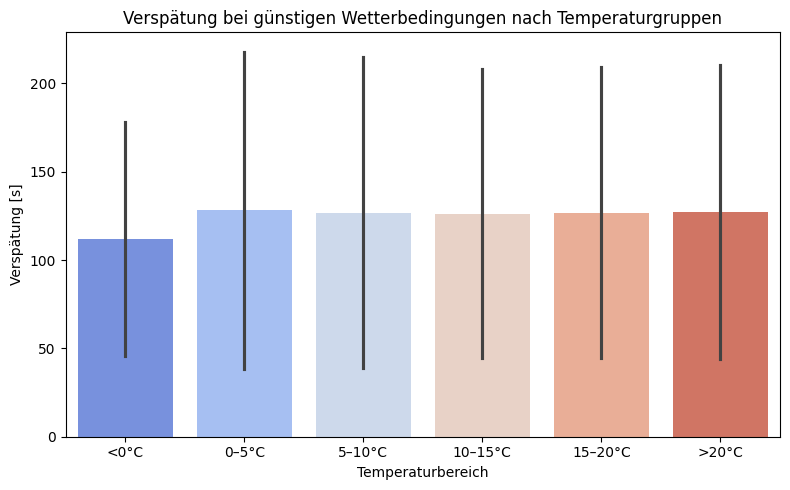

,Korrelationskoeffizient (r),p-Wert,Signifikanz
Gesamte Gruppe,0.006000,0.000000,Ja


,r,p-Wert,Signifikant
Temperaturgruppe,,,
0–5°C,0.037000,0.000000,Ja
5–10°C,-0.030000,0.000000,Ja
10–15°C,0.007000,0.000000,Ja
15–20°C,-0.013000,0.000000,Ja
>20°C,0.028000,0.000000,Ja
<0°C,-0.025000,0.000000,Ja


,T-Statistik,P-Wert,Signifikanz
T-Test: warm vs. kalt,7.777000,0.000000,Ja


In [ ]:
# Schritt 1: Wetterbedingungen und Temperaturgruppen
def wetter_guenstig_mit_tempgruppen(df):
    guenstig = df[
        (df['WINDGESCHWINDIGKEIT [kmh]'] < 20) &
        (df['NEUSCHNEEHOEHE [cm]'] == 0) &
        (df['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'] == 0) &
        (df['TAG_MIT_HAGEL'] == 0) &
        (df['TAG_MIT_NEBEL'] == 0)
    ].copy()
    bins = [-float('inf'), 0, 5, 10, 15, 20, float('inf')]
    labels = ['<0°C', '0–5°C', '5–10°C', '10–15°C', '15–20°C', '>20°C']
    guenstig['Temperaturgruppe'] = pd.cut(guenstig['TEMPERATUR [°C]'], bins=bins, labels=labels)
    return guenstig

# 2. Farben vorbereiten für Tabellen
farben = sns.color_palette('coolwarm', n_colors=6)
hex_farben = [mcolors.rgb2hex(c) for c in farben]
gruppen_labels = ['<0°C', '0–5°C', '5–10°C', '10–15°C', '15–20°C', '>20°C']
farbe_mapping = dict(zip(gruppen_labels, hex_farben))

def einfärben_nach_gruppe(s):
    return [f'background-color: {farbe_mapping.get(str(s.name), "#ffffff")}'] * len(s)

# 3. Statistik anzeigen
def zeige_stat_tabelle(df):
    tabelle = df.groupby("Temperaturgruppe", observed=True)["VERSPAETUNG [s]"].agg(
        ['count', 'mean', 'median', 'std', 'min', 'max']
    ).rename(columns={
        'count': 'Anzahl', 'mean': 'Durchschnitt', 'median': 'Median',
        'std': 'Std-Abw.', 'min': 'Min', 'max': 'Max'
    })
    display(tabelle.style
            .set_caption("Verspätungsstatistik nach Temperaturgruppen")
            .format("{:.2f}")
            .apply(einfärben_nach_gruppe, axis=1)
            .set_properties(**{'color': 'black'}))

# 4. Plot erstellen
def plot_tempgruppen_statistik(df):
    plt.figure(figsize=(8,5))
    sns.barplot(
        data=df,
        x='Temperaturgruppe',
        y='VERSPAETUNG [s]',
        hue='Temperaturgruppe',
        palette='coolwarm',
        errorbar='sd',
        legend=False
    )
    plt.title("Verspätung bei günstigen Wetterbedingungen nach Temperaturgruppen")
    plt.ylabel("Verspätung [s]")
    plt.xlabel("Temperaturbereich")
    plt.tight_layout()
    plt.show()

# 5. Korrelationsanalyse gesamt
def temperatur_korrelationsanalyse(df):
    guenstig = df[
        (df['WINDGESCHWINDIGKEIT [kmh]'] < 20) &
        (df['NEUSCHNEEHOEHE [cm]'] == 0) &
        (df['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'] == 0) &
        (df['TAG_MIT_HAGEL'] == 0) &
        (df['TAG_MIT_NEBEL'] == 0)
    ].copy()
    r, p = stats.pearsonr(guenstig['TEMPERATUR [°C]'], guenstig['VERSPAETUNG [s]'])
    df_korr = pd.DataFrame({
        'Korrelationskoeffizient (r)': [round(r, 3)],
        'p-Wert': [round(p, 5)],
        'Signifikanz': ['Ja' if p < 0.05 else 'Nein']
    }, index=["Gesamte Gruppe"])
    display(df_korr.style
            .set_caption("Korrelationsanalyse: Temperatur vs. Verspätung")
            .set_properties(**{'background-color': 'white', 'color': 'black'}))

#6. Korrelationsanalyse je Gruppe
def korrelation_nach_tempgruppen(df):
    gruppen = df['Temperaturgruppe'].dropna().unique()
    ergebnisse = []
    for gruppe in gruppen:
        teil_df = df[df['Temperaturgruppe'] == gruppe]
        if len(teil_df) > 2:
            r, p = stats.pearsonr(teil_df['TEMPERATUR [°C]'], teil_df['VERSPAETUNG [s]'])
            ergebnisse.append({
                'Temperaturgruppe': gruppe,
                'r': round(r, 3),
                'p-Wert': round(p, 5),
                'Signifikant': 'Ja' if p < 0.05 else 'Nein'
            })
        else:
            ergebnisse.append({
                'Temperaturgruppe': gruppe,
                'r': None,
                'p-Wert': None,
                'Signifikant': 'Zu wenige Daten'
            })
    df_korr = pd.DataFrame(ergebnisse).set_index("Temperaturgruppe")
    display(df_korr.style
            .set_caption("Korrelationsanalyse je Temperaturgruppe")
            .apply(einfärben_nach_gruppe, axis=1)
            .set_properties(**{'color': 'black'}))

# 7. T-Test: kalt (<5°C) vs. warm (>20°C)
def t_test_extremgruppen(df):
    kalt = df[df['Temperaturgruppe'].isin(['<0°C', '0–5°C'])]['VERSPAETUNG [s]']
    warm = df[df['Temperaturgruppe'] == '>20°C']['VERSPAETUNG [s]']
    t_stat, p_val = stats.ttest_ind(warm, kalt, equal_var=False)
    df_t = pd.DataFrame({
        "T-Statistik": [round(t_stat, 3)],
        "P-Wert": [round(p_val, 5)],
        "Signifikanz": ["Ja" if p_val < 0.05 else "Nein"]
    }, index=["T-Test: warm vs. kalt"])
    display(df_t.style
            .set_properties(**{'background-color': 'white', 'color': 'black'}))

# 8. Anwendung
gruppen_df = wetter_guenstig_mit_tempgruppen(df)
zeige_stat_tabelle(gruppen_df)
plot_tempgruppen_statistik(gruppen_df)
temperatur_korrelationsanalyse(df)
korrelation_nach_tempgruppen(gruppen_df)
t_test_extremgruppen(gruppen_df)


### Interpretation: Verspätungen nach Temperaturgruppen
An sehr kalten Tagen (< 0 °C) ist die durchschnittliche Verspätung mit 111,8 Sekunden am geringsten.
In allen übrigen Temperaturgruppen liegt der Durchschnitt deutlich höher – relativ stabil zwischen 126 und 128 Sekunden.
Der Median beträgt ab 0 °C konsistent 101–102 Sekunden, was auf eine symmetrische Verteilung hindeutet.
Die Standardabweichung ist unter 0 °C mit 66 s merklich kleiner als in den anderen Gruppen (über 80 s).

### Fazit:
Die Auswertung deutet darauf hin, dass es bei sehr tiefen Temperaturen zu geringeren Verspätungen kommt. In der Praxix macht dies aber wenig Sinn.
Die Gruppe < 0 °C enthält deutlich weniger Daten (nur ~120'000 Einträge), was die Aussagekraft einschränken kann.
Ausfälle von Fahrten – z. B. wetterbedingte Betriebsunterbrechungen – werden nicht berücksichtigt. Gerade bei Kälte könnten Trams eher ganz ausfallen, was in dieser Analyse nicht als Verspätung erscheint, sondern gar nicht erfasst wird.

### Interpretation: Temperatur vs. Verspätung
Die Korrelationsanalyse ergibt für die gesamte Stichprobe einen sehr schwachen Zusammenhang zwischen Temperatur und Verspätung (r = 0.006, p < 0.001). Auch innerhalb der Temperaturgruppen liegen die r-Werte nahe bei null.

Trotz formaler Signifikanz ist der Effekt praktisch nicht relevant. Die durchschnittlichen Verspätungen bleiben über alle Temperaturbereiche hinweg weitgehend konstant. Die statistische Signifikanz ist auf die große Datenmenge zurückzuführen – nicht auf einen tatsächlichen Einfluss der Temperatur.



,Anzahl,Durchschnitt,Median,Std-Abw.,Min,Max
Schneegruppe,,,,,,
0–1 cm,11772681.00,127.14,102.00,87.04,61.00,1800.00
2–5 cm,253674.00,123.00,99.00,81.41,61.00,1792.00
6–10 cm,71995.00,129.32,103.00,86.28,61.00,1788.00
11–20 cm,97477.00,214.68,140.00,214.40,61.00,1800.00


/var/folders/y5/k4w6t8l1781fsnsg064n4dxw0000gn/T/ipykernel_34478/2292525327.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


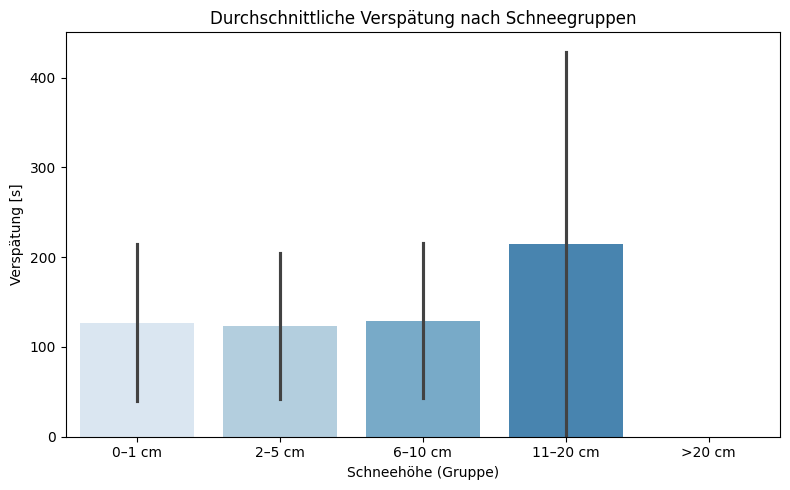

,Korrelationskoeffizient (r),p-Wert,Signifikanz,Stärke
Gesamte Daten,0.346000,0.000000,Ja,schwach


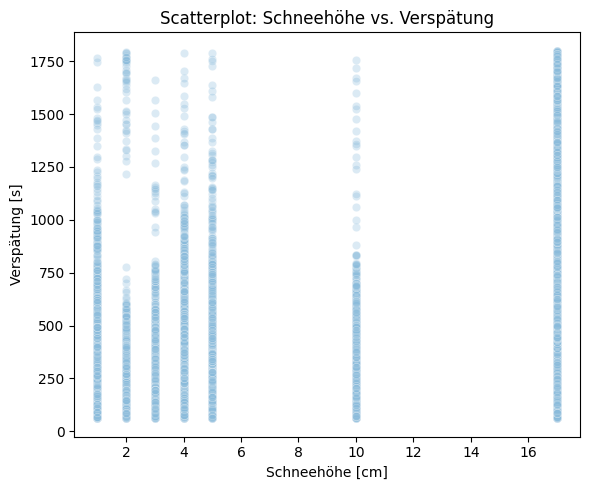

/var/folders/y5/k4w6t8l1781fsnsg064n4dxw0000gn/T/ipykernel_34478/2292525327.py:39: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = stats.pearsonr(


,r,p-Wert,Signifikant
Schneegruppe,,,
0–1 cm,nan,nan,Nein
2–5 cm,0.033000,0.000000,Ja
6–10 cm,nan,nan,Nein
11–20 cm,0.306000,0.000000,Ja


In [ ]:
# 1. Schneegruppen erstellen
def schneegruppen_erstellen(df):
    bins = [0, 1, 5, 10, 20, float("inf")]
    labels = ["0–1 cm", "2–5 cm", "6–10 cm", "11–20 cm", ">20 cm"]
    df = df.copy()
    df["Schneegruppe"] = pd.cut(df["SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]"], bins=bins, labels=labels, right=False)
    return df

# 2. Farben vorbereiten (wie im Barplot)
farben = sns.color_palette("Blues", n_colors=6)
hex_farben = [to_hex(farbe) for farbe in farben]

# 3. Tabelle 1: Verspätungsstatistik einfärben
def schneegruppen_statistik_farbig(df):
    stat = df.groupby("Schneegruppe", observed=True)["VERSPAETUNG [s]"].agg(
        ['count', 'mean', 'median', 'std', 'min', 'max']
    ).rename(columns={
        'count': 'Anzahl',
        'mean': 'Durchschnitt',
        'median': 'Median',
        'std': 'Std-Abw.',
        'min': 'Min',
        'max': 'Max'
    })
    farbzuordnung = {k: f'background-color: {hex_farben[i]}; color: black;'
                     for i, k in enumerate(stat.index)}
    return stat.style.set_caption("Verspätungsstatistik nach Schneegruppen") \
              .format("{:.2f}") \
              .apply(lambda row: [farbzuordnung.get(row.name, '')] * len(row), axis=1)

# 4. Tabelle 2: Korrelation einfärben
def korrelation_nach_schneegruppen_farbig(df):
    schnee_df = schneegruppen_erstellen(df)
    ergebnisse = []

    for gruppe in schnee_df['Schneegruppe'].dropna().unique():
        teil_df = schnee_df[schnee_df['Schneegruppe'] == gruppe]
        if len(teil_df) > 2:
            r, p = stats.pearsonr(
                teil_df['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'],
                teil_df['VERSPAETUNG [s]']
            )
            ergebnisse.append({
                'Schneegruppe': gruppe,
                'r': round(r, 3),
                'p-Wert': round(p, 5),
                'Signifikant': 'Ja' if p < 0.05 else 'Nein'
            })
        else:
            ergebnisse.append({
                'Schneegruppe': gruppe,
                'r': None,
                'p-Wert': None,
                'Signifikant': 'Zu wenige Daten'
            })

    df_korr = pd.DataFrame(ergebnisse).set_index("Schneegruppe")
    farbzuordnung = {k: f'background-color: {hex_farben[i]}; color: black;'
                     for i, k in enumerate(df_korr.index)}
    return df_korr.style.set_caption("Korrelationsanalyse je Schneegruppe") \
                .apply(lambda row: [farbzuordnung.get(row.name, '')] * len(row), axis=1)

#5. Barplot: Durchschnittliche Verspätung je Schneegruppe
def plot_schneegruppen(df):
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=df,
        x='Schneegruppe',
        y='VERSPAETUNG [s]',
        errorbar='sd',
        palette='Blues'
    )
    plt.title("Durchschnittliche Verspätung nach Schneegruppen")
    plt.ylabel("Verspätung [s]")
    plt.xlabel("Schneehöhe (Gruppe)")
    plt.tight_layout()
    plt.show()

# 6. Scatterplot & Gesamtkorrelation
def korrelation_schnee_gesamt(df):
    schnee_df = df[df['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'] > 0].copy()
    r, p = stats.pearsonr(
        schnee_df['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'],
        schnee_df['VERSPAETUNG [s]']
    )
    korrelations_df = pd.DataFrame({
        'Korrelationskoeffizient (r)': [round(r, 3)],
        'p-Wert': [round(p, 5)],
        'Signifikanz': ['Ja' if p < 0.05 else 'Nein'],
        'Stärke': (
            ['stark'] if abs(r) > 0.7 else
            ['mittel'] if abs(r) > 0.4 else
            ['schwach'] if abs(r) > 0.2 else
            ['keine']
        )
    }, index=["Gesamte Daten"])
    display(korrelations_df.style
            .set_caption("Korrelationsanalyse: Schneehöhe vs. Verspätung")
            .set_properties(**{'background-color': 'white', 'color': 'black'}))

    plt.figure(figsize=(6, 5))
    sns.scatterplot(
        x=schnee_df['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'],
        y=schnee_df['VERSPAETUNG [s]'],
        alpha=0.3
    )
    plt.title("Scatterplot: Schneehöhe vs. Verspätung")
    plt.xlabel("Schneehöhe [cm]")
    plt.ylabel("Verspätung [s]")
    plt.tight_layout()
    plt.show()

# 7. Ausführung (nur wenn df geladen ist)
# Beispiel: df = pd.read_csv("Datensatz_komplett.csv")
schneegruppen_df = schneegruppen_erstellen(df)
display(schneegruppen_statistik_farbig(schneegruppen_df))
plot_schneegruppen(schneegruppen_df)
korrelation_schnee_gesamt(df)
display(korrelation_nach_schneegruppen_farbig(df))


### Interpretation – Verspätungen nach Schneegruppen
Bei geringer Schneehöhe (0–10 cm) liegt die durchschnittliche Verspätung stabil zwischen 123 und 129 Sekunden.
Ab 11–20 cm Schnee steigt die durchschnittliche Verspätung deutlich auf 215 Sekunden.
Gruppen mit Schneehöhen über 20 cm sind Keine Daten vorhanden.

### Interpretation – Korrelation zwischen Schneehöhe und Verspätung
In der Gruppe 2–5 cm zeigt sich ein sehr schwacher, aber signifikanter Zusammenhang (r = 0.033, p < 0.001).
In der Gruppe 11–20 cm ist der Zusammenhang deutlich stärker (r = 0.318) und ebenfalls signifikant – je mehr Schnee, desto höher die Verspätung.
In den Gruppen 0–1 cm und 6–10 cm konnte keine verlässliche Korrelation berechnet werden (vermutlich wegen zu wenig Variation innerhalb der Gruppen).

,Anzahl,Durchschnitt,Median,Std_Abw
Windgruppe,,,,
Günstige Bedingungen (≤20 km/h),12014627.00,127.74,102.00,89.03
20–30 km/h,178098.00,130.19,103.00,88.62
30–40 km/h,3102.00,110.15,94.00,53.33


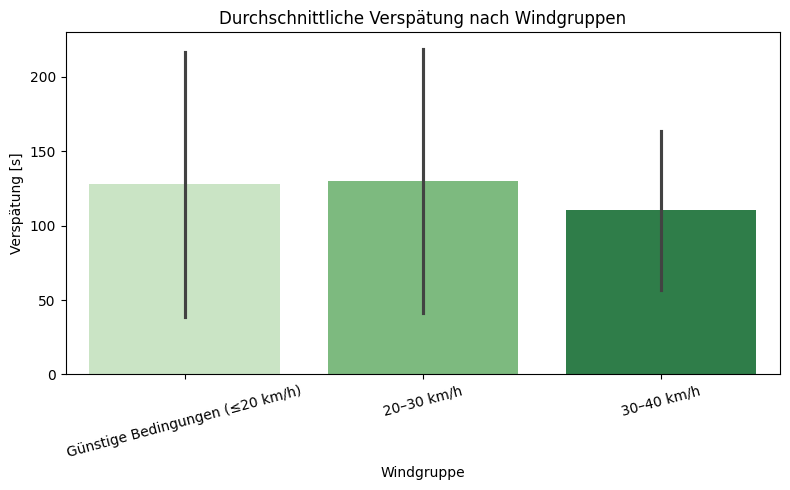

,r,p-Wert,Signifikant
Windgruppe,,,
Günstige Bedingungen (≤20 km/h),0.015000,0.000000,Ja
20–30 km/h,0.066000,0.000000,Ja
30–40 km/h,-0.045000,0.012220,Ja


In [ ]:
#1. Windgruppen erstellen (ohne >40 km/h)
def windgruppen_erstellen(df):
    bins = [0, 20, 30, 40]  # keine obere Gruppe mehr
    labels = ['Günstige Bedingungen (≤20 km/h)', '20–30 km/h', '30–40 km/h']
    df = df.copy()
    df['Windgruppe'] = pd.cut(df['WINDGESCHWINDIGKEIT [kmh]'], bins=bins, labels=labels, right=True)
    return df

#2. Grüntöne für Tabellen & Plot
farben = sns.color_palette("Greens", n_colors=3)
hex_farben = [to_hex(farbe) for farbe in farben]

#3. Tabelle: Verspätungsstatistik je Windgruppe
def windgruppen_statistik_farbig(df):
    stat = df.groupby("Windgruppe", observed=True)["VERSPAETUNG [s]"].agg(
        Anzahl='count',
        Durchschnitt='mean',
        Median='median',
        Std_Abw='std'
    ).round(2)
    farbzuordnung = {k: f'background-color: {hex_farben[i]}; color: black;'
                     for i, k in enumerate(stat.index)}
    return stat.style.set_caption("Verspätungsstatistik nach Windgruppen") \
              .format("{:.2f}") \
              .apply(lambda row: [farbzuordnung.get(row.name, '')] * len(row), axis=1)

#4. Plot: Durchschnittliche Verspätung nach Windgruppen
def plot_windgruppen(df):
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=df,
        x='Windgruppe',
        y='VERSPAETUNG [s]',
        hue='Windgruppe',
        palette='Greens',
        errorbar='sd',
        estimator='mean',
        legend=False
    )
    plt.title("Durchschnittliche Verspätung nach Windgruppen")
    plt.ylabel("Verspätung [s]")
    plt.xlabel("Windgruppe")
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()

#5. Korrelationsanalyse nach Windgruppe
def korrelation_windgruppen(df):
    gruppen = df['Windgruppe'].dropna().unique()
    ergebnisse = []
    for gruppe in gruppen:
        teil_df = df[df['Windgruppe'] == gruppe]
        if len(teil_df) > 2:
            r, p = stats.pearsonr(teil_df['WINDGESCHWINDIGKEIT [kmh]'], teil_df['VERSPAETUNG [s]'])
            ergebnisse.append({
                'Windgruppe': gruppe,
                'r': round(r, 3),
                'p-Wert': round(p, 5),
                'Signifikant': 'Ja' if p < 0.05 else 'Nein'
            })
        else:
            ergebnisse.append({
                'Windgruppe': gruppe,
                'r': None,
                'p-Wert': None,
                'Signifikant': 'Zu wenige Daten'
            })
    df_korr = pd.DataFrame(ergebnisse).set_index("Windgruppe")
    farbzuordnung = {k: f'background-color: {hex_farben[i]}; color: black;'
                     for i, k in enumerate(df_korr.index)}
    return df_korr.style.set_caption("Korrelationsanalyse je Windgruppe") \
                .apply(lambda row: [farbzuordnung.get(row.name, '')] * len(row), axis=1)

#6. Ausführung
df_windgruppen = windgruppen_erstellen(df)
display(windgruppen_statistik_farbig(df_windgruppen))
plot_windgruppen(df_windgruppen)
display(korrelation_windgruppen(df_windgruppen))


### Interpretation: Einfluss der Windgeschwindigkeit auf Verspätungen

Leichter Anstieg bei 20–30 km/h:
- Die durchschnittliche Verspätung steigt von 127,7 s (≤ 20 km/h) auf 130,2 s an. Der Unterschied ist statistisch signifikant.
Rückgang bei 30–40 km/h:
- Die durchschnittliche Verspätung sinkt auf 110,2 s – trotz signifikantem Testergebnis. Ursache könnte die geringe Fallzahl (nur 3102 Werte) oder gefilterte Ausreißer (z. B. Ausfälle) sein.
Korrelationen schwach:
- Die berechneten Korrelationskoeffizienten (r) liegen alle unter ±0.07 – damit ist der Zusammenhang zwischen Windgeschwindigkeit und Verspätung praktisch sehr gering.
Vorsicht bei Interpretation höherer Windgruppen:
Aussagen zu starkem Wind sind aufgrund der begrenzten Datenbasis nur eingeschränkt aussagekräftig.

### Fazit

Bei Wind zwischen 20–30 km/h steigen die Verspätungen leicht und signifikant an. Ab 30 km/h sinkt der Mittelwert wieder – vermutlich wegen geringer Fallzahl und gefilterter Extremwerte. Insgesamt ist der Einfluss von Wind statistisch signifikant, aber praktisch gering.

,Anzahl,Durchschnitt,Median,Std-Abw.
Günstige Bedingungen,6693313,126.840000,102.000000,82.600000
Hagel,40216,138.720000,107.000000,105.660000


/var/folders/y5/k4w6t8l1781fsnsg064n4dxw0000gn/T/ipykernel_34478/2932180187.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


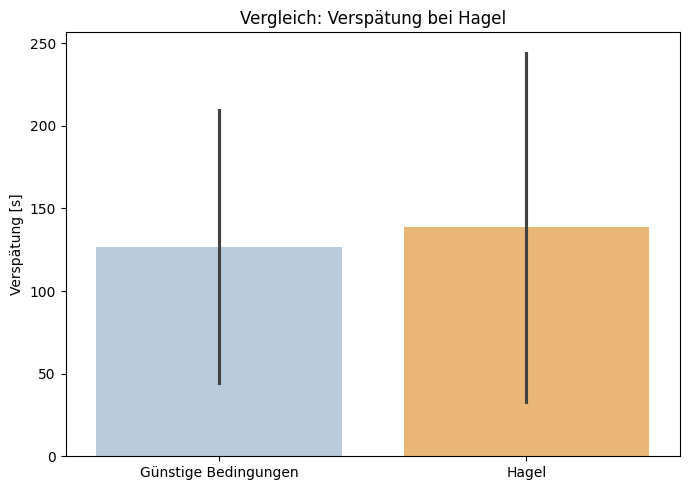

,T-Statistik,T p-Wert,T Signifikanz,Korrelationskoeffizient (r),Korr p-Wert,Korr Signifikanz
Hagel vs. Günstig,-22.507000,0.000000,Ja,0.007000,0.000000,Ja


In [ ]:
#1. Günstige Bedingungen
def wetter_mit_guenstigen_bedingungen(df):
    return df[
        (df['WINDGESCHWINDIGKEIT [kmh]'] < 20) &
        (df['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'] == 0) &
        (df['TAG_MIT_HAGEL'] == 0) &
        (df['TAG_MIT_NEBEL'] == 0) &
        (df['TEMPERATUR [°C]'] > 10)
    ].copy()

#2 Statistik zusammengefasst
def statistik_zusammen(df1, df2, label1, label2):
    stat = pd.DataFrame({
        'Anzahl': [df1['VERSPAETUNG [s]'].count(), df2['VERSPAETUNG [s]'].count()],
        'Durchschnitt': [df1['VERSPAETUNG [s]'].mean(), df2['VERSPAETUNG [s]'].mean()],
        'Median': [df1['VERSPAETUNG [s]'].median(), df2['VERSPAETUNG [s]'].median()],
        'Std-Abw.': [df1['VERSPAETUNG [s]'].std(), df2['VERSPAETUNG [s]'].std()]
    }, index=[label1, label2]).round(2)

    # Farben definieren
    farben = {
        label1: 'background-color: #b3cde3; color: black;',  # Blau
        label2: 'background-color: #fdb863; color: black;'   # Orange
    }
    return stat.style.set_caption("Statistik: Günstige Bedingungen vs. Hagel") \
        .apply(lambda row: [farben.get(row.name, '')]*len(row), axis=1)

# 3. Plot mit definierten Farben ---
def plot_verspaetungen(df_list, labels, title):
    plot_df = pd.concat([
        df.assign(Wetterlage=label) for df, label in zip(df_list, labels)
    ])
    plt.figure(figsize=(7, 5))
    sns.barplot(
        data=plot_df,
        x='Wetterlage',
        y='VERSPAETUNG [s]',
        palette=['#b3cde3', '#fdb863'],
        errorbar='sd'
    )
    plt.title(title)
    plt.ylabel("Verspätung [s]")
    plt.xlabel("")
    plt.tight_layout()
    plt.show()

#4. T-Test & Korrelation kombiniert ---
def zusammenfassung_tests(guenstig_df, hagel_df, df):
    t_stat, p_val = stats.ttest_ind(
        guenstig_df['VERSPAETUNG [s]'],
        hagel_df['VERSPAETUNG [s]'],
        equal_var=False,
        nan_policy='omit'
    )
    df_clean = df[['TAG_MIT_HAGEL', 'VERSPAETUNG [s]']].dropna()
    r, p_corr = stats.pearsonr(df_clean['TAG_MIT_HAGEL'], df_clean['VERSPAETUNG [s]'])

    df_result = pd.DataFrame({
        'T-Statistik': [round(t_stat, 3)],
        'T p-Wert': [round(p_val, 5)],
        'T Signifikanz': ['Ja' if p_val < 0.05 else 'Nein'],
        'Korrelationskoeffizient (r)': [round(r, 3)],
        'Korr p-Wert': [round(p_corr, 5)],
        'Korr Signifikanz': ['Ja' if p_corr < 0.05 else 'Nein']
    }, index=["Hagel vs. Günstig"])

    return df_result.style.set_caption("T-Test & Korrelation: Hagel vs. Günstig") \
        .apply(lambda row: ['background-color: #fdb863; color: black;'] * len(row), axis=1)

guenstig_df = wetter_mit_guenstigen_bedingungen(df)
hagel_df = df[df['TAG_MIT_HAGEL'] == 1]

display(statistik_zusammen(guenstig_df, hagel_df, "Günstige Bedingungen", "Hagel"))
plot_verspaetungen([guenstig_df, hagel_df], ["Günstige Bedingungen", "Hagel"], "Vergleich: Verspätung bei Hagel")
display(zusammenfassung_tests(guenstig_df, hagel_df, df))

### Statistische Auswertung – T-Test und Korrelation
Der T-Test zeigt einen deutlichen Unterschied zwischen den beiden Gruppen:
– T-Wert: –22.51
– p-Wert: < 0.001
→ Der Unterschied ist hoch signifikant, also mit sehr hoher Wahrscheinlichkeit nicht zufällig.
Der Korrelationskoeffizient (r = 0.007) ist zwar statistisch signifikant, aber praktisch vernachlässigbar – der Zusammenhang zwischen „Hagel ja/nein“ und Verspätung ist sehr schwach

,Anzahl,Durchschnitt,Median,Std_Abw
Günstige Bedingungen,5766614.00,125.91,101.00,81.31
Mit Nebel,1366192.00,125.07,100.00,87.46


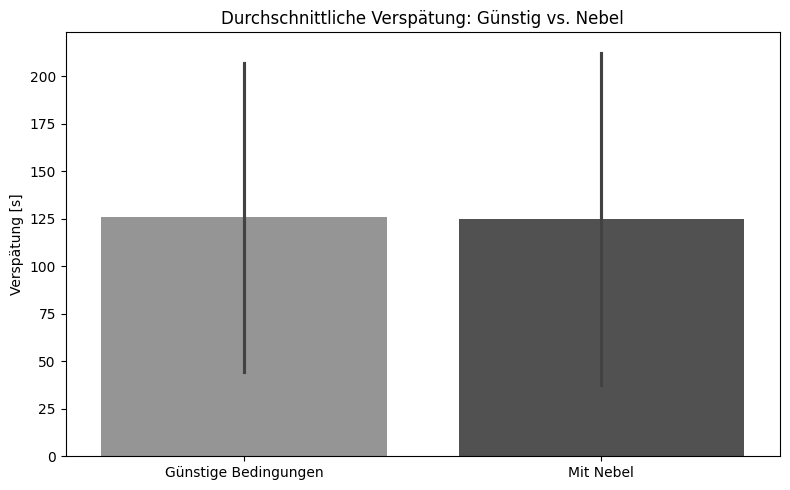


T-Test: Günstige Bedingungen vs. Mit Nebel
--------------------------------------------------
t-Statistik: 10.164
p-Wert: 0.00000
→ Der Unterschied ist statistisch signifikant (p < 0.05).

Korrelation: Nebel vs. Verspätung
----------------------------------------
r = -0.011, p = 0.00000 → signifikant


In [ ]:
# 1. Wetter mit Nebel (nur Nebeltage)
def filter_nebel_wetter(df):
    return df[df['TAG_MIT_NEBEL'] == 1].copy()

# 2. Statistikfunktion
def statistik_berechnen(df, label):
    daten = df['VERSPAETUNG [s]'].dropna()
    statistik = {
        'Anzahl': daten.count(),
        'Durchschnitt': daten.mean(),
        'Median': daten.median(),
        'Std_Abw': daten.std()
    }
    return pd.DataFrame(statistik, index=[label]).round(2)

# 3. Graufarben definieren
farben = sns.color_palette("Greys", n_colors=3)[1:]
hex_farben = [to_hex(farbe) for farbe in farben]

# 4. Farbige Statistiktabelle
def statistik_farbig(df_dict):
    stat_df = pd.concat([statistik_berechnen(df, label) for label, df in df_dict.items()])
    farbzuordnung = {k: f'background-color: {hex_farben[i]}; color: black;'
                     for i, k in enumerate(stat_df.index)}
    return stat_df.style.set_caption("Verspätungsstatistik: Günstig vs. Nebel") \
        .format("{:.2f}") \
        .apply(lambda row: [farbzuordnung.get(row.name, '')] * len(row), axis=1)

# 5. Plotfunktion
def plot_verspaetung(df_dict):
    plot_df = pd.concat([
        df.assign(Wettergruppe=label) for label, df in df_dict.items()
    ])
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=plot_df,
        x='Wettergruppe',
        y='VERSPAETUNG [s]',
        hue='Wettergruppe',
        palette=hex_farben,
        errorbar='sd',
        legend=False
    )
    plt.title("Durchschnittliche Verspätung: Günstig vs. Nebel")
    plt.ylabel("Verspätung [s]")
    plt.xlabel("")
    plt.tight_layout()
    plt.show()

# 6. T-Test
def t_test(df1, df2, label1, label2):
    t_stat, p_val = stats.ttest_ind(df1['VERSPAETUNG [s]'], df2['VERSPAETUNG [s]'],
                                    equal_var=False, nan_policy='omit')
    print(f"\nT-Test: {label1} vs. {label2}")
    print("--------------------------------------------------")
    print(f"t-Statistik: {t_stat:.3f}")
    print(f"p-Wert: {p_val:.5f}")
    if p_val < 0.05:
        print("→ Der Unterschied ist statistisch signifikant (p < 0.05).")
    else:
        print("→ Kein signifikanter Unterschied (p ≥ 0.05).")

# 7. Pearson-Korrelation
def korrelation_mit_nebel(df):
    df_clean = df[['TAG_MIT_NEBEL', 'VERSPAETUNG [s]']].dropna()
    if df_clean['TAG_MIT_NEBEL'].nunique() < 2:
        print("Nicht genug Variation in 'TAG_MIT_NEBEL'.")
        return
    r, p = stats.pearsonr(df_clean['TAG_MIT_NEBEL'], df_clean['VERSPAETUNG [s]'])
    print("\nKorrelation: Nebel vs. Verspätung")
    print("----------------------------------------")
    print(f"r = {r:.3f}, p = {p:.5f} → {'signifikant' if p < 0.05 else 'nicht signifikant'}")

# 8. Ausführung
df_nebel = filter_nebel_wetter(df)

gruppen = {
    "Günstige Bedingungen": df_guenstig,  # bereits vordefiniert
    "Mit Nebel": df_nebel
}

display(statistik_farbig(gruppen))
plot_verspaetung(gruppen)
t_test(df_guenstig, df_nebel, "Günstige Bedingungen", "Mit Nebel")
korrelation_mit_nebel(df)


### Interpretation
Bei der Analyse des Einflusses von Nebel auf Verspätungen zeigt sich, dass die durchschnittliche Verspätung bei Nebel (125.08 s)
im Vergleich zu günstigen Bedingungen (125.91 s) minimal geringer ist.
Ein T-Test bestätigt, dass dieser Unterschied aufgrund der grossen Stichprobe statistisch signifikant ist (p < 0.001),
jedoch ist der praktische Unterschied vernachlässigbar. Auch die Korrelationsanalyse ergibt einen signifikanten,
aber äusserst schwachen negativen Zusammenhang (r = –0.011), was darauf hinweist, dass Nebel keinen relevanten Einfluss
auf die Höhe der Verspätungen hat.

/var/folders/y5/k4w6t8l1781fsnsg064n4dxw0000gn/T/ipykernel_34478/2410622154.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


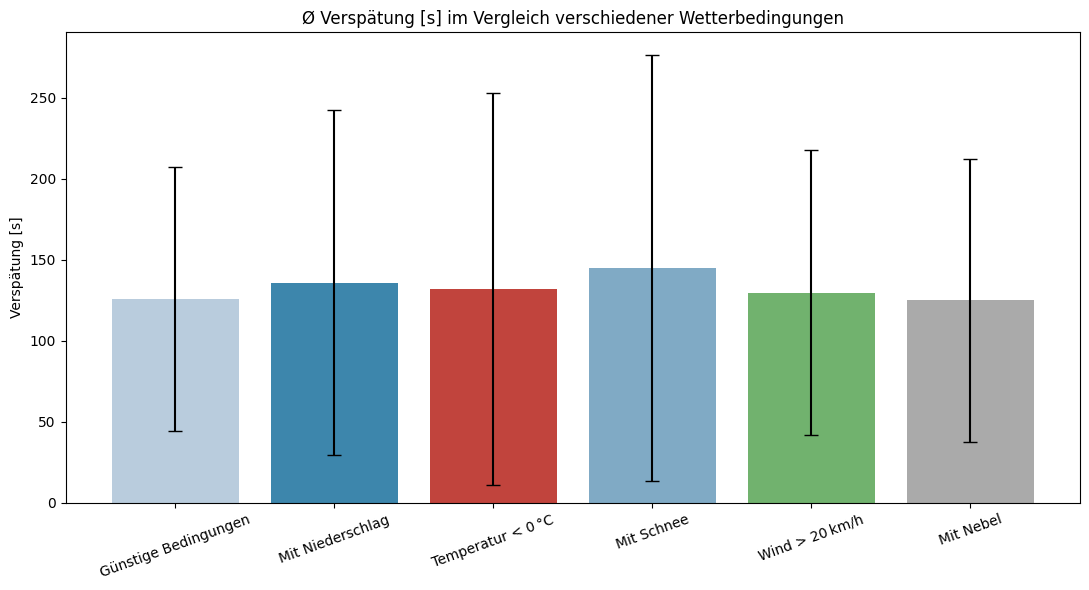

Vergleichstabelle:


,Mittelwert,Std-Abweichung,Anzahl
Gruppe,,,
Günstige Bedingungen,125.910000,81.310000,5766614
Mit Niederschlag,136.010000,106.570000,1707309
Temperatur < 0 °C,131.920000,121.190000,430981
Mit Schnee,145.200000,131.450000,423146
Wind > 20 km/h,129.850000,88.180000,181200
Mit Nebel,125.070000,87.460000,1366192


In [ ]:
# 1. Funktion für Statistik je Wettergruppe
def gruppe_stats(condition, label, df):
    subset = df[condition]
    if subset.empty:
        return None
    return {
        'Gruppe': label,
        'Mittelwert': subset['VERSPAETUNG [s]'].mean(),
        'Std-Abweichung': subset['VERSPAETUNG [s]'].std(),
        'Anzahl': subset.shape[0]
    }

# 2. Bedingungen definieren
gruppen = [
    gruppe_stats((df['WINDGESCHWINDIGKEIT [kmh]'] < 20) &
                 (df['NEUSCHNEEHOEHE [cm]'] == 0) &
                 (df['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'] == 0) &
                 (df['TAG_MIT_NEBEL'] == 0) &
                 (df['TEMPERATUR [°C]'] > 10) &
                 (df['NIEDERSCHLAG [mm]'] == 0), "Günstige Bedingungen", df),
    gruppe_stats(df['NIEDERSCHLAG [mm]'] > 0, "Mit Niederschlag", df),
    gruppe_stats(df['TEMPERATUR [°C]'] < 0, "Temperatur < 0 °C", df),
    gruppe_stats(df['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'] > 0, "Mit Schnee", df),
    gruppe_stats(df['WINDGESCHWINDIGKEIT [kmh]'] > 20, "Wind > 20 km/h", df),
    gruppe_stats(df['TAG_MIT_NEBEL'] == 1, "Mit Nebel", df),
]

# 3. Nur gültige Gruppen übernehmen
df_plot = pd.DataFrame([g for g in gruppen if g is not None])

#4. Farbzuordnung
farben = {
    "Günstige Bedingungen": "#b3cde3",
    "Mit Niederschlag": "#2b8cbe",
    "Temperatur < 0 °C": "#d73027",
    "Mit Schnee": "#74add1",
    "Wind > 20 km/h": "#66bd63",
    "Mit Nebel": "#aaaaaa"
}

#5.  Plot erstellen
plt.figure(figsize=(11, 6))
sns.barplot(
    data=df_plot,
    x='Gruppe',
    y='Mittelwert',
    palette=[farben[g] for g in df_plot['Gruppe']],
    errorbar=None
)
for i, row in df_plot.iterrows():
    plt.errorbar(i, row['Mittelwert'], yerr=row['Std-Abweichung'], fmt='none', color='black', capsize=5)

plt.title("Ø Verspätung [s] im Vergleich verschiedener Wetterbedingungen")
plt.ylabel("Verspätung [s]")
plt.xlabel("")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

#6. Tabelle anzeigen
print("Vergleichstabelle:")
display(df_plot.round(2).set_index("Gruppe").style.set_properties(**{'background-color': 'white', 'color': 'black'}))


### Interpretation
Die Analyse zeigt, dass verschiedene Wetterbedingungen unterschiedlich starke Auswirkungen auf die Höhe der Verspätungen haben.
Während sich bei Nebel kaum ein Unterschied zu günstigen Bedingungen feststellen lässt (125.08 s vs. 125.91 s),
führen andere Wetterphänomene zu deutlich höheren durchschnittlichen Verspätungen. Besonders Schnee hat mit durchschnittlich 145.20
Sekunden den größten Einflusss, gefolgt von Hagel (138.72 s) und allgemeinem Niederschlag (136.01 s. Auch Temperaturen unter 0 °C ((31.96 s)  führen zu leicht erhöhten Verspätungswerte.
Nebe den Mittelwerten steigt bei schlechteren Wetterbedingungen auch die Streuung der Verspätungen deutlich,
 was auf eine höhere Unvorhersehbarkeit hindeutett. Insgesamt lässt sich festhalte, dass vor allem Schnee und
 Niederschlag relevante Verzögerungen verursachen, während Nebel kaum eine praktische Rolle spielt.


## 4.2 Multiple Lineare Regression: Einfluss von Temperatur und Niederschlag auf Verspätungen

Auch wenn einzelne Variablen wie Temperatur oder Niederschlag keine signifikante Korrelation mit der Zielvariable zeigen, kann ihre Kombination dennoch einen erklärenden Zusammenhang ergeben, der sich nur durch multiple lineare Regression erfassen lässt.

In diesem Schritt wird daher eine multiple lineare Regression (OLS) durchgeführt, um zu untersuchen, ob ein Zusammenhang zwischen den Wettervariablen Temperatur und Niederschlag sowie der Tramverspätung in Sekunden besteht.

Zunächst werden die entsprechenden Spalten aus dem zusammengeführten Datensatz `df_merged_final` ausgewählt. Fehlende Werte werden entfernt, und ein Interzept (Konstante) wird dem Regressionsmodell hinzugefügt. Anschliessend wird das Modell mit `statsmodels.OLS()` gefittet und die Ergebnisse analysiert.

### Ergebnisse:
- **R² = 0.001**: Nur 0.1 % der Varianz der Verspätungen wird durch Temperatur und Niederschlag erklärt → der Einfluss ist praktisch vernachlässigbar.
- Beide Variablen sind zwar statistisch signifikant (**p < 0.001**), was jedoch hauptsächlich auf die sehr grosse Datenmenge zurückzuführen ist.

### Einfluss im Detail:
- **Niederschlag**: Pro mm Regen steigt die durchschnittliche Verspätung um ca. **6 Sekunden**.
- **Temperatur**: Pro °C mehr nimmt die Verspätung minimal um ca. **0.065 Sekunden** ab.

### Fazit:
Trotz statistischer Signifikanz liefern die Wetterdaten keinen praktisch nutzbaren Erklärungswert. Das Ergebnis bestätigt die vorherigen Korrelationsergebnisse und deutet darauf hin, dass Temperatur und Niederschlag keine geeigneten Prädiktoren für die Tramverspätung in Zürich darstellen – auch nicht in Kombination.


In [ ]:
# Relevante Spalten
feature_columns = [
    "TEMPERATUR [°C]",
    "NIEDERSCHLAG [mm]",


]

# Zielvariable
target_column = "VERSPAETUNG [s]"

# Daten vorbereiten
X = df_merged_final[feature_columns]
y = df_merged_final[target_column]

# Fehlende Werte entfernen
df_regression = pd.concat([X, y], axis=1).dropna()
X_clean = df_regression[feature_columns]
y_clean = df_regression[target_column]

# Intercept hinzufügen
X_with_const = sm.add_constant(X_clean)

# Regressionsmodell erstellen
model = sm.OLS(y_clean, X_with_const).fit()

# Ergebnisse anzeigen
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        VERSPAETUNG [s]   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     9931.
Date:                Mon, 19 May 2025   Prob (F-statistic):               0.00
Time:                        16:00:14   Log-Likelihood:            -7.2040e+07
No. Observations:            12195827   AIC:                         1.441e+08
Df Residuals:                12195824   BIC:                         1.441e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               128.0226      0.05

## 4.3 Korrelation gemeinsam auftretender Wetterparameter bei Top-Verspätungen


Um gemeinsam auftretende Wetterparameter bei den grössten Verspätungen zu analysieren, werden die relevanten Wetterdaten (Temperatur, Niederschlag, Wind und Schneefall) zunächst normiert. Die Normierung erfolgt auf ein Intervall von 0 bis 1, wodurch die unterschiedlichen Messgrössen vergleichbar gemacht werden.

Anschliessend werden die 50 grössten Verspätungen im Datensatz ausgewählt und sortiert. Dabei wurde der ursprüngliche Datensatz zuvor bereinigt, indem alle Verspätungen > 30 Minuten ausgeschlossen wurden.

Im dritten Schritt wird ein Plot erstellt, in dem die 50 grössten Verspätungen als Balkendiagramm auf der x-Achse dargestellt sind. Überlagert werden diese von den vier normierten Wetterparametern, die als Linien auf der y-Achse visualisiert werden. Diese kombinierte Darstellung ermöglicht es, Muster und Zusammenhänge zwischen bestimmten Wetterbedingungen und hohen Verspätungen zu erkennen.

In [ ]:
# import gdown
# file_id = "1nzKawzmobJgL1FYoRczZVbzWjzHzYWQU"
# destination = '/content/deine_datei.csv'
# gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)
# df_analyse = pd.read_csv('/content/deine_datei.csv')

#Kopie des orginal Datensatz erstellen
df_analyse = df_merged_final.copy()

In [ ]:
#1. Vorbereitung für Normierungsverfahren
scaler = MinMaxScaler()

#2. Spalten auswählen, die die zu normieren sind
spalten = ['TEMPERATUR [°C]', 'NIEDERSCHLAG [mm]','WINDGESCHWINDIGKEIT [kmh]', 'NEUSCHNEEHOEHE [cm]' ]


#3. Werte aus Spalten normieren und zu einem Dataframe zusammenfassen
df_norm = pd.DataFrame(scaler.fit_transform(df_analyse[spalten]), columns=spalten, index=df_analyse.index)

#4. Zusammenführung der Spalte 'VERSPAETUNG [s]' mit normierten Spalten
df_norm['VERSPAETUNG [s]'] = df_analyse['VERSPAETUNG [s]']

display(df_norm)


,TEMPERATUR [°C],NIEDERSCHLAG [mm],WINDGESCHWINDIGKEIT [kmh],NEUSCHNEEHOEHE [cm],VERSPAETUNG [s]
0,0.251889,0.094017,0.476351,0.0,69.0
1,0.251889,0.094017,0.476351,0.0,68.0
2,0.251889,0.094017,0.476351,0.0,72.0
3,0.251889,0.094017,0.476351,0.0,138.0
4,0.251889,0.094017,0.476351,0.0,187.0
...,...,...,...,...,...
12195822,0.103275,0.000000,0.097973,0.0,86.0
12195823,0.103275,0.000000,0.097973,0.0,88.0
12195824,0.103275,0.000000,0.097973,0.0,96.0
12195825,0.103275,0.000000,0.097973,0.0,86.0


In [ ]:
#5. Der Dataframe df_norm wird aufsteigend nach Spalte Verspätung sortiert.
df_sorted = df_norm.sort_values(by='VERSPAETUNG [s]' , ascending=True)
#6. aus dem sortierten Dataframe werden die 50 letzten Zeile entnommen. Das entspricht also den 50 grössten Verspätungen. (da aufsteigend sortiert wurde)
top50_norm=df_sorted.tail(50)
#7. Anzeigen der ersten 5 Zeilen - somit die 5 "kleinsten" Verspätungen aus den Top 50
display(top50_norm.head())


,TEMPERATUR [°C],NIEDERSCHLAG [mm],WINDGESCHWINDIGKEIT [kmh],NEUSCHNEEHOEHE [cm],VERSPAETUNG [s]
2769338,0.236776,0.000000,0.233108,0.0,1795.0
5928350,0.254408,0.000000,0.243243,0.0,1796.0
846770,0.415617,0.000000,0.233108,0.0,1796.0
11794934,0.657431,0.000000,0.074324,0.0,1796.0
6811837,0.377834,0.042735,0.341216,0.0,1796.0


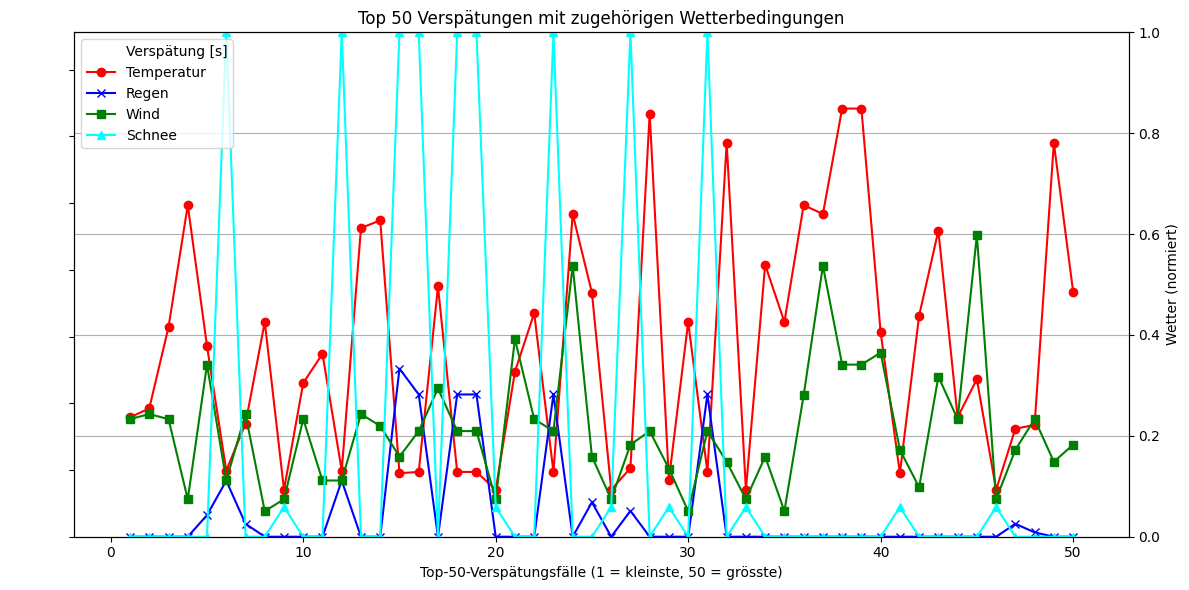

In [ ]:
#8.Verspätungsindex von 1-50 auf der x-Achse
x = range(1,51)
fig, ax1 = plt.subplots(figsize=(12, 6))


#9. Linke Y-Achse: Balkendiagramm für Verspätungen
ax1.bar(x, top50_norm['VERSPAETUNG [s]'], label='Verspätung [s]', alpha=0.6, color='white')
ax1.set_ylabel('Verspätung [s]', color='white')
ax1.set_xlabel('Top-50-Verspätungsfälle (1 = kleinste, 50 = grösste)')
ax1.tick_params(axis='y', labelcolor='white')

#10. Rechte Y-Achse: Wetterparameter
ax2 = ax1.twinx()
ax2.plot(x, top50_norm['TEMPERATUR [°C]'], label='Temperatur', color='red', marker='o')
ax2.plot(x, top50_norm['NIEDERSCHLAG [mm]'], label='Regen', color='blue', marker='x')
ax2.plot(x, top50_norm['WINDGESCHWINDIGKEIT [kmh]'], label='Wind', color='green', marker='s')
ax2.plot(x, top50_norm['NEUSCHNEEHOEHE [cm]'], label='Schnee', color='cyan', marker='^')
ax2.set_ylabel('Wetter (normiert)', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, 1)

#11. Legenden zusammenführen
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Top 50 Verspätungen mit zugehörigen Wetterbedingungen')
plt.grid(True)
plt.tight_layout()
plt.show()

###Erkenntnisse aus der Analyse
Temperatur zeigt in vielen Fällen mit hohen Verspätungen auffällig hohe normierte Werte. Das könnte darauf hindeuten, dass höhere oder extreme Temperaturen eine relevante Rolle bei grossen Verspätungen spielen könnten.

Auch beim Wind ist in zahlreichen Fällen eine erhöhte Ausprägung zu erkennen, wenngleich sich kein durchgehend eindeutiges Muster feststellen lässt.

Im Gegensatz dazu treten Regen und insbesondere Schnee nur vereinzelt in Zusammenhang mit grossen Verspätungen auf. Trotz einzelner deutlicher Ausschläge, vor allem beim Schnee, zeigt sich kein systematischer Zusammenhang mit den den Verspätungen.


Ein Muster mit gemeinsam auftretender  Wetterparameter im Zusammenhang mit hohen Verspätungen ist auf Basis des vorliegenden Plots nicht erkennbar.



---
# 5 Präsentation der Ergebnisse

Im Rahmen dieser Untersuchung wurde analysiert, ob sich wetterbedingte Einflüsse auf die Pünktlichkeit der Zürcher Trams statistisch nachweisen lassen. Grundlage war ein Jahresdatensatz, der Verspätungswerte mit verschiedenen Wetterparametern verknüpft.

Kernaussagen und Antworten auf zentrale Fragestellungen

**1. Lassen sich statistisch signifikante Zusammenhänge zwischen bestimmten Wetterereignissen und ÖV-Verbindungen identifizieren?**

Ja – die Analyse ergab für alle untersuchten Wettervariablen statistisch signifikante p-Werte (p = 0.0000). Diese Signifikanz ist jedoch auf die grosse Datenmenge zurückzuführen und bedeutet nicht automatisch eine inhaltlich relevante Korrelation. Die berechneten Pearson-Korrelationskoeffizienten lagen durchweg im sehr niedrigen Bereich (unter ±0.1), was auf keine nennenswerte lineare Beziehung zwischen Wetter und Verspätung hinweist.

**2. Welche Wetterfaktoren haben den grössten Einfluss auf die Pünktlichkeit?**

Lediglich Schneehöhe (r = 0.092) und Niederschlag (r = 0.040) zeigen minimale positive Korrelationen zur Verspätung. Der Einfluss bleibt jedoch äusserst gering. Alle anderen Wettervariablen, darunter Temperatur, Wind, Nebel oder Böenspitzen, weisen keine praktisch relevanten Zusammenhänge auf.

**3. In welchen Zeiträumen oder auf welchen Linien treten wetterbedingte Verspätungen häufig auf?**

Ein leichter Anstieg der durchschnittlichen Verspätungen wurde im Monat November festgestellt – möglicherweise bedingt durch Wetterumschwünge, früher einsetzende Dunkelheit oder verändertes Verkehrsverhalten. Auf geografischer Ebene traten die höchsten durchschnittlichen Verspätungen im Jahr 2024 an folgenden Haltestellen auf:

- Zürich, Zwinglihaus

- Zürich, Bertastrasse

- Zürich, Friedhof Sihlfeld

Ob diese Verzögerungen wetterbedingt sind oder auf andere Einflüsse zurückgehen (z. B. bauliche Engpässe oder verkehrliche Belastung), kann auf Basis der reinen Wetterdaten nicht abschliessend beurteilt werden.

**4. Welche praktischen Empfehlungen lassen sich aus den Ergebnissen ableiten?**

Die Erkenntnisse bieten mehrere konkrete Ansätze für die betriebliche Praxis der VBZ:

- **Kommunikationsstrategie und Marketing**: Die belegte Wetterresistenz des Trambetriebs kann aktiv in der Öffentlichkeitsarbeit genutzt werden. Eine Kampagne könnte die hohe Zuverlässigkeit des Zürcher ÖV bei unterschiedlichsten Wetterlagen betonen – als Teil eines positiven Markenimages.

- **Operative Steuerung**: Einzelne Haltestellen mit überdurchschnittlichen Verspätungswerten sollten gezielt analysiert und ggf. infrastrukturell oder betrieblich angepasst werden.

- **Saisonale Vorkehrungen**: Für den November könnten fahrplantechnische oder organisatorische Anpassungen helfen, saisonale Effekte besser abzufedern.

**Ausblick und zukünftige Handlungsfelder**

Um die Aussagekraft der Ergebnisse weiter zu erhöhen, wird empfohlen, die Analyse über mehrere Jahre hinweg fortzuführen. Eine erweiterte Datenbasis würde helfen, langfristige Trends und saisonale Muster deutlicher zu erkennen und besser zu interpretieren.

Sollten sich auch in einer mehrjährigen Betrachtung keine relevanten Zusammenhänge zwischen Wetter und Verspätungen zeigen, sollte der Fokus stärker auf andere Einflussgrößen gelegt werden:

- **Externe Faktoren**: Strassenverkehr, Grossveranstaltungen, Baustellen entlang der Linien.

- **Interne betriebliche Ursachen**: Fahrermangel, betriebliche Umstellungen, Fahrzeugstörungen.

Ein weiterer wichtiger Schritt wäre die Integration der Analyseergebnisse in die Fahrplan- und Linienplanung. Auf dieser Grundlage kann der Aufbau eines multifaktoriellen Prognosemodells erfolgen, das Wetterdaten, betriebliche Kennzahlen und externe Einflüsse kombiniert, um Verspätungen proaktiv vorherzusagen und frühzeitig gegenzusteuern.

# 6 Fazit

Die Zürcher Trams zeigen sich insgesamt als äusserst wetterrobust. Verspätungen lassen sich – wenn überhaupt – nur in sehr geringem Masse auf meteorologische Bedingungen zurückführen. Diese Stabilität kann nicht nur betriebsintern genutzt werden, sondern stellt auch einen klaren kommunikativen Vorteil im Wettbewerb des öffentlichen Verkehrs dar. Die Erkenntnisse bilden damit eine solide Basis für operative Optimierung, strategische Planung und öffentlichkeitswirksame Positionierung der VBZ als verlässlichen Mobilitätsanbieter – unabhängig vom Wetter.